<a href="https://colab.research.google.com/github/bhaveshinani/Projects/blob/main/AirlinePassengerRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Airline Passenger Recommender System


##### **Project Type**    - Classification
##### **Contribution**    - Bhavesh Inani


# **Project Summary -**

Air transport or aviation plays a very important role in the present transport structure of the world and surely it is considered the gift of the twentieth century to the world. In today’s fast-paced world, air transport has been a blessing to all because of its speed of transportation. This mode of transport is very useful to get the products with short delivery times quickly and safely to those who require it also allows the tourism industry in each country to have stable growth by shortening the distance among all the people who inhabit the world. Here, I have a dataset regarding the ratings of services provided by different airlines to customers. The main objective of this project is to understand how likely the passengers will recommend the airlines to others.


Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. It has 65947 rows and 17 variables. The main objective is to predict whether passengers will refer the airline to their friends.

# **GitHub Link -**

https://github.com/bhaveshinani

# **Problem Statement**


**The main objective is to predict whether passengers will refer the airline to their family or friends.**


## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#libraries for missing values
import missingno as msno

#library for variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

#important machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

#libraries for model evalution
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score,precision_score

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
df2=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projects/data_airline_reviews.xlsx')

In [ ]:
df=df2.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head(10)

airline  overall               author   review_date  \
0               NaN      NaN                  NaN           NaN   
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
2               NaN      NaN                  NaN           NaN   
3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
4               NaN      NaN                  NaN           NaN   
5  Turkish Airlines      3.0            M Galerko  7th May 2019   
6               NaN      NaN                  NaN           NaN   
7  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
8               NaN      NaN                  NaN           NaN   
9  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review aircraft  traveller_type  \
0                                                NaN      NaN             NaN   
1  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
2                                                NaN      NaN             NaN   
3  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
4                                                NaN      NaN             NaN   
5  âœ… Trip Verified | Rome to Prishtina via Ista...      NaN        Business   
6                                                NaN      NaN             NaN   
7  âœ… Trip Verified | Flew on Turkish Airlines I...     A330    Solo Leisure   
8                                                NaN      NaN             NaN   
9  âœ… Trip Verified | Mumbai to Dublin via Istan...      NaN    Solo Leisure   

           cabin                           route           date_flown  \
0            NaN                             NaN                  NaN   
1  Economy Class    London to Izmir via Istanbul  2019-05-01 00:00:00   
2            NaN                             NaN                  NaN   
3  Economy Class           Istanbul to Bucharest  2019-05-01 00:00:00   
4            NaN                             NaN                  NaN   
5  Economy Class  Rome to Prishtina via Istanbul  2019-05-01 00:00:00   
6            NaN                             NaN                  NaN   
7  Economy Class    Washington Dulles to Karachi           April 2019   
8            NaN                             NaN                  NaN   
9  Economy Class   Mumbai to Dublin via Istanbul  2019-05-01 00:00:00   

   seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
0           NaN            NaN       NaN            NaN             NaN   
1           4.0            5.0       4.0            4.0             2.0   
2           NaN            NaN       NaN            NaN             NaN   
3           4.0            1.0       1.0            1.0             1.0   
4           NaN            NaN       NaN            NaN             NaN   
5           1.0            4.0       1.0            3.0             1.0   
6           NaN            NaN       NaN            NaN             NaN   
7           4.0            5.0       5.0            5.0             5.0   
8           NaN            NaN       NaN            NaN             NaN   
9           1.0            1.0       1.0            1.0             1.0   

   value_for_money recommended  
0              NaN         NaN  
1              4.0         yes  
2              NaN         NaN  
3              1.0          no  
4              NaN         NaN  
5              2.0          no  
6              NaN         NaN  
7              5.0         yes  
8              NaN         NaN  
9              1.0          no

In [ ]:
df.tail()

airline  overall             author         review_date  \
131890  Ukraine International      NaN   Andriy Yesypenko       19th May 2006   
131891                    NaN      NaN                NaN                 NaN   
131892  Ukraine International      NaN  Volodya Bilotkach     29th April 2006   
131893                    NaN      NaN                NaN                 NaN   
131894  Ukraine International      NaN    Kasper Hettinga  10th February 2006   

                                          customer_review aircraft  \
131890  Kiev - London (Gatwick) in business class (in ...      NaN   
131891                                                NaN      NaN   
131892  Several flights - KBP to AMS (3 times one way)...      NaN   
131893                                                NaN      NaN   
131894  KBP-AMS with UIA. Although it was a relatively...      NaN   

       traveller_type cabin route date_flown  seat_comfort  cabin_service  \
131890            NaN   NaN   NaN        NaN           NaN            NaN   
131891            NaN   NaN   NaN        NaN           NaN            NaN   
131892            NaN   NaN   NaN        NaN           NaN            NaN   
131893            NaN   NaN   NaN        NaN           NaN            NaN   
131894            NaN   NaN   NaN        NaN           NaN            NaN   

        food_bev  entertainment  ground_service  value_for_money recommended  
131890       NaN            NaN             NaN              NaN          no  
131891       NaN            NaN             NaN              NaN         NaN  
131892       NaN            NaN             NaN              NaN          no  
131893       NaN            NaN             NaN              NaN         NaN  
131894       NaN            NaN             NaN              NaN          no

In [ ]:
#as there are rows with all features as nan we remove such observations and convert date_flown to proper
df=df.dropna(axis=0,how='all')
df['date_flown']=pd.to_datetime(df['date_flown'].str.replace('April ','1-4-').str.replace('January ','1-1-').str.replace('February ','1-2-').str.replace('March ','1-3-').str.replace('May ','1-5-').str.replace('June ','1-6-').str.replace('July ','1-7-').str.replace('August ','1-8-').str.replace('September ','1-9-').str.replace('October ','1-10-').str.replace('November ','1-11-').str.replace('December ','1-12-'),format='mixed',dayfirst=True)
df.head()

airline  overall               author   review_date  \
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
5  Turkish Airlines      3.0            M Galerko  7th May 2019   
7  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
9  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review aircraft  traveller_type  \
1  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
3  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
5  âœ… Trip Verified | Rome to Prishtina via Ista...      NaN        Business   
7  âœ… Trip Verified | Flew on Turkish Airlines I...     A330    Solo Leisure   
9  âœ… Trip Verified | Mumbai to Dublin via Istan...      NaN    Solo Leisure   

           cabin                           route date_flown  seat_comfort  \
1  Economy Class    London to Izmir via Istanbul        NaT           4.0   
3  Economy Class           Istanbul to Bucharest        NaT           4.0   
5  Economy Class  Rome to Prishtina via Istanbul        NaT           1.0   
7  Economy Class    Washington Dulles to Karachi 2019-04-01           4.0   
9  Economy Class   Mumbai to Dublin via Istanbul        NaT           1.0   

   cabin_service  food_bev  entertainment  ground_service  value_for_money  \
1            5.0       4.0            4.0             2.0              4.0   
3            1.0       1.0            1.0             1.0              1.0   
5            4.0       1.0            3.0             1.0              2.0   
7            5.0       5.0            5.0             5.0              5.0   
9            1.0       1.0            1.0             1.0              1.0   

  recommended  
1         yes  
3          no  
5          no  
7         yes  
9          no

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Number of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows:  65947
Number of columns:  17


### Dataset Information

In [ ]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65947 entries, 1 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          65947 non-null  object        
 1   overall          64017 non-null  float64       
 2   author           65947 non-null  object        
 3   review_date      65947 non-null  datetime64[ns]
 4   customer_review  65947 non-null  object        
 5   aircraft         19718 non-null  object        
 6   traveller_type   39755 non-null  object        
 7   cabin            63303 non-null  object        
 8   route            39726 non-null  object        
 9   date_flown       39633 non-null  datetime64[ns]
 10  seat_comfort     60681 non-null  float64       
 11  cabin_service    60715 non-null  float64       
 12  food_bev         52608 non-null  float64       
 13  entertainment    44193 non-null  float64       
 14  ground_service   39358 non-null  floa

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

4764


In [ ]:
df=df.drop_duplicates(keep='first')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isna().sum())

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64


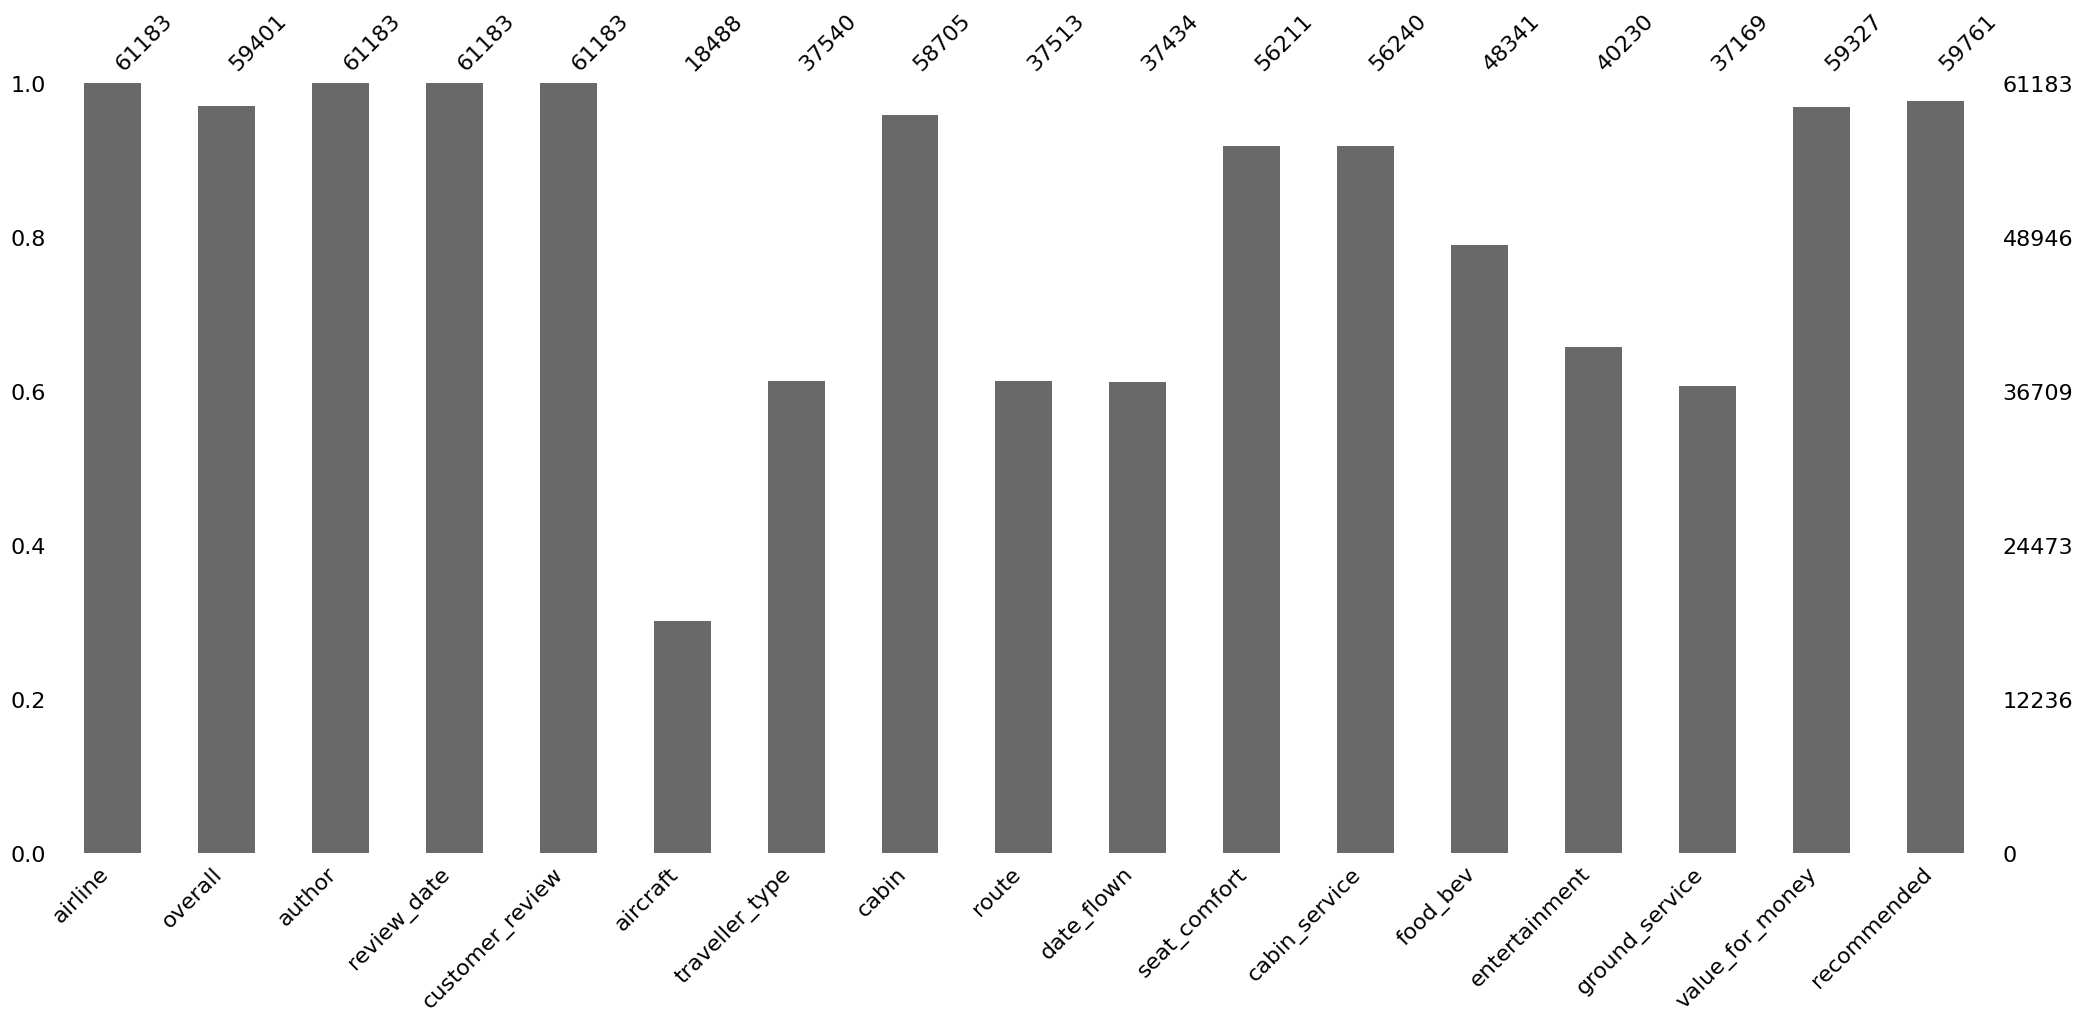

In [ ]:
# Visualizing the missing values
msno.bar(df);

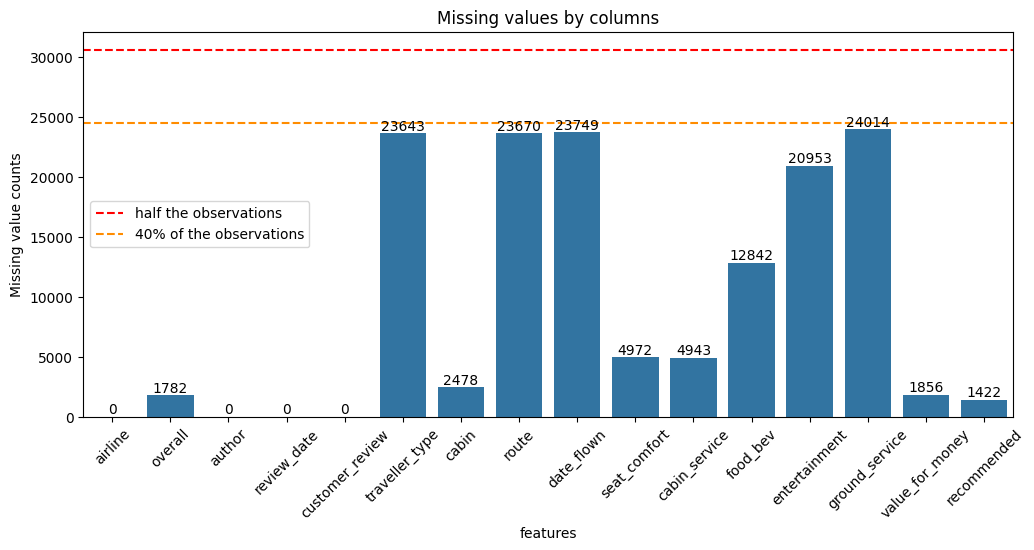

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Missing values by columns')
plt.xlabel('features')
plt.axhline(df.shape[0]/2,ls='--',color='red',label='half the observations')
plt.axhline(df.shape[0]*.4,ls='--',color='darkorange',label='40% of the observations')
plt.ylabel('Missing value counts')
ax = sns.barplot(df.isna().sum());
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=45);
plt.legend();

### What did you know about your dataset?



*   The Dataset has 65947 rows and 17 columns.
*   The dataset has many null values with aircraft feature having the most 42695 missing values, which is more than 50% and other features like traveller_type, route, date_flown and ground service having almost 40% values missing.


*   The dataset also contains 4764 dupliacted observatins



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe()

overall  seat_comfort  cabin_service      food_bev  entertainment  \
count  59401.000000  56211.000000   56240.000000  48341.000000   40230.000000   
mean       5.164863      2.959278       3.200231      2.926956       2.887994   
std        3.483701      1.436467       1.568429      1.483122       1.504452   
min        1.000000      1.000000       1.000000      1.000000       1.000000   
25%        1.000000      2.000000       2.000000      1.000000       1.000000   
50%        5.000000      3.000000       3.000000      3.000000       3.000000   
75%        9.000000      4.000000       5.000000      4.000000       4.000000   
max       10.000000      5.000000       5.000000      5.000000       5.000000   

       ground_service  value_for_money  
count    37169.000000     59327.000000  
mean         2.681347         2.950849  
std          1.613995         1.588433  
min          1.000000         1.000000  
25%          1.000000         1.000000  
50%          3.000000         3.000000  
75%          4.000000         4.000000  
max          5.000000         5.000000

### Variables Description

airline: Name of the airline

overall: Overall points are given to the trip between 0 and 10

author: Author of the trip

review_date: Date of the review customer

customer_review: Review left by the customer about the trip

aircraft: Type of the aircraft

traveller_type: Type of traveller(eg. Business, leisure etc)

cabin: Type of cabin

route: Route taken by the flight

date_flown: Date of the flight

seat_comfort: Rated between 1 and 5

cabin_service: Rated between 1 and 5

food_bev: Rated between 1 and 5

entertainment: Rated between 1 and 5

ground_service: Rated between 1 and 5

value_for_money: Rated between 1 and 5

recommended: Yes if author recommends the airline. No if the airline is not recommended (binary, target variable)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(df.nunique())

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
recommend_by_overall_rating = pd.DataFrame(df.groupby('overall')['recommended'].value_counts()).rename(columns={'recommended':'Number'}).unstack()
recommend_by_overall_rating.columns=['No','Yes']
print('\033[1mrecommendation by overall rating : \033[0m\n')
print(recommend_by_overall_rating)

recommendation by overall rating : 

            No   Yes
overall             
1.0      15684    53
2.0       5284    71
3.0       3511   125
4.0       2056   284
5.0       1852   983
6.0        727  1636
7.0        247  3853
8.0         71  6462
9.0         38  7169
10.0        39  7852


In [ ]:
# Write your code to make your dataset analysis ready.
recommend_by_traveller_type = pd.DataFrame(df.groupby('traveller_type')['recommended'].value_counts()).rename(columns={'recommended':'Number'}).unstack()
recommend_by_traveller_type.columns=['No','Yes']
print('\033[1mrecommendation by traverller type : \033[0m\n')
print(recommend_by_traveller_type)

recommendation by traverller type : 

                  No   Yes
traveller_type            
Business        4036  2728
Couple Leisure  6025  3674
Family Leisure  4383  2759
Solo Leisure    7069  6865


In [ ]:
recommend_by_cabin = pd.DataFrame(df.groupby('cabin')['recommended'].value_counts()).rename(columns={'recommended':'Number'}).unstack()
recommend_by_cabin.columns=['No','Yes']
print('\033[1mrecommendation by cabin type : \033[0m\n')
print(recommend_by_cabin)

recommendation by cabin type : 

                    No    Yes
cabin                        
Business Class    3204   6386
Economy Class    25516  19654
First Class        571    961
Premium Economy   1205   1207


In [ ]:
recommend_by_seat = pd.DataFrame(df.groupby('seat_comfort')['recommended'].value_counts()).rename(columns={'recommended':'Number'}).unstack()
recommend_by_seat.columns=['No','Yes']
print('\033[1mrecommendation by seat comfort : \033[0m\n')
print(recommend_by_seat)

recommendation by seat comfort : 

                 No    Yes
seat_comfort              
1.0           13474    434
2.0            6451   1175
3.0            6366   4992
4.0            2346  11139
5.0             509   9325


In [ ]:
recommend_by_cabin_service = pd.DataFrame(df.groupby('cabin_service')['recommended'].value_counts()).rename(columns={'recommended':'Number'}).unstack()
recommend_by_cabin_service.columns=['No','Yes']
print('\033[1mrecommendation by cabin service : \033[0m\n')
print(recommend_by_cabin_service)

recommendation by cabin service : 

                  No    Yes
cabin_service              
1.0            13312    265
2.0             6011    661
3.0             5684   2487
4.0             3035   7518
5.0             1130  16137


In [ ]:
recommend_by_food = pd.DataFrame(df.groupby('food_bev')['recommended'].value_counts()).rename(columns={'recommended':'Number'}).unstack()
recommend_by_food.columns=['No','Yes']
print('\033[1mrecommendation by food beverage : \033[0m\n')
print(recommend_by_food)

recommendation by food beverage : 

             No   Yes
food_bev             
1.0       12341   759
2.0        4938  1501
3.0        4098  4917
4.0        1478  8988
5.0         383  8938


In [ ]:
recommend_by_entertainment = pd.DataFrame(df.groupby('entertainment')['recommended'].value_counts()).rename(columns={'recommended':'Number'}).unstack()
recommend_by_entertainment.columns=['No','Yes']
print('\033[1mrecommendation by entertainment : \033[0m\n')
print(recommend_by_entertainment)

recommendation by entertainment : 

                  No   Yes
entertainment             
1.0            10557  1371
2.0             3163  1448
3.0             3438  3929
4.0             1938  6749
5.0              669  6968


In [ ]:
recommend_by_ground_service = pd.DataFrame(df.groupby('ground_service')['recommended'].value_counts()).rename(columns={'recommended':'Number'}).unstack()
recommend_by_ground_service.columns=['No','Yes']
print('\033[1mrecommendation by ground service : \033[0m\n')
print(recommend_by_ground_service)

recommendation by ground service : 

                   No   Yes
ground_service             
1.0             14570   471
2.0              2770   686
3.0              2306  2313
4.0              1179  5233
5.0               404  7237


In [ ]:
recommend_by_value_money = pd.DataFrame(df.groupby('value_for_money')['recommended'].value_counts()).rename(columns={'recommended':'Number'}).unstack()
recommend_by_value_money.columns=['No','Yes']
print('\033[1mrecommendation by value for money : \033[0m\n')
print(recommend_by_value_money)

recommendation by value for money : 

                    No    Yes
value_for_money              
1.0              18201    167
2.0               6495    424
3.0               4589   3062
4.0               1314  10725
5.0                266  14084


In [ ]:
#recomennded by airlines
recommend_by_airline=pd.DataFrame(df.groupby('airline')['recommended'].value_counts()).rename(columns={'count':'Number'}).reset_index('recommended')
recommend_by_airline['percent'] = (recommend_by_airline['Number']/recommend_by_airline.groupby('airline')['Number'].sum()).round(2)
print('\033[1mrecommendations by airline : \033[0m\n')
print(recommend_by_airline)

recommendations by airline : 

                       recommended  Number  percent
airline                                            
ANA All Nippon Airways         yes     385     0.84
ANA All Nippon Airways          no      76     0.16
Adria Airways                  yes      42     0.51
Adria Airways                   no      41     0.49
Aegean Airlines                yes     417     0.80
...                            ...     ...      ...
airBaltic                      yes      79     0.44
easyJet                        yes     555     0.55
easyJet                         no     462     0.45
flydubai                        no     139     0.70
flydubai                       yes      61     0.30

[162 rows x 3 columns]


In [ ]:
#10 most recommended airlines
top10=recommend_by_airline[recommend_by_airline['recommended']=='yes'].sort_values('Number',ascending=False).head(10)
print('\033[1mmost recommended airlines by number of traverllers : \033[0m\n')
print(top10)

most recommended airlines by number of traverllers : 

                        recommended  Number  percent
airline                                             
China Southern Airlines         yes    1454     0.86
British Airways                 yes    1141     0.43
Qatar Airways                   yes    1101     0.79
Lufthansa                       yes     981     0.72
Emirates                        yes     944     0.55
Qantas Airways                  yes     872     0.67
Cathay Pacific Airways          yes     803     0.69
Singapore Airlines              yes     795     0.78
Turkish Airlines                yes     726     0.50
Ryanair                         yes     692     0.45


In [ ]:
top10_percent=recommend_by_airline[recommend_by_airline['recommended']=='yes'].sort_values('percent',ascending=False).head(10)
print('\033[1mmost recommended airlines by percentage of travellers: \033[0m\n')
print(top10_percent)

most recommended airlines by percentage of travellers: 

                        recommended  Number  percent
airline                                             
Garuda Indonesia                yes     664     0.91
EVA Air                         yes     437     0.86
China Southern Airlines         yes    1454     0.86
Asiana Airlines                 yes     366     0.85
ANA All Nippon Airways          yes     385     0.84
Aegean Airlines                 yes     417     0.80
Qatar Airways                   yes    1101     0.79
QantasLink                      yes      80     0.78
Singapore Airlines              yes     795     0.78
Korean Air                      yes     375     0.77


In [ ]:
#10 least recommended airlines by number
bottom10=recommend_by_airline[recommend_by_airline['recommended']=='no'].sort_values('Number',ascending=False).head(10)
print('\033[1mLeast recommended airlines by numbers\033[0m')
print(bottom10)

Least recommended airlines by numbers
                  recommended  Number  percent
airline                                       
Spirit Airlines            no    2302     0.82
American Airlines          no    2204     0.80
United Airlines            no    2134     0.79
British Airways            no    1503     0.57
Frontier Airlines          no    1375     0.86
Delta Air Lines            no     894     0.60
Ryanair                    no     835     0.55
Air Canada rouge           no     828     0.81
Etihad Airways             no     814     0.65
Emirates                   no     772     0.45


In [ ]:
# least recommended airlines by percentage
bottom10_percent=recommend_by_airline[recommend_by_airline['recommended']=='no'].sort_values('percent',ascending=False).head(10)
print('\033[1mleast recommended airlines by percent\033[0m')
print(bottom10_percent)

least recommended airlines by percent
                  recommended  Number  percent
airline                                       
Frontier Airlines          no    1375     0.86
Spirit Airlines            no    2302     0.82
Air Canada rouge           no     828     0.81
American Airlines          no    2204     0.80
United Airlines            no    2134     0.79
WOW air                    no     428     0.77
Sunwing Airlines           no     442     0.76
Vueling Airlines           no     702     0.75
Eurowings                  no     186     0.74
Air Arabia                 no      58     0.72


In [ ]:
#avg of all features for most recommended airlines by number
top10_avg = df[df['airline'].isin(top10.index)].groupby('airline')[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']].mean()
print('\033[1maverages  of top 10 airlines by number: \033[0m')
top10_avg

averages  of top 10 airlines by number: 


overall  seat_comfort  cabin_service  food_bev  \
airline                                                                    
British Airways          4.924826      2.906932       3.268611  2.719756   
Cathay Pacific Airways   6.880912      3.754127       3.859375  3.441615   
China Southern Airlines  7.777973      4.029184       4.401669  3.816327   
Emirates                 5.766742      3.490610       3.206573  3.292917   
Lufthansa                6.630978      3.413562       3.982090  3.539634   
Qantas Airways           6.465273      3.488855       3.780938  3.335944   
Qatar Airways            7.489153      3.971800       4.260492  3.863372   
Ryanair                  5.038678      2.564626       2.937969  2.462017   
Singapore Airlines       7.466793      3.830542       4.171598  3.872383   
Turkish Airlines         5.245734      3.147992       3.234838  3.535610   

                         entertainment  ground_service  value_for_money  
airline                                                                  
British Airways               2.610997        2.885128         2.783958  
Cathay Pacific Airways        3.879249        3.715877         3.681034  
China Southern Airlines       3.678548        4.158900         4.282067  
Emirates                      4.054711        3.133628         3.320700  
Lufthansa                     3.510086        3.363855         3.526084  
Qantas Airways                3.467997        3.422306         3.384439  
Qatar Airways                 3.960636        3.850669         4.097701  
Ryanair                       1.188889        2.358306         3.033156  
Singapore Airlines            3.979613        4.011182         3.795098  
Turkish Airlines              3.288716        2.505539         3.178918

In [ ]:
#avg of all features for most recommended airlines by percentage
top10_percent_avg = df[df['airline'].isin(top10_percent.index)].groupby('airline')[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']].mean()
print('\033[1maverages  of top 10 airlines by percentage: \033[0m')
top10_percent_avg

averages  of top 10 airlines by percentage: 


overall  seat_comfort  cabin_service  food_bev  \
airline                                                                    
ANA All Nippon Airways   7.871520      3.706044       4.541209  3.972067   
Aegean Airlines          7.780347      3.841438       4.269474  3.855580   
Asiana Airlines          8.054299      4.039370       4.454068  4.108179   
China Southern Airlines  7.777973      4.029184       4.401669  3.816327   
EVA Air                  8.107075      4.149780       4.372247  3.869469   
Garuda Indonesia         8.289367      4.343365       4.559508  4.101530   
Korean Air               7.621677      3.914989       4.265625  3.730594   
QantasLink               7.359223      3.560976       4.073171  3.526316   
Qatar Airways            7.489153      3.971800       4.260492  3.863372   
Singapore Airlines       7.466793      3.830542       4.171598  3.872383   

                         entertainment  ground_service  value_for_money  
airline                                                                  
ANA All Nippon Airways        3.801802        4.382353         3.902386  
Aegean Airlines               2.799163        3.850000         3.848077  
Asiana Airlines               3.454039        3.985915         4.201856  
China Southern Airlines       3.678548        4.158900         4.282067  
EVA Air                       3.907193        4.245536         4.183953  
Garuda Indonesia              3.790735        4.042857         4.326057  
Korean Air                    3.833729        3.718391         3.961783  
QantasLink                    2.714286        3.914286         3.688312  
Qatar Airways                 3.960636        3.850669         4.097701  
Singapore Airlines            3.979613        4.011182         3.795098

In [ ]:
#avg of all features for least recommended airlines by number
bottom10_avg = df[df['airline'].isin(bottom10.index)].groupby('airline')[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']].mean()
print('\033[1maverages  of bottom 10 airlines by number: \033[0m')
bottom10_avg

averages  of bottom 10 airlines by number: 


overall  seat_comfort  cabin_service  food_bev  \
airline                                                              
Air Canada rouge   3.036822      1.714004       2.647929  1.989637   
American Airlines  2.888772      2.221768       2.362184  2.099116   
British Airways    4.924826      2.906932       3.268611  2.719756   
Delta Air Lines    4.650652      2.844369       3.113002  2.848287   
Emirates           5.766742      3.490610       3.206573  3.292917   
Etihad Airways     4.399065      2.764090       2.880032  2.720395   
Frontier Airlines  2.360882      1.820685       2.067729  1.571096   
Ryanair            5.038678      2.564626       2.937969  2.462017   
Spirit Airlines    2.628642      1.705861       2.087166  1.473006   
United Airlines    3.034259      2.221348       2.433496  2.065772   

                   entertainment  ground_service  value_for_money  
airline                                                            
Air Canada rouge        1.608270        2.772840         1.918387  
American Airlines       2.061651        1.826203         1.953919  
British Airways         2.610997        2.885128         2.783958  
Delta Air Lines         3.066918        2.567273         2.627358  
Emirates                4.054711        3.133628         3.320700  
Etihad Airways          3.077376        2.452261         2.748608  
Frontier Airlines       1.513433        1.562604         1.753312  
Ryanair                 1.188889        2.358306         3.033156  
Spirit Airlines         1.169739        1.716157         1.840699  
United Airlines         2.150665        2.015286         2.033936

In [ ]:
#avg of all features for most recommended airlines by percentage
bottom10_percent_avg = df[df['airline'].isin(bottom10_percent.index)].groupby('airline')[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']].mean()
print('\033[1maverages  of top 10 airlines by percentage : \033[0m')
bottom10_percent_avg

averages  of top 10 airlines by percentage : 


overall  seat_comfort  cabin_service  food_bev  \
airline                                                              
Air Arabia         3.647059      2.584906       2.615385  2.212121   
Air Canada rouge   3.036822      1.714004       2.647929  1.989637   
American Airlines  2.888772      2.221768       2.362184  2.099116   
Eurowings          3.403226      2.529954       2.534562  1.951389   
Frontier Airlines  2.360882      1.820685       2.067729  1.571096   
Spirit Airlines    2.628642      1.705861       2.087166  1.473006   
Sunwing Airlines   3.477509      2.120072       2.703770  2.319392   
United Airlines    3.034259      2.221348       2.433496  2.065772   
Vueling Airlines   3.357303      2.063041       2.258065  1.952736   
WOW air            2.984429      2.100000       2.468208  1.634483   

                   entertainment  ground_service  value_for_money  
airline                                                            
Air Arabia              1.458333        1.923077         2.492308  
Air Canada rouge        1.608270        2.772840         1.918387  
American Airlines       2.061651        1.826203         1.953919  
Eurowings               1.536232        2.128889         2.279661  
Frontier Airlines       1.513433        1.562604         1.753312  
Spirit Airlines         1.169739        1.716157         1.840699  
Sunwing Airlines        2.090373        1.990291         2.336268  
United Airlines         2.150665        2.015286         2.033936  
Vueling Airlines        1.276018        1.749267         2.103560  
WOW air                 1.246512        1.863724         2.110307

### What all manipulations have you done and insights you found?

The dataset contained rows with all missing values, and some duplicate observations as well. Both have been removed with only one observations being kept from duplicate values.
Recommendatinos was found to be heavily dependent on overall rating as overall ratings of more than 5 recieved more recommendations and overall ratings of less than 5 had people not recommending the airlines.

Same can be said for people who found value for money to be good recommended the airlines and vis-a-vis those who did not found.

Most recommended airlines in terms of number of people recommending the airlines were China Southern Airlines, British Airways, Qatar Airways, while the most unadvisable airlines were Spirit, American and United airlines.

In terms of percent of customers who flew by the airlines, the most recommended airlines were Garuda Indonesia with 91%, EVA Air with 86% and
China Southern Airlines	having 84% customers recommending the airlines while the most unadvisable were Frontier Airlines (86%), Spirit Airlines(82%), Air Canada rouge(81%).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Target Variable : recommended

In [ ]:
total_counts=df['recommended'].value_counts().sum()
def auto_pct_format(x):
  return '{:.2f}%\n{:.0f}'.format(x,total_counts*x/100)

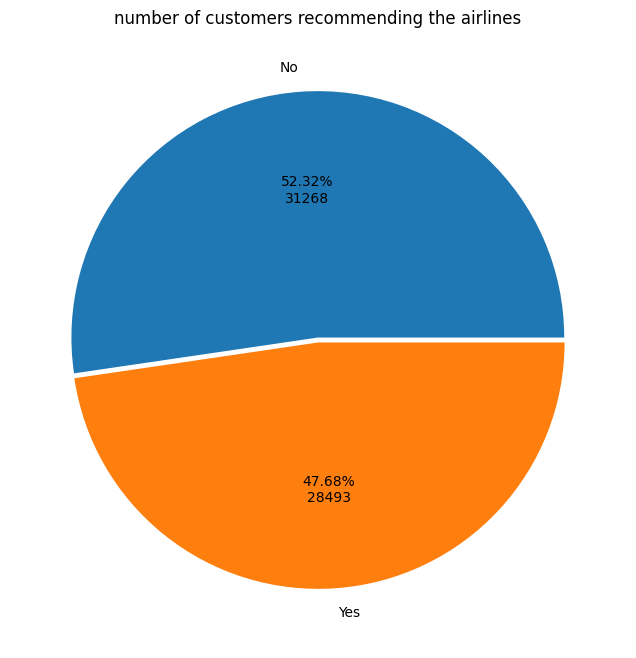

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(13,8))
plt.pie(df['recommended'].value_counts(),labels=['No','Yes'],autopct=auto_pct_format,explode=[.01,0.01])
plt.title('number of customers recommending the airlines');

##### 1. Why did you pick the specific chart?

Pie charts are useful in representing  the data as a percentage of a whole.

##### 2. What is/are the insight(s) found from the chart?

In the above pie chart we see the overall counts of people who recommended or rejected the airline

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It shows that people recommending the airline is about 47% and also who rejected the airline were 53%, almost same.

#### Chart - 2

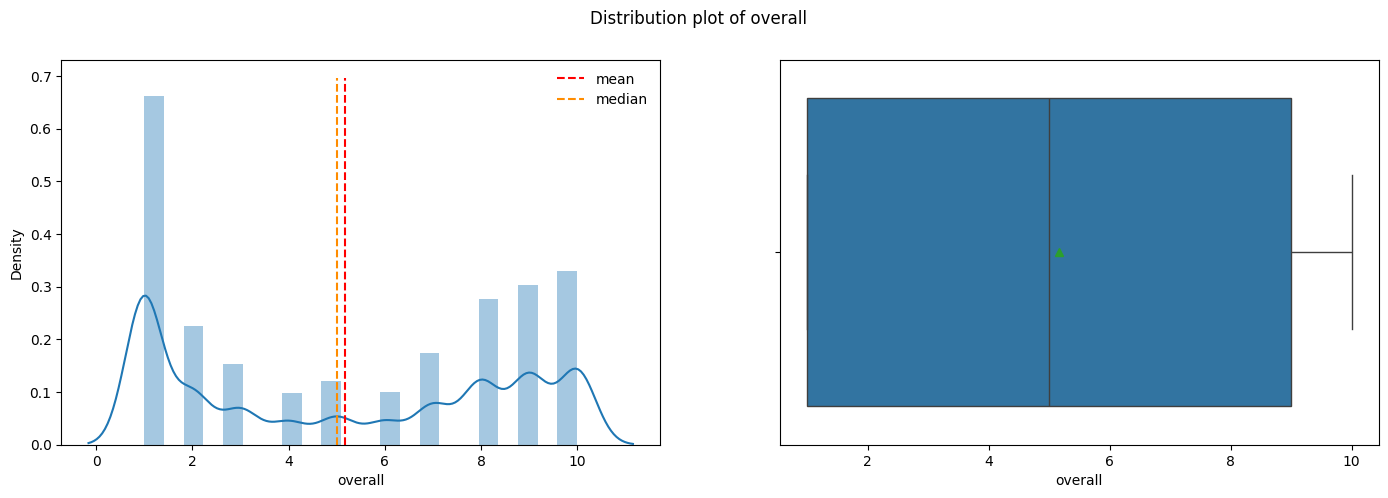

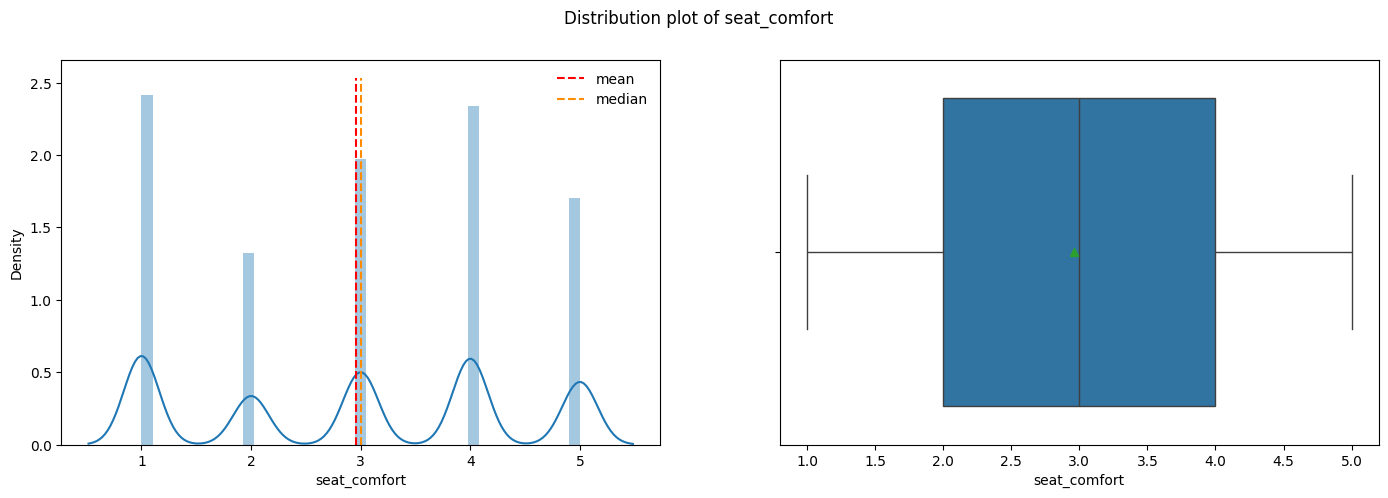

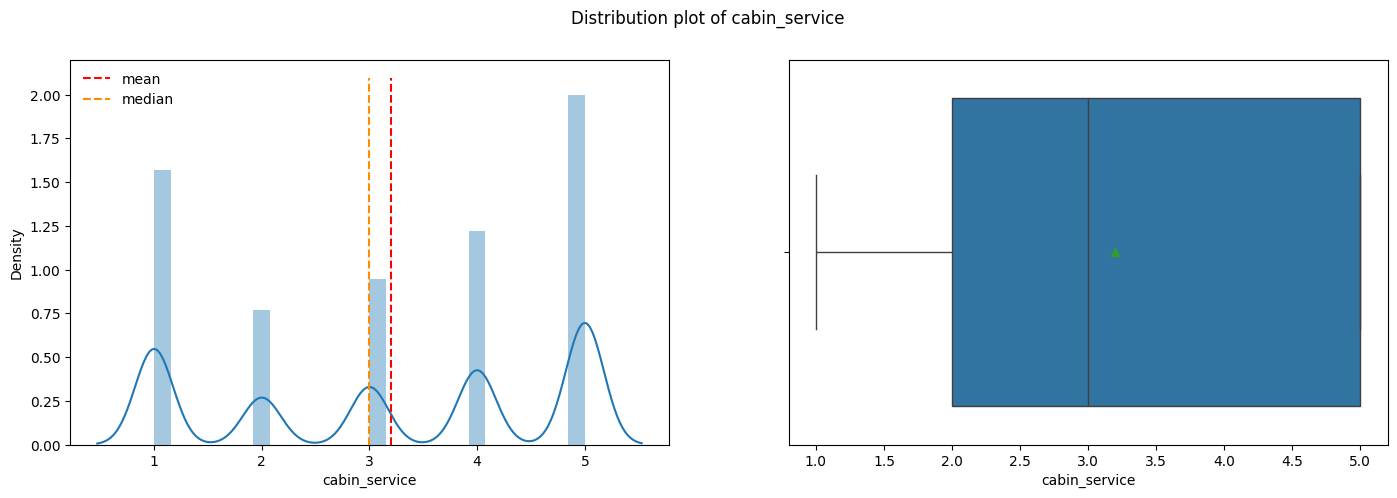

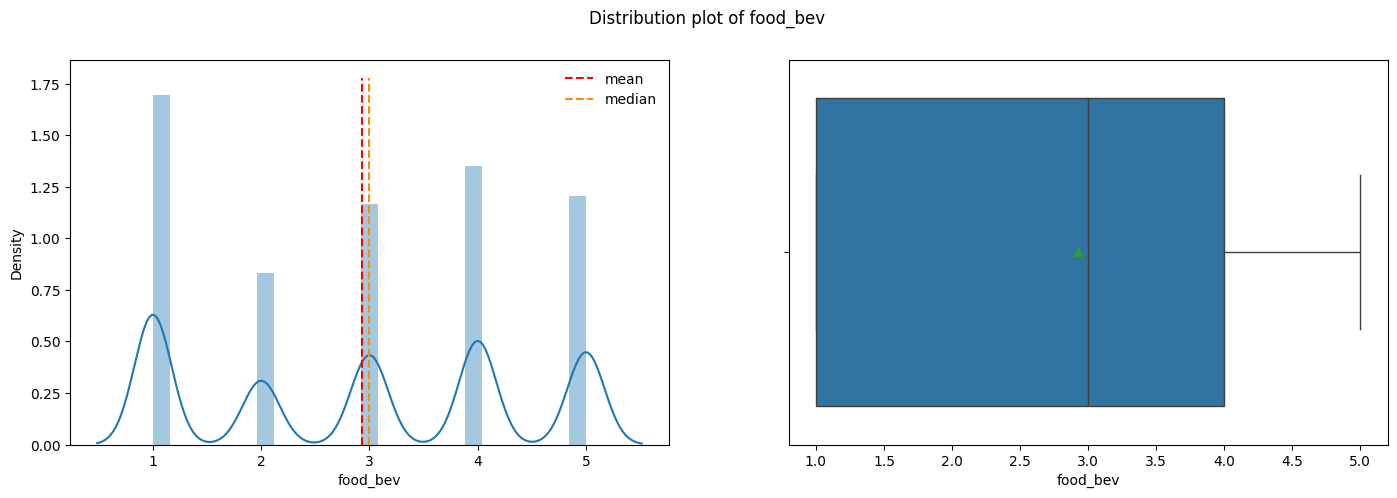

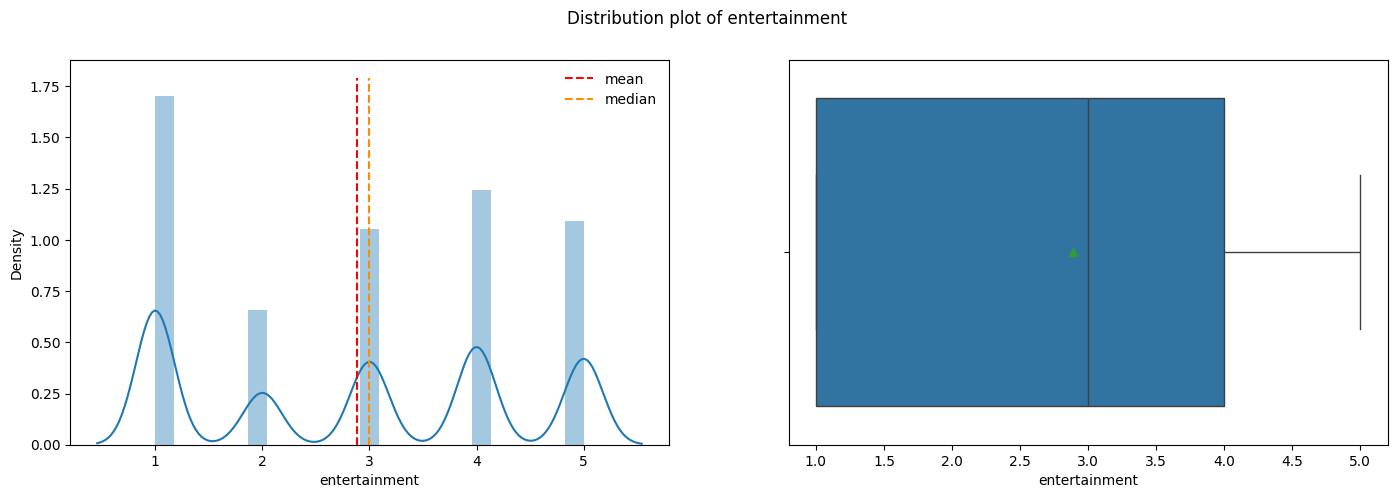

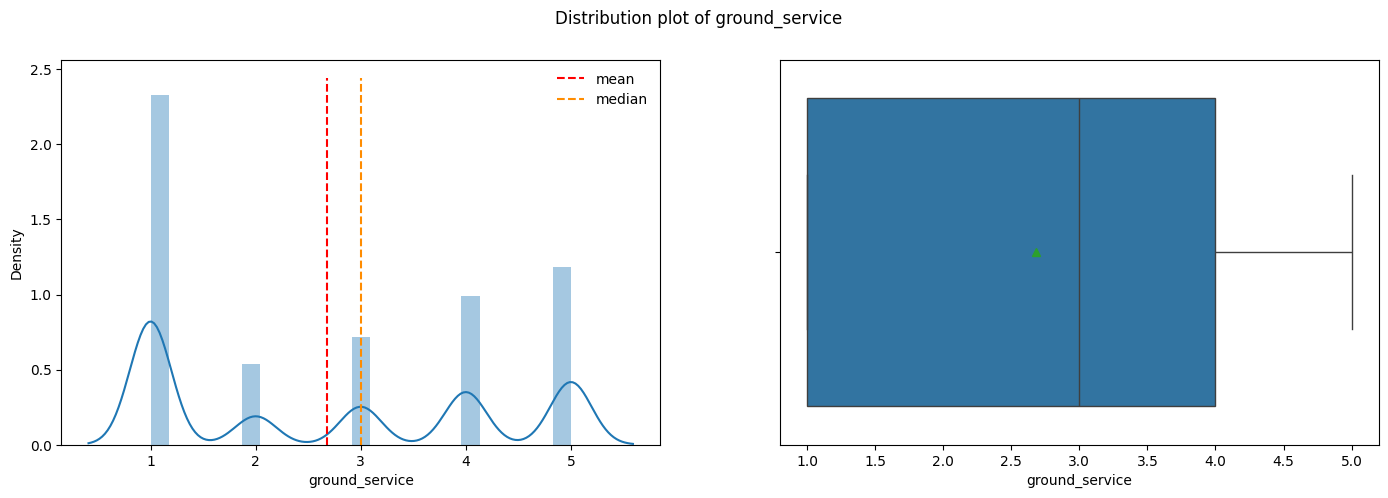

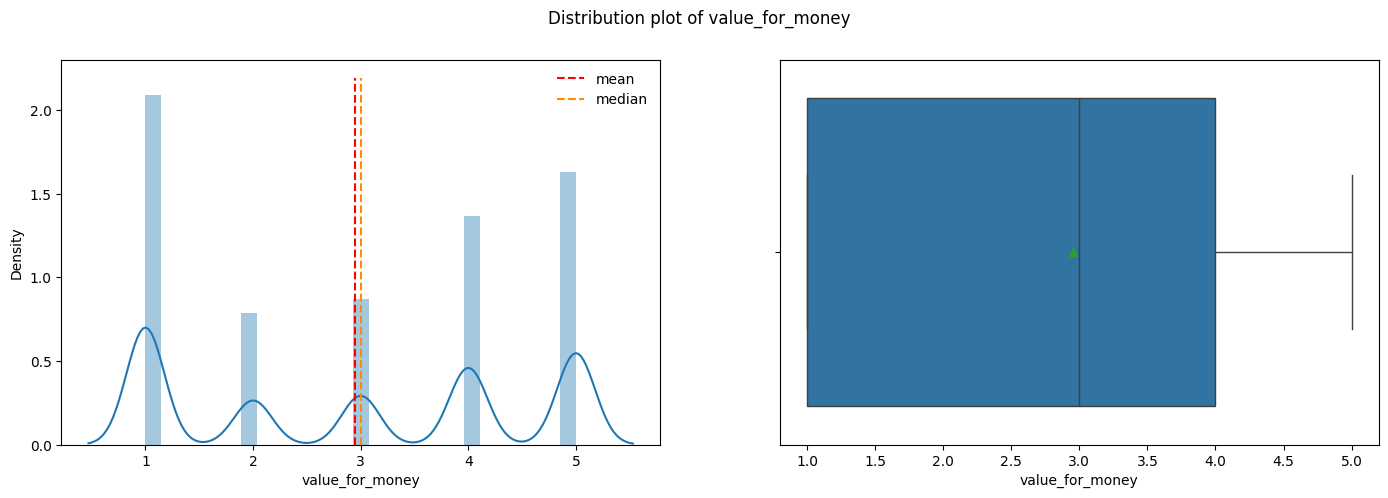

In [ ]:
# Chart - 2 visualization code
for cols in df.describe().columns:
  fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (17,5));
  ax = sns.distplot(df[cols],ax = axes[0]);
  ymin,ymax = ax.get_ylim();
  ax.vlines([df[cols].mean()],ymin,ymax,color=['red'],label='mean',linestyles='--');
  ax.vlines(df[cols].median(),ymin,ymax,color=['darkorange'],label='median',linestyles='--');
  ax.legend(frameon=False);
  sns.boxplot(df[cols],ax = axes[1],showmeans = True,orient = 'h');
  fig.suptitle(f'Distribution plot of {cols}');
  plt.show();

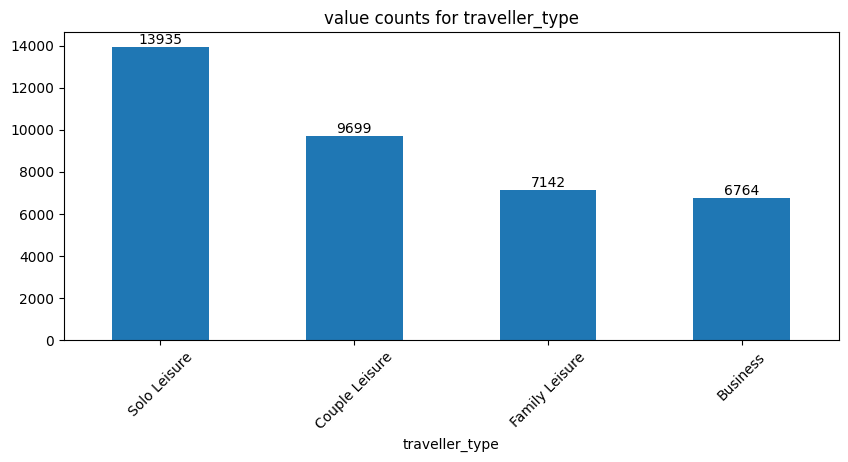

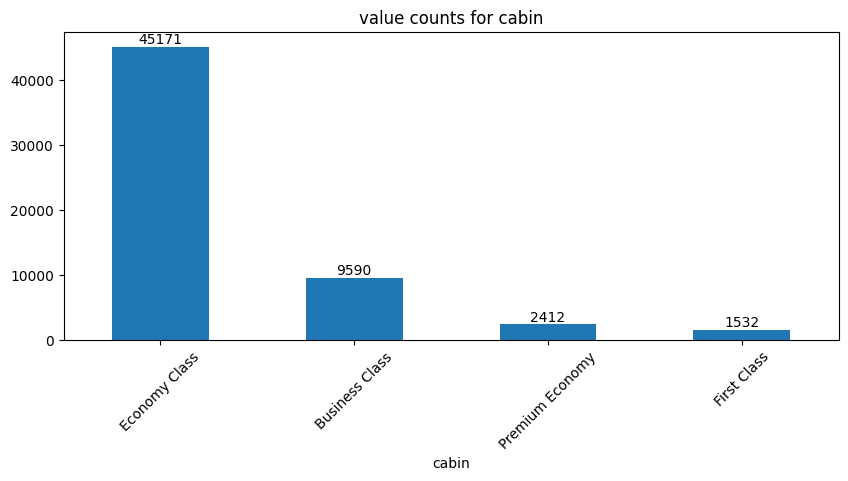

In [ ]:
for cols in ['traveller_type','cabin']:
  plt.figure(figsize=(10,4))
  plots = df[cols].value_counts().plot(kind='bar')
  plt.xticks(rotation=45)
  plt.xlabel(f'{cols}')
  plt.title(f'value counts for {cols}')
  for bar in plots.patches:
    plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

Text(0.5, 1.0, 'travellers flying throught')

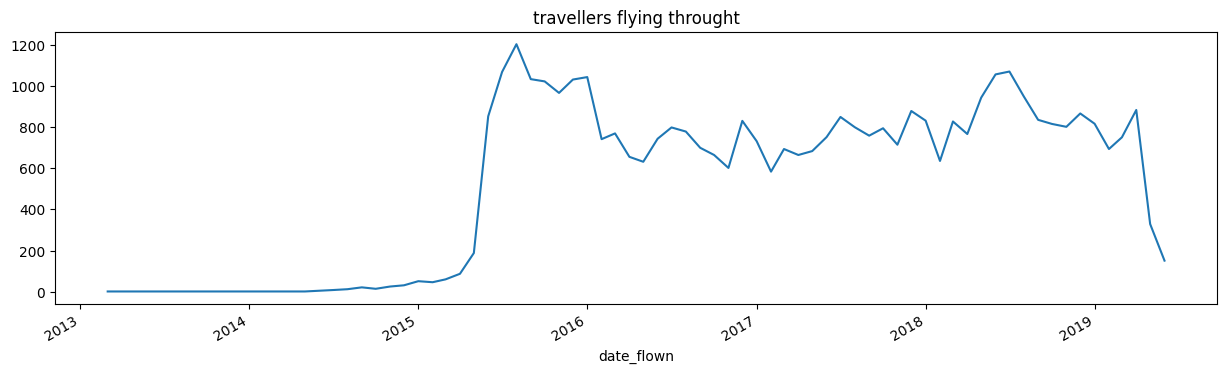

In [ ]:
plt.figure(figsize=(15,4))
df.groupby('date_flown')['author'].count().plot(kind='line')
plt.title('travellers flying throught')

##### 1. Why did you pick the specific chart?

For univariate analysis, distplot/boxplots for numerical and value counts for categorical data is done. For Time series a line charts for trends is used.

##### 2. What is/are the insight(s) found from the chart?

We see distributions of numeric features and 'traveller_type','cabin' features.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Univariate analysis only helps in distribution of the data and does not provide in depth analysis.

#### Chart - 3

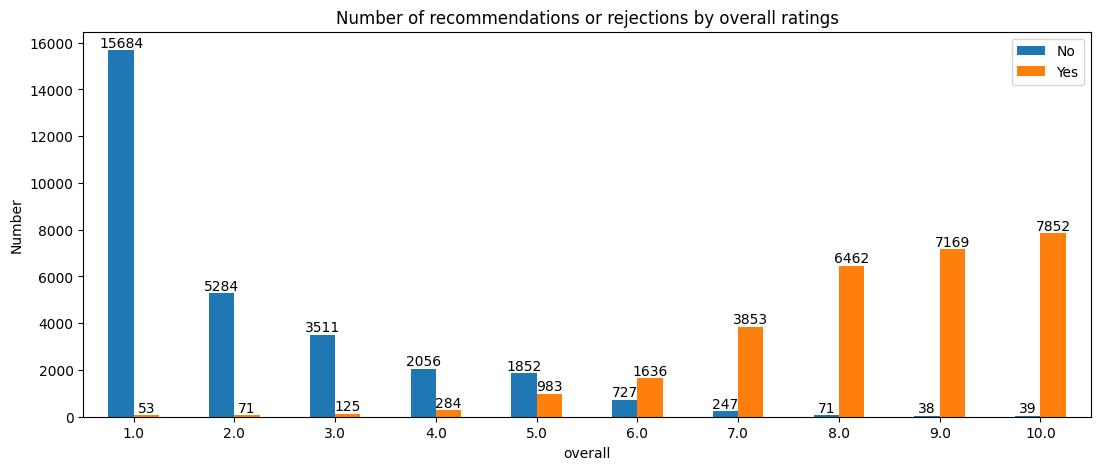

In [ ]:
# Chart - 3 visualization code
plots = recommend_by_overall_rating.plot(kind='bar',figsize=(13,5))
plt.xticks(rotation=0)
plt.title('Number of recommendations or rejections by overall ratings')
plt.ylabel('Number')
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

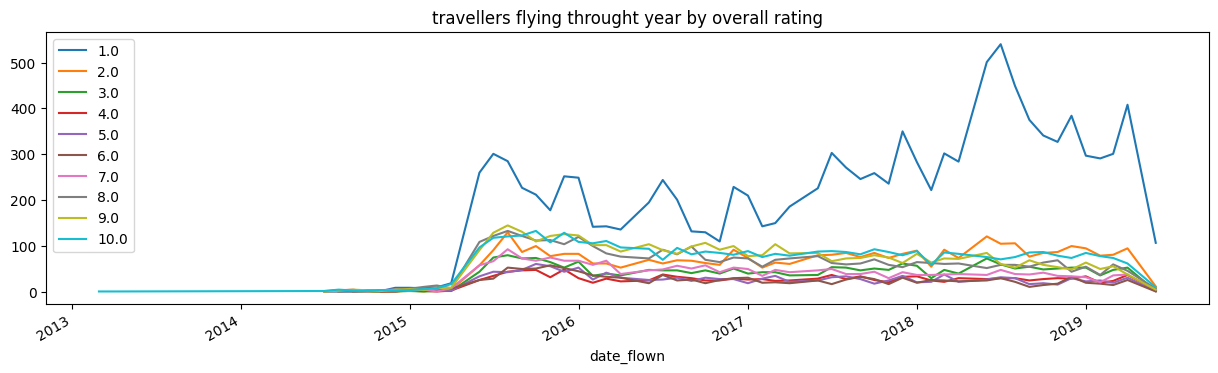

In [ ]:
plt.figure(figsize=(15,4))
df[df['overall']==1].groupby('date_flown')['author'].count().plot(kind='line',label='1.0')
df[df['overall']==2].groupby('date_flown')['author'].count().plot(kind='line',label='2.0')
df[df['overall']==3].groupby('date_flown')['author'].count().plot(kind='line',label='3.0')
df[df['overall']==4].groupby('date_flown')['author'].count().plot(kind='line',label='4.0')
df[df['overall']==5].groupby('date_flown')['author'].count().plot(kind='line',label='5.0')
df[df['overall']==6].groupby('date_flown')['author'].count().plot(kind='line',label='6.0')
df[df['overall']==7].groupby('date_flown')['author'].count().plot(kind='line',label='7.0')
df[df['overall']==8].groupby('date_flown')['author'].count().plot(kind='line',label='8.0')
df[df['overall']==9].groupby('date_flown')['author'].count().plot(kind='line',label='9.0')
df[df['overall']==10].groupby('date_flown')['author'].count().plot(kind='line',label='10.0')
plt.title('travellers flying throught year by overall rating')
plt.legend()

##### 1. Why did you pick the specific chart?

*  Bar charts are useful in comparing values for different categories.

*  Line charts are used in tracking trends and changes in time series

##### 2. What is/are the insight(s) found from the chart?

We see value counts for features and time series traveller count by overall rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Overall rating 1 has most of the customers. The rest of the overall ratings has similar traveller count. The airlines need to improve the overall ratings as there is too many traveller rating with 1 and will result the business negatively

#### Chart - 4

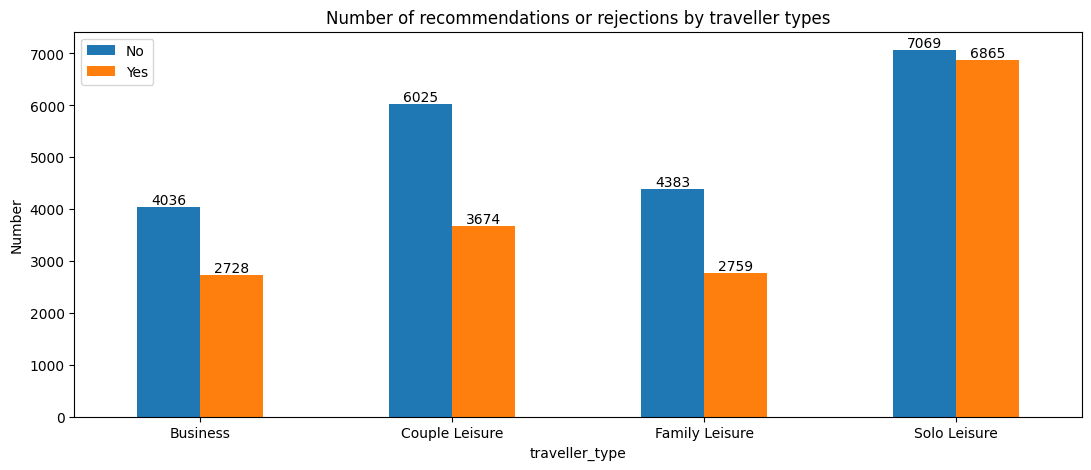

In [ ]:
# Chart - 4 visualization code
plots = recommend_by_traveller_type.plot(kind='bar',figsize=(13,5))
plt.xticks(rotation=0)
plt.title('Number of recommendations or rejections by traveller types')
plt.ylabel('Number')
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

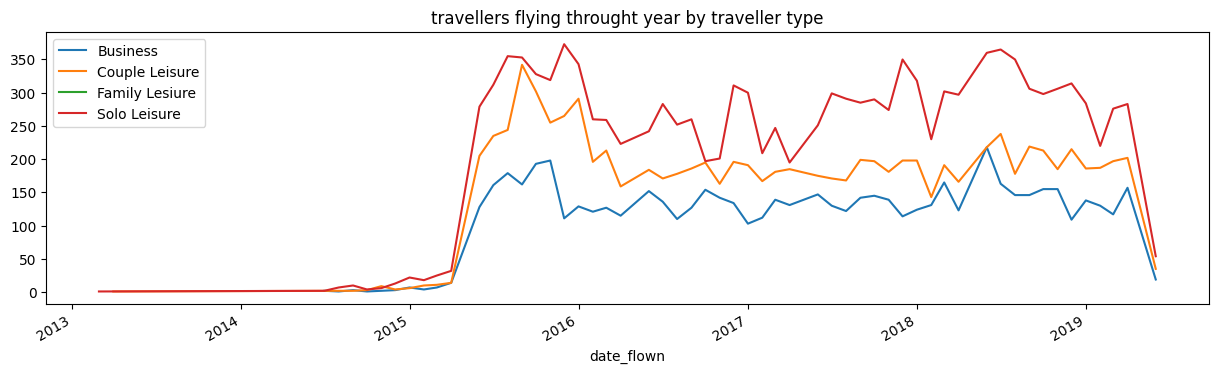

In [ ]:
plt.figure(figsize=(15,4))
df[df['traveller_type']=='Business'].groupby('date_flown')['author'].count().plot(kind='line',label='Business')
df[df['traveller_type']=='Couple Leisure'].groupby('date_flown')['author'].count().plot(kind='line',label='Couple Leisure')
df[df['traveller_type']=='Family Lesiure'].groupby('date_flown')['author'].count().plot(kind='line',label='Family Lesiure')
df[df['traveller_type']=='Solo Leisure'].groupby('date_flown')['author'].count().plot(kind='line',label='Solo Leisure')
plt.title('travellers flying throught year by traveller type')
plt.legend();

##### 1. Why did you pick the specific chart?

*  Bar charts are useful in comparing values for different categories.

*  Line charts are used in tracking trends and changes in time series

##### 2. What is/are the insight(s) found from the chart?

Only solo leisure travellers have around same recommendations as there are rejections. The most number of travellers are of solo leisure category, then for couple leisure and then business

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business, Couple leisure and family leisure have more rejections then recommendations and need better service and quality.

#### Chart - 5

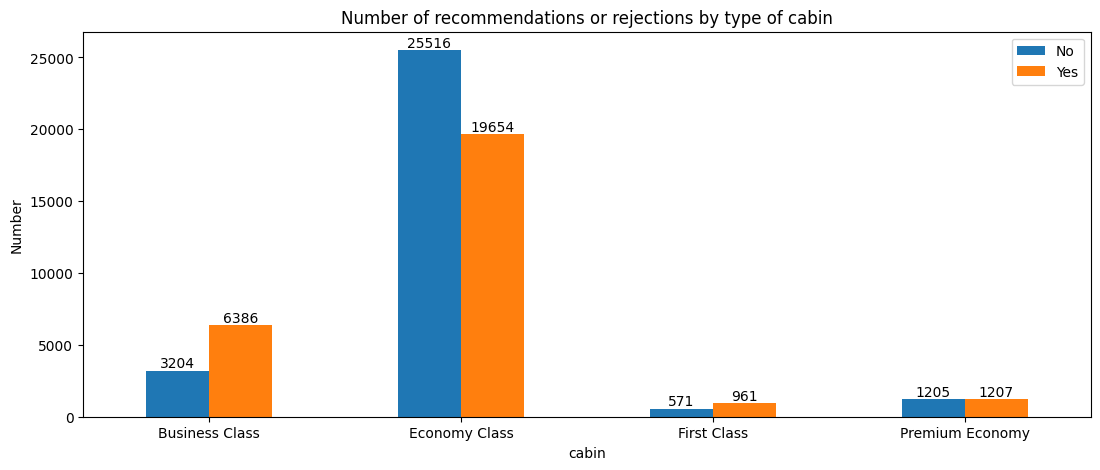

In [ ]:
# Chart - 5 visualization code
plots = recommend_by_cabin.plot(kind='bar',figsize=(13,5))
plt.xticks(rotation=0)
plt.title('Number of recommendations or rejections by type of cabin')
plt.ylabel('Number')
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

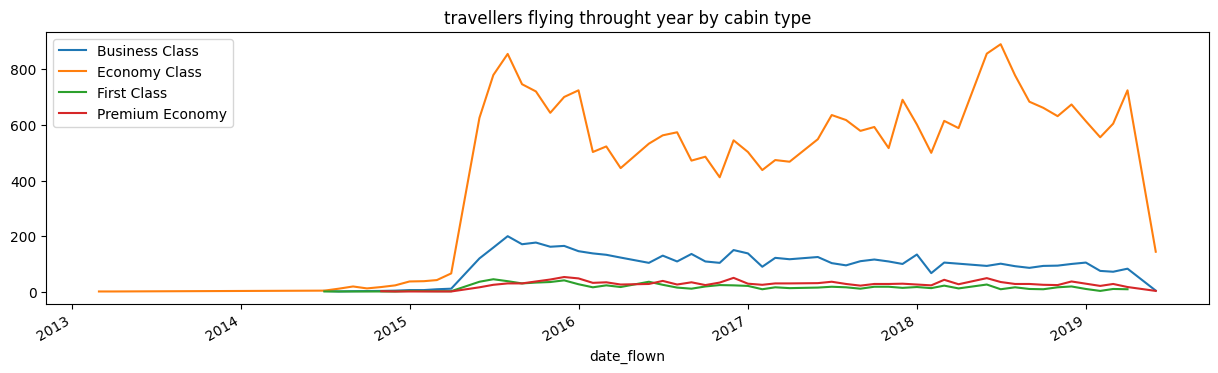

In [ ]:
plt.figure(figsize=(15,4))
df[df['cabin']=='Business Class'].groupby('date_flown')['author'].count().plot(kind='line',label='Business Class')
df[df['cabin']=='Economy Class'].groupby('date_flown')['author'].count().plot(kind='line',label='Economy Class')
df[df['cabin']=='First Class'].groupby('date_flown')['author'].count().plot(kind='line',label='First Class')
df[df['cabin']=='Premium Economy'].groupby('date_flown')['author'].count().plot(kind='line',label='Premium Economy')
plt.title('travellers flying throught year by cabin type')
plt.legend();

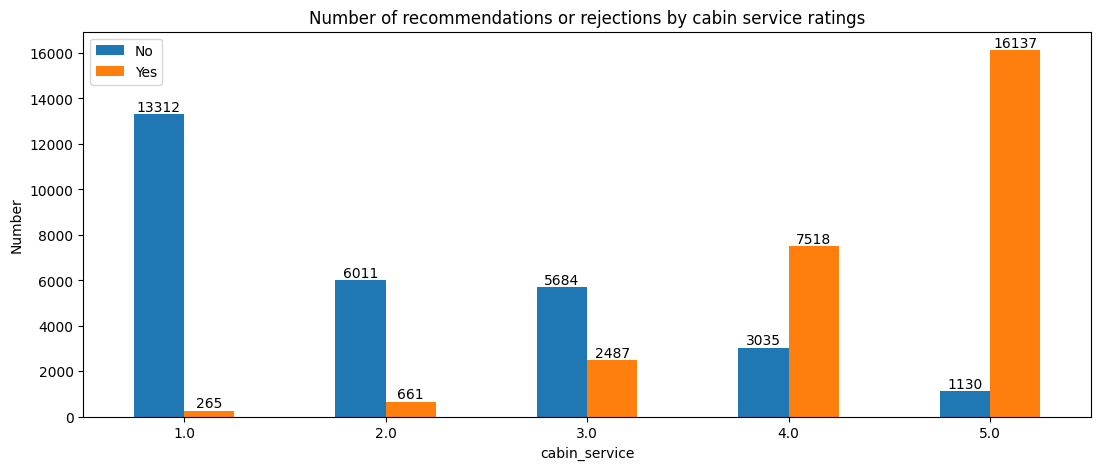

In [ ]:
plots = recommend_by_cabin_service.plot(kind='bar',figsize=(13,5))
plt.xticks(rotation=0)
plt.title('Number of recommendations or rejections by cabin service ratings')
plt.ylabel('Number')
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

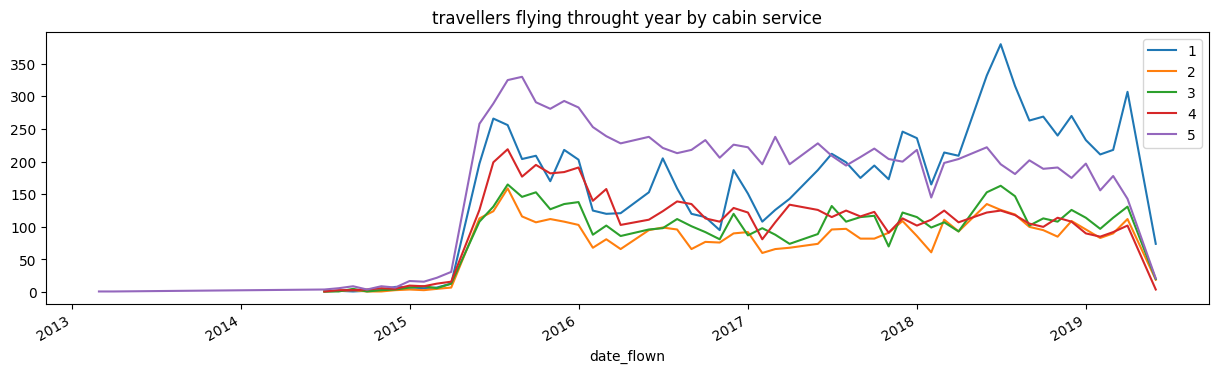

In [ ]:
plt.figure(figsize=(15,4))
df[df['cabin_service']==1].groupby('date_flown')['author'].count().plot(kind='line',label='1')
df[df['cabin_service']==2].groupby('date_flown')['author'].count().plot(kind='line',label='2')
df[df['cabin_service']==3].groupby('date_flown')['author'].count().plot(kind='line',label='3')
df[df['cabin_service']==4].groupby('date_flown')['author'].count().plot(kind='line',label='4')
df[df['cabin_service']==5].groupby('date_flown')['author'].count().plot(kind='line',label='5')
plt.title('travellers flying throught year by cabin service')
plt.legend();

##### 1. Why did you pick the specific chart?

*  Bar charts are useful in comparing values for different categories.

*  Line charts are used in tracking trends and changes in time series

##### 2. What is/are the insight(s) found from the chart?

Analysis is done for the features cabin type and cabin_service.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Economy class cabin type has the most travellers and the service rating of 1 has most rejections over recommendations while service rating of 5 has most recommendations over rejections.

#### Chart - 6

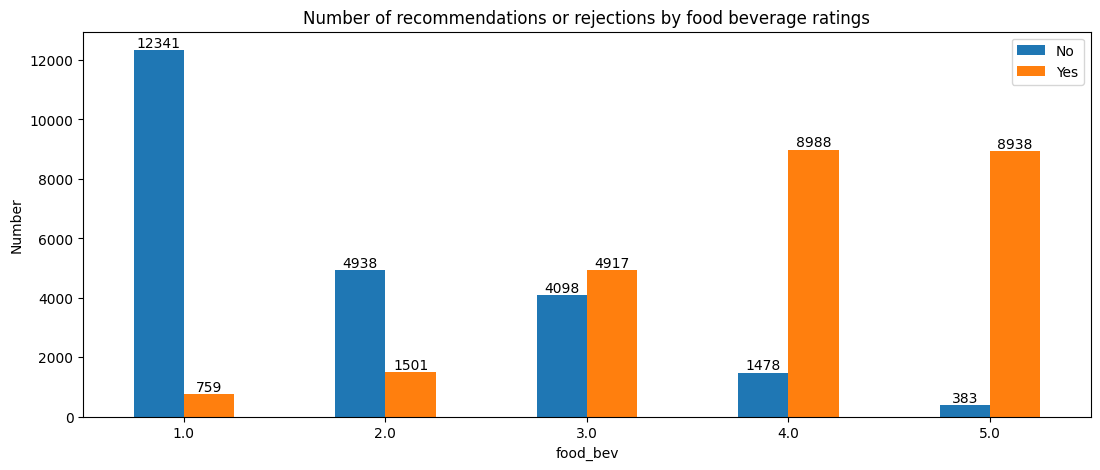

In [ ]:
# Chart - 6 visualization code
plots = recommend_by_food.plot(kind='bar',figsize=(13,5))
plt.title('Number of recommendations or rejections by food beverage ratings')
plt.ylabel('Number')
plt.xticks(rotation=0)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

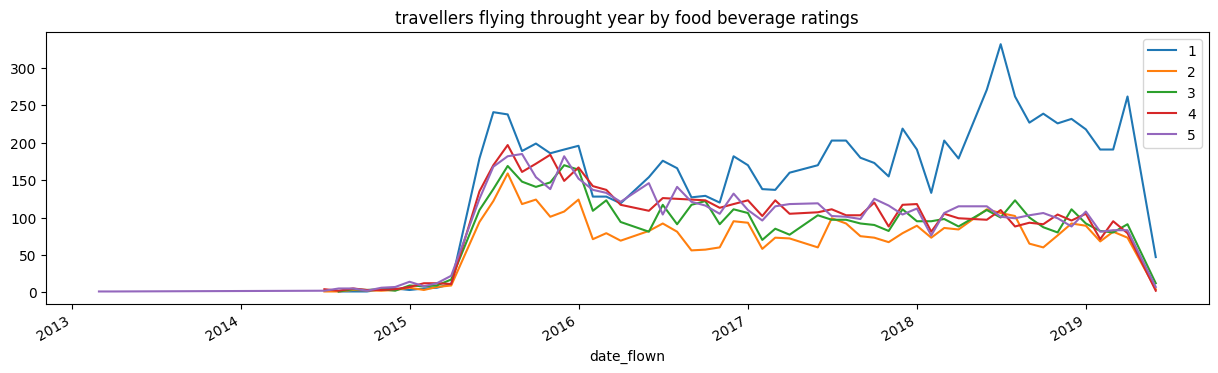

In [ ]:
plt.figure(figsize=(15,4))
df[df['food_bev']==1].groupby('date_flown')['author'].count().plot(kind='line',label='1')
df[df['food_bev']==2].groupby('date_flown')['author'].count().plot(kind='line',label='2')
df[df['food_bev']==3].groupby('date_flown')['author'].count().plot(kind='line',label='3')
df[df['food_bev']==4].groupby('date_flown')['author'].count().plot(kind='line',label='4')
df[df['food_bev']==5].groupby('date_flown')['author'].count().plot(kind='line',label='5')
plt.title('travellers flying throught year by food beverage ratings')
plt.legend();

##### 1. Why did you pick the specific chart?

*  Bar charts are useful in comparing values for different categories.

*  Line charts are used in tracking trends and changes in time series

##### 2. What is/are the insight(s) found from the chart?

As expected recommendations are lowest for food rating of 1 and increases with service rating and maximum for service rating for 5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The number of travellers who rated the food service as 1 is highest and leads to more rejections than recommendations and should be improved.

#### Chart - 7

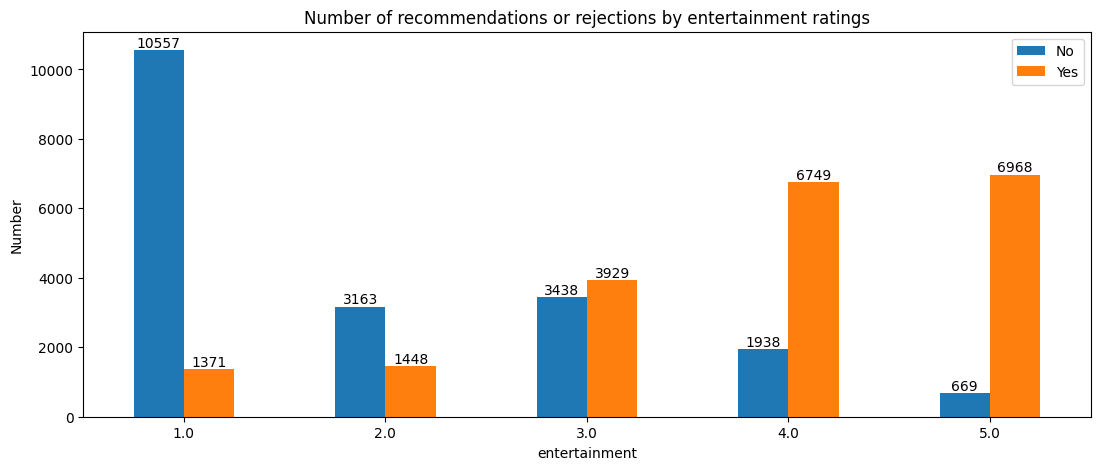

In [ ]:
# Chart - 7 visualization code
plots = recommend_by_entertainment.plot(kind='bar',figsize=(13,5))
plt.title('Number of recommendations or rejections by entertainment ratings')
plt.ylabel('Number')
plt.xticks(rotation=0)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

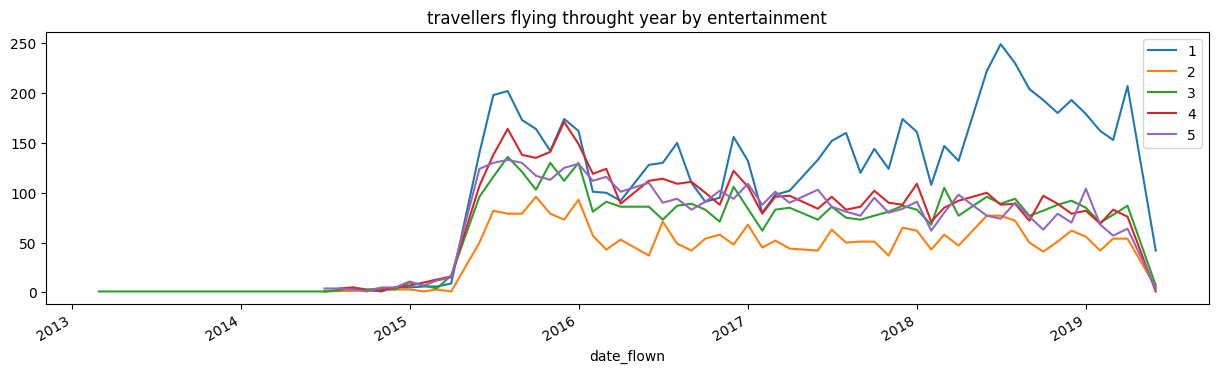

In [ ]:
plt.figure(figsize=(15,4))
df[df['entertainment']==1].groupby('date_flown')['author'].count().plot(kind='line',label='1')
df[df['entertainment']==2].groupby('date_flown')['author'].count().plot(kind='line',label='2')
df[df['entertainment']==3].groupby('date_flown')['author'].count().plot(kind='line',label='3')
df[df['entertainment']==4].groupby('date_flown')['author'].count().plot(kind='line',label='4')
df[df['entertainment']==5].groupby('date_flown')['author'].count().plot(kind='line',label='5')
plt.title('travellers flying throught year by entertainment')
plt.legend();

##### 1. Why did you pick the specific chart?

*  Bar charts are useful in comparing values for different categories.

*  Line charts are used in tracking trends and changes in time series

##### 2. What is/are the insight(s) found from the chart?

As expected recommendations are lowest for entertainment rating of 1 and increases with service rating and maximum for service rating for 5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Again the count of 1 ratings is much more than rest of the ratings.

#### Chart - 8

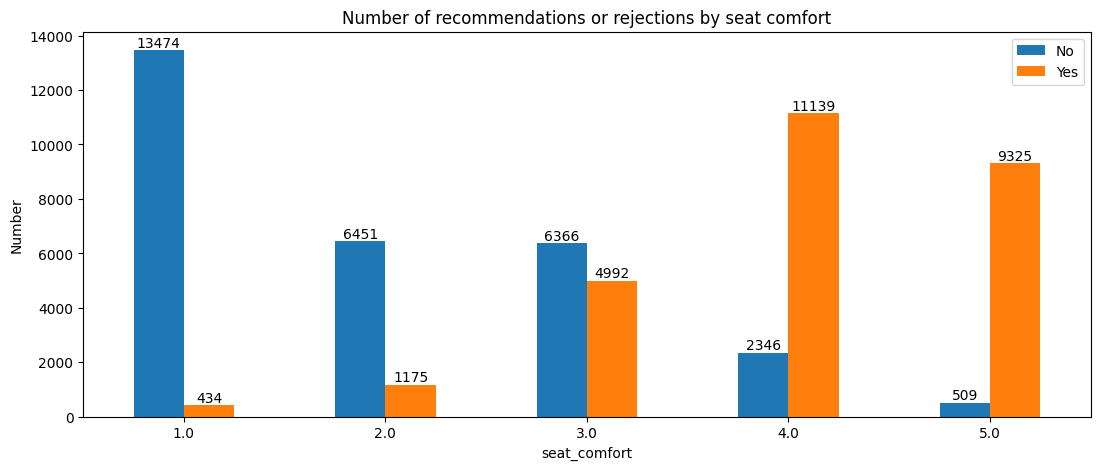

In [ ]:
# Chart - 8 visualization code
plots = recommend_by_seat.plot(kind='bar',figsize=(13,5))
plt.title('Number of recommendations or rejections by seat comfort')
plt.ylabel('Number')
plt.xticks(rotation=0)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

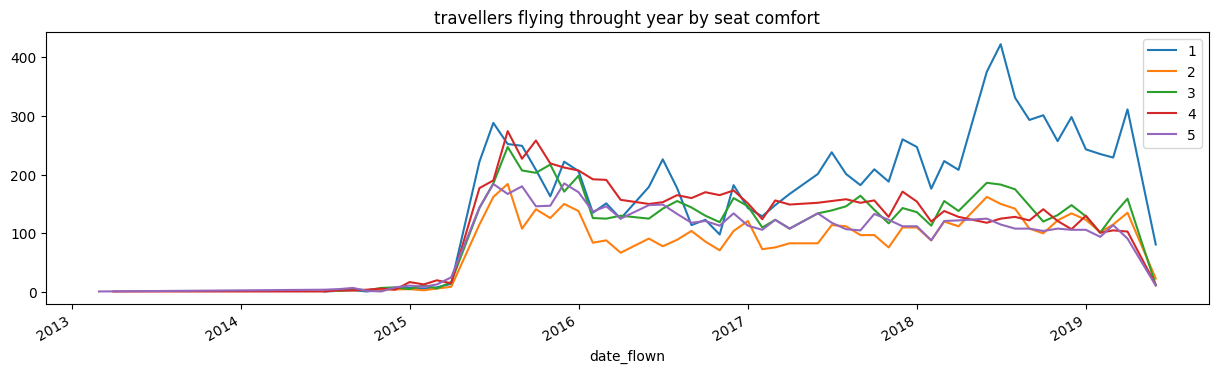

In [ ]:
plt.figure(figsize=(15,4))
df[df['seat_comfort']==1].groupby('date_flown')['author'].count().plot(kind='line',label='1')
df[df['seat_comfort']==2].groupby('date_flown')['author'].count().plot(kind='line',label='2')
df[df['seat_comfort']==3].groupby('date_flown')['author'].count().plot(kind='line',label='3')
df[df['seat_comfort']==4].groupby('date_flown')['author'].count().plot(kind='line',label='4')
df[df['seat_comfort']==5].groupby('date_flown')['author'].count().plot(kind='line',label='5')
plt.title('travellers flying throught year by seat comfort')
plt.legend();

##### 1. Why did you pick the specific chart?

*  Bar charts are useful in comparing values for different categories.

*  Line charts are used in tracking trends and changes in time series

##### 2. What is/are the insight(s) found from the chart?

We have done analysis for feature seat_comfort and most of the people have rated them 1,4 and 5 respectively. Seat quality gradually decrecased till year 2018-19 and then slightly increased.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Seat comfort is mostly affecting the travelling experience adversely. It will result in losses.

#### Chart - 9

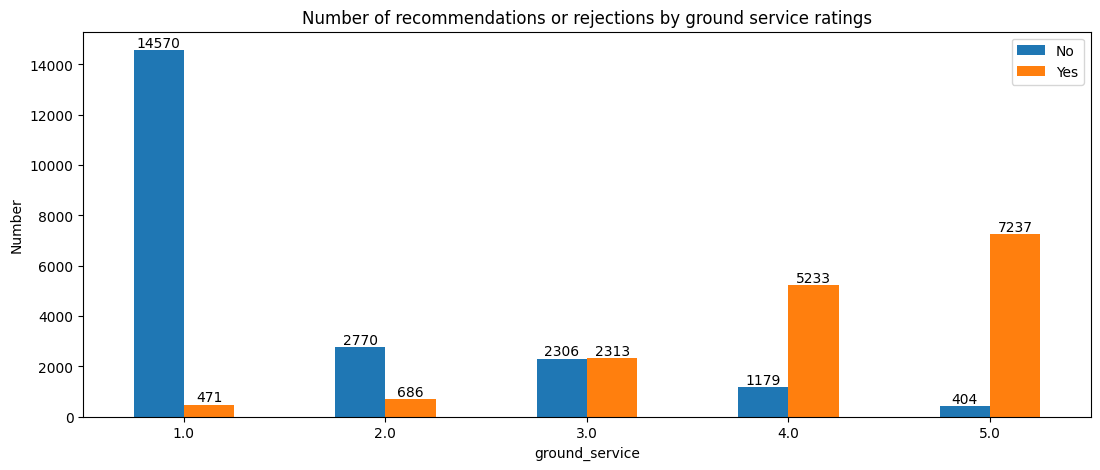

In [ ]:
# Chart - 9 visualization code
plots = recommend_by_ground_service.plot(kind='bar',figsize=(13,5))
plt.title('Number of recommendations or rejections by ground service ratings')
plt.ylabel('Number')
plt.xticks(rotation=0)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

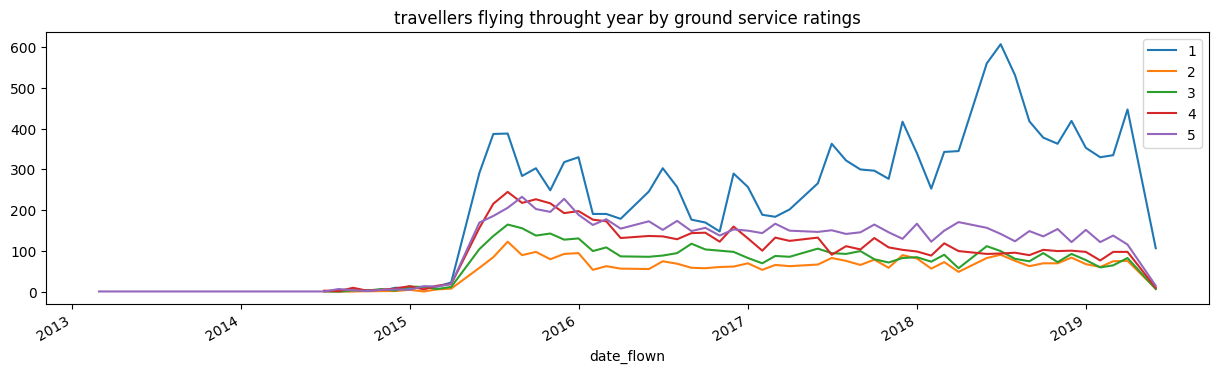

In [ ]:
plt.figure(figsize=(15,4))
df[df['ground_service']==1].groupby('date_flown')['author'].count().plot(kind='line',label='1')
df[df['ground_service']==2].groupby('date_flown')['author'].count().plot(kind='line',label='2')
df[df['ground_service']==3].groupby('date_flown')['author'].count().plot(kind='line',label='3')
df[df['ground_service']==4].groupby('date_flown')['author'].count().plot(kind='line',label='4')
df[df['ground_service']==5].groupby('date_flown')['author'].count().plot(kind='line',label='5')
plt.title('travellers flying throught years by ground service ratings')
plt.legend();

##### 1. Why did you pick the specific chart?

*  Bar charts are useful in comparing values for different categories.

*  Line charts are used in tracking trends and changes in time series

##### 2. What is/are the insight(s) found from the chart?

We can see that a large amount of the travellers have rated the ground service very poorly.The ratings also decreased gradually till year 2018-19 and then slightly improved. The travellers who recommended the airline rated the service in 3-5 range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The airlines should try to keep the seat quality in ratings of 3-5 and more close to 5 for more recommendations.

#### Chart - 10

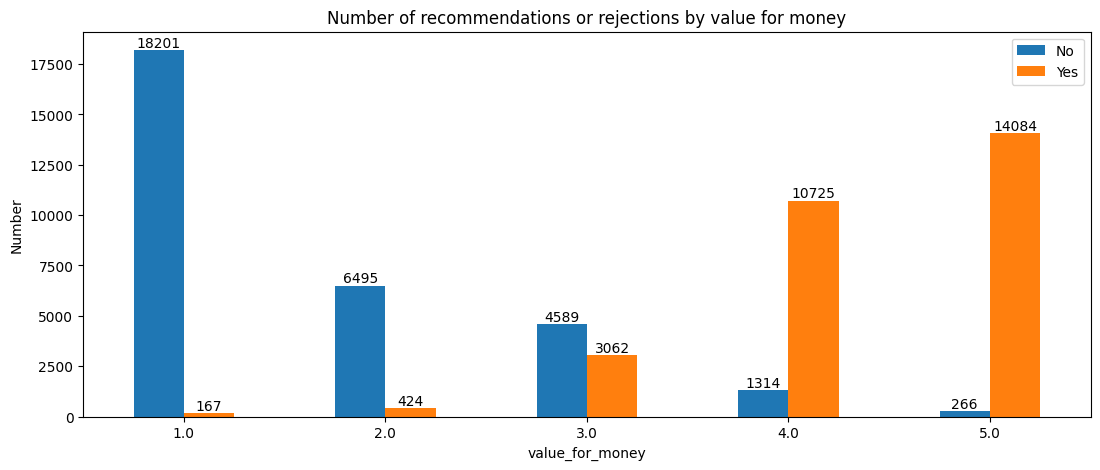

In [ ]:
# Chart - 10 visualization code
plots = recommend_by_value_money.plot(kind='bar',figsize=(13,5))
plt.title('Number of recommendations or rejections by value for money')
plt.ylabel('Number')
plt.xticks(rotation=0)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

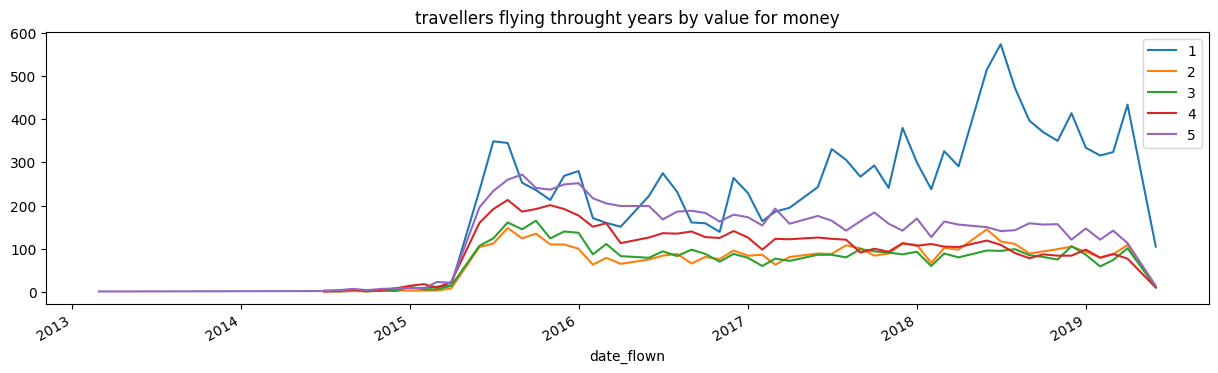

In [ ]:
plt.figure(figsize=(15,4))
df[df['value_for_money']==1].groupby('date_flown')['author'].count().plot(kind='line',label='1')
df[df['value_for_money']==2].groupby('date_flown')['author'].count().plot(kind='line',label='2')
df[df['value_for_money']==3].groupby('date_flown')['author'].count().plot(kind='line',label='3')
df[df['value_for_money']==4].groupby('date_flown')['author'].count().plot(kind='line',label='4')
df[df['value_for_money']==5].groupby('date_flown')['author'].count().plot(kind='line',label='5')
plt.title('travellers flying throught years by value for money')
plt.legend();

##### 1. Why did you pick the specific chart?

*  Bar charts are useful in comparing values for different categories.

*  Line charts are used in tracking trends and changes in time series

##### 2. What is/are the insight(s) found from the chart?

Same pattern follows here as well for value for money. Logically, it seems to be one of the more important feature in determining if airline will be recommended.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is one of the main features to prioritize on for better business. If people do not find good value for money, the recommendatins will be harder to come by.

#### Chart - 11

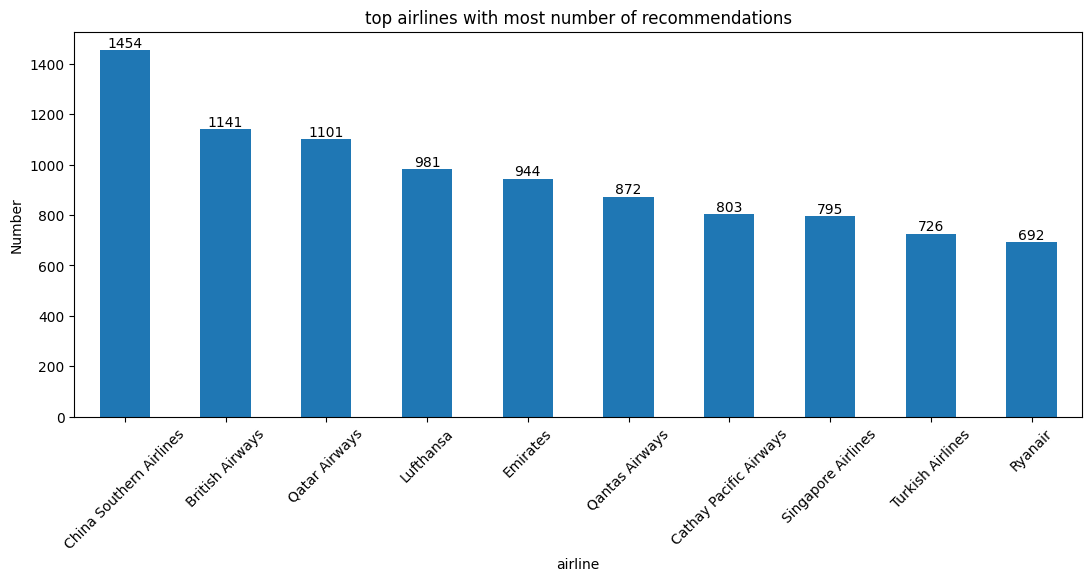

In [ ]:
# Chart - 11 visualization code
plots = top10['Number'].plot(kind='bar',figsize=(13,5))
plt.title('top airlines with most number of recommendations')
plt.ylabel('Number')
plt.xticks(rotation=45)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

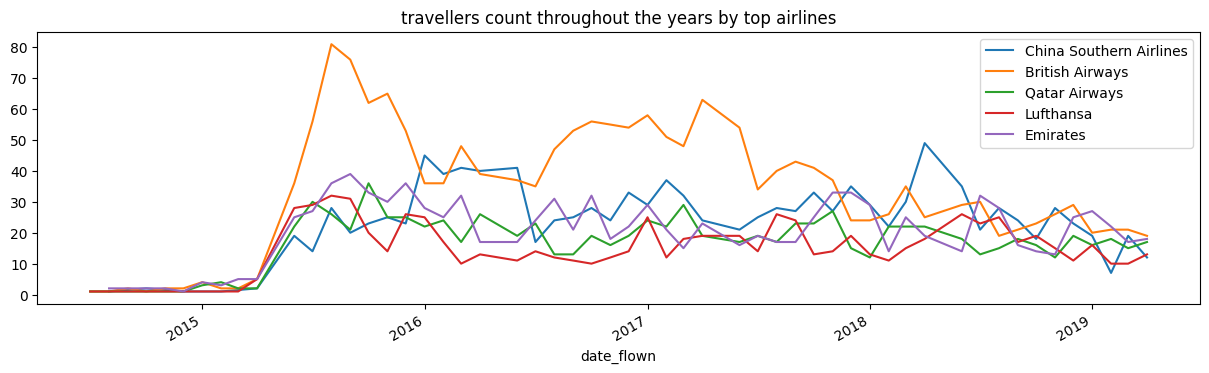

In [ ]:
plt.figure(figsize=(15,4))
for i in top10.index[:5]:
    df[df['airline']==i].groupby('date_flown')['author'].count().plot(kind='line',label=i)
plt.title('travellers count throughout the years by top airlines')
plt.legend();

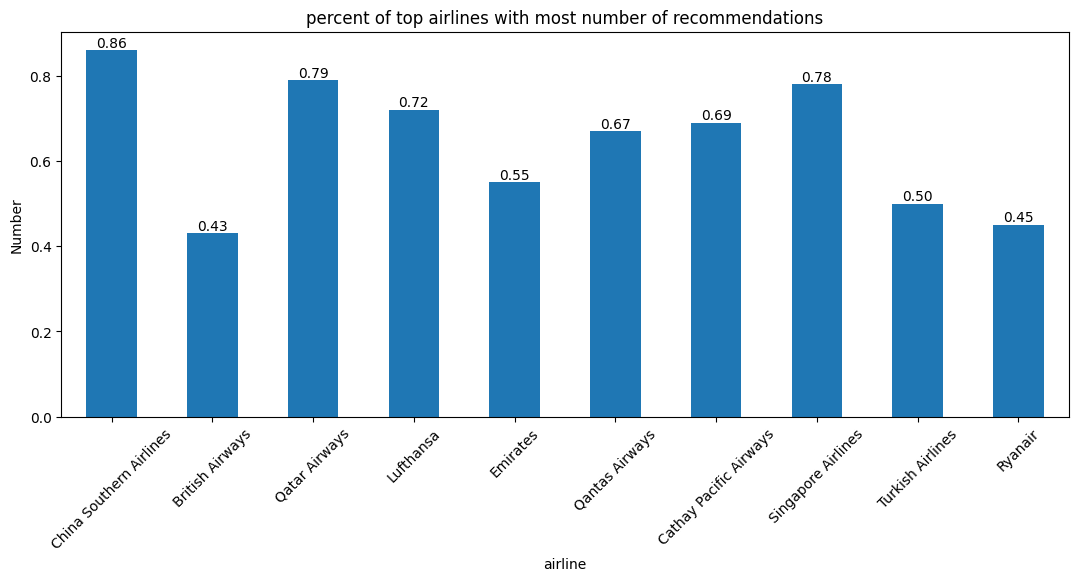

In [ ]:
plots = top10['percent'].plot(kind='bar',figsize=(13,5))
plt.title('percent of top airlines with most number of recommendations')
plt.ylabel('Number')
plt.xticks(rotation=45)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

##### 1. Why did you pick the specific chart?

*  Bar charts are useful in comparing values for different categories.

*  Line charts are used in tracking trends and changes in time series

##### 2. What is/are the insight(s) found from the chart?

The bar chart shows the most recommended airlines by numbers, but not by fraction of travellers flying. But only China Southern Airlines, Qatar Airlines, Lufthansa had better fraction of travellers recommended among the top 5 airlines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These airlines should try to keep the fraction of travellers recommending to be higher. Few airlines have percentage of travellers recommending low and will lead in large number of customer and revenue loss as the number of travellers are high.

#### Chart - 12

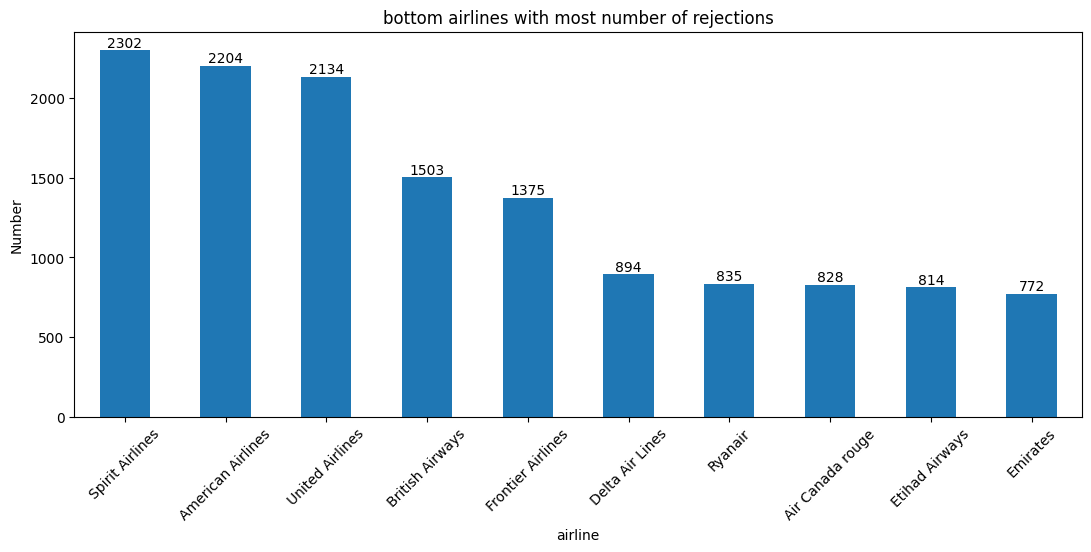

In [ ]:
# Chart - 12 visualization code
plots = bottom10['Number'].plot(kind='bar',figsize=(13,5))
plt.title('bottom airlines with most number of rejections')
plt.ylabel('Number')
plt.xticks(rotation=45)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

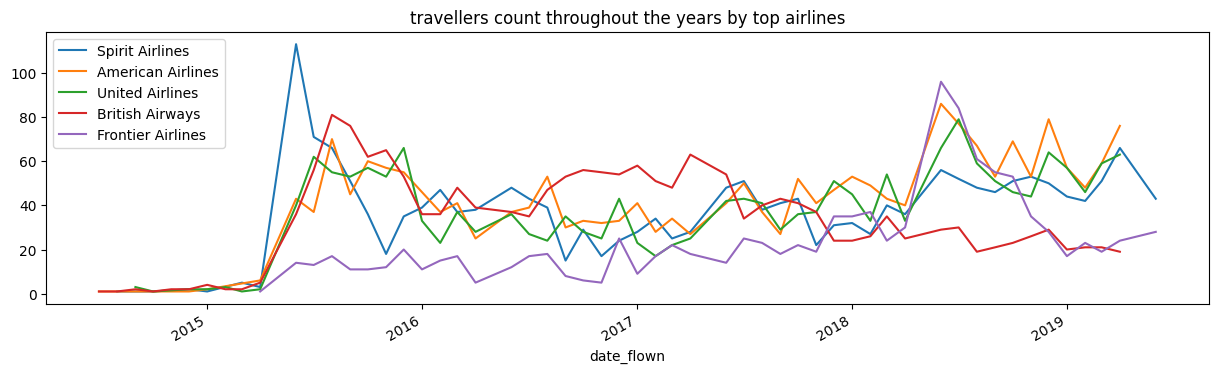

In [ ]:
plt.figure(figsize=(15,4))
for i in bottom10.index[:5]:
    df[df['airline']==i].groupby('date_flown')['author'].count().plot(kind='line',label=i)
plt.title('travellers count throughout the years by top airlines')
plt.legend();

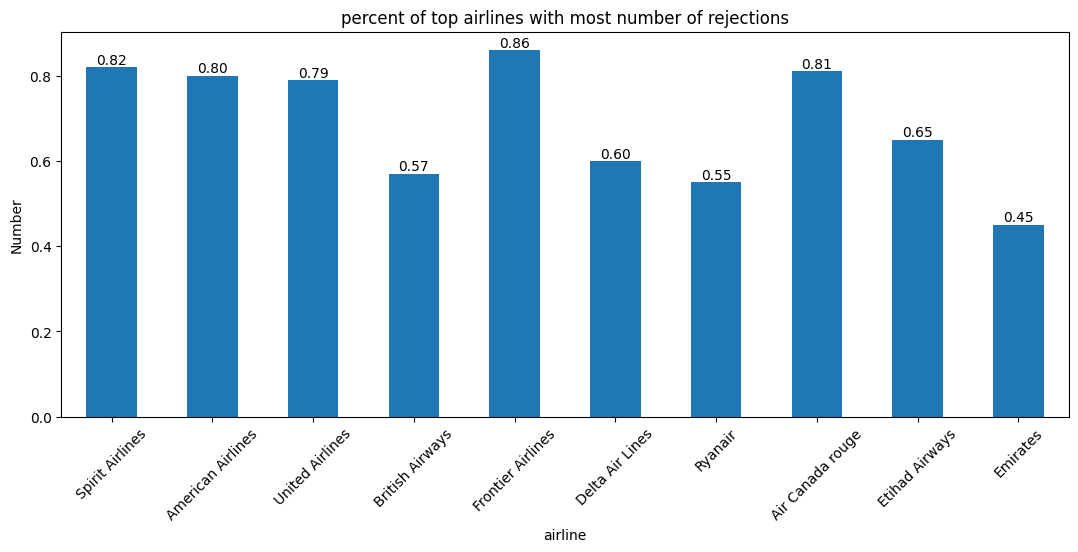

In [ ]:
plots = bottom10['percent'].plot(kind='bar',figsize=(13,5))
plt.title('percent of top airlines with most number of rejections')
plt.ylabel('Number')
plt.xticks(rotation=45)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

##### 1. Why did you pick the specific chart?

*  Bar charts are useful in comparing values for different categories.

*  Line charts are used in tracking trends and changes in time series

##### 2. What is/are the insight(s) found from the chart?

Spirit, American and United airlines had the most number of rejections. The line charts show the travellers by airlines throughout the years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above airlines need to improve there service the most to imporve traveller experience and recommendations.

#### Chart - 13

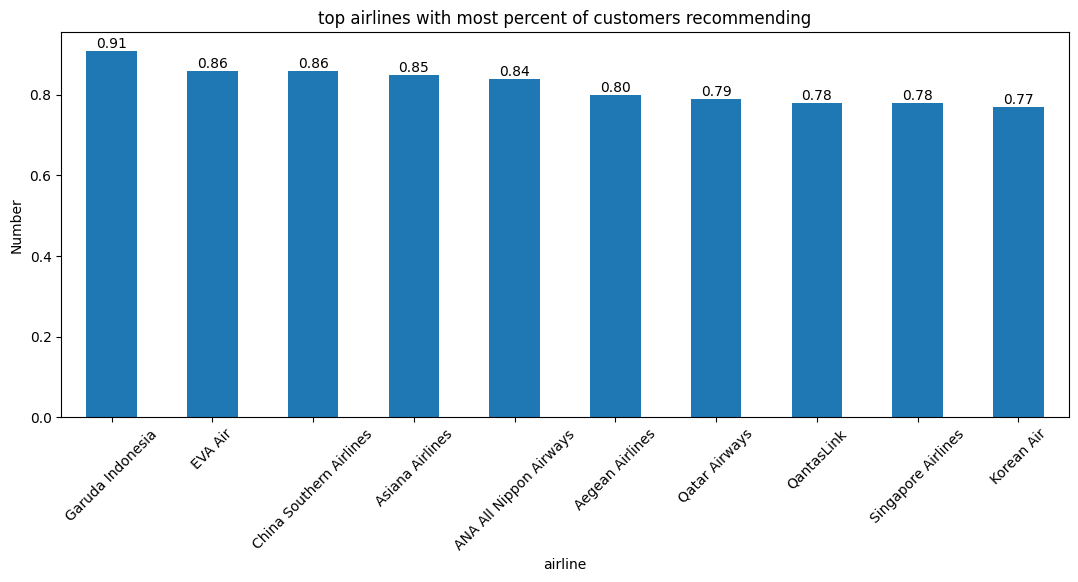

In [ ]:
# Chart - 13 visualization code
plots = top10_percent['percent'].plot(kind='bar',figsize=(13,5))
plt.title('top airlines with most percent of customers recommending')
plt.ylabel('Number')
plt.xticks(rotation=45)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

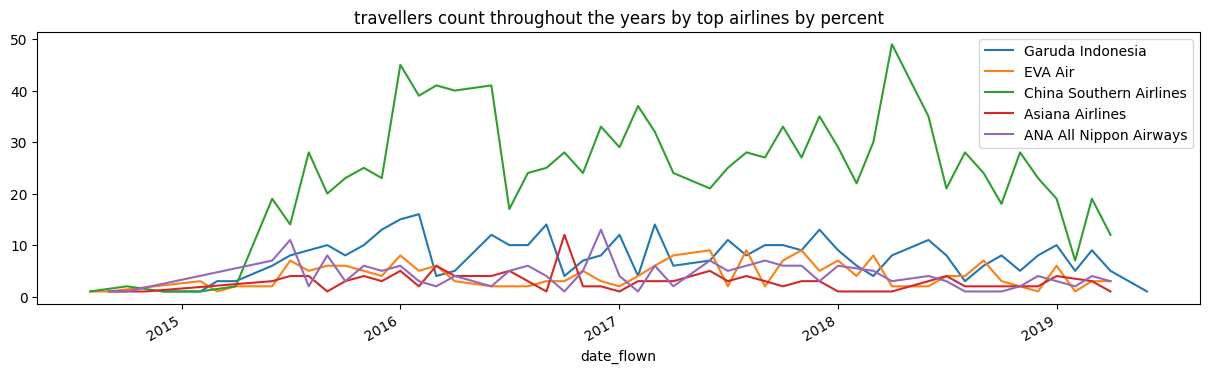

In [ ]:
plt.figure(figsize=(15,4))
for i in top10_percent.index[:5]:
    df[df['airline']==i].groupby('date_flown')['author'].count().plot(kind='line',label=i)
plt.title('travellers count throughout the years by top airlines by percent')
plt.legend();

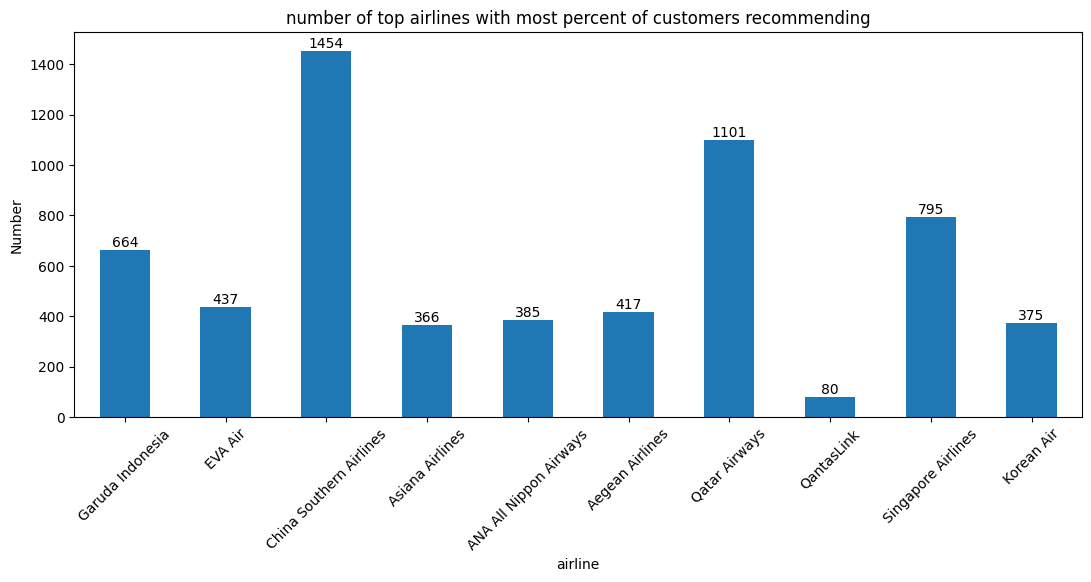

In [ ]:
#their number
plots = top10_percent['Number'].plot(kind='bar',figsize=(13,5))
plt.title('number of top airlines with most percent of customers recommending')
plt.ylabel('Number')
plt.xticks(rotation=45)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

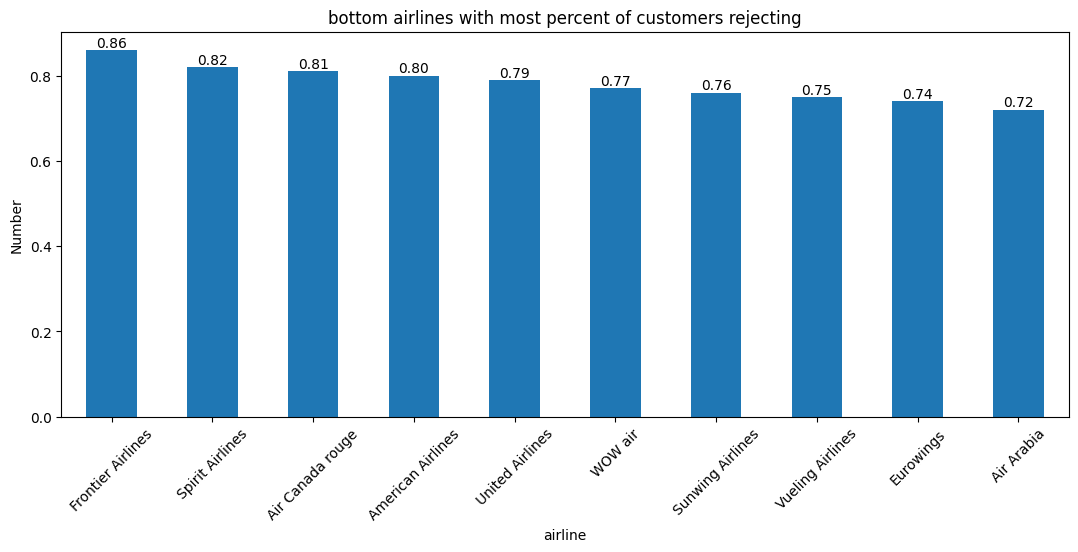

In [ ]:
plots = bottom10_percent['percent'].plot(kind='bar',figsize=(13,5))
plt.title('bottom airlines with most percent of customers rejecting')
plt.ylabel('Number')
plt.xticks(rotation=45)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

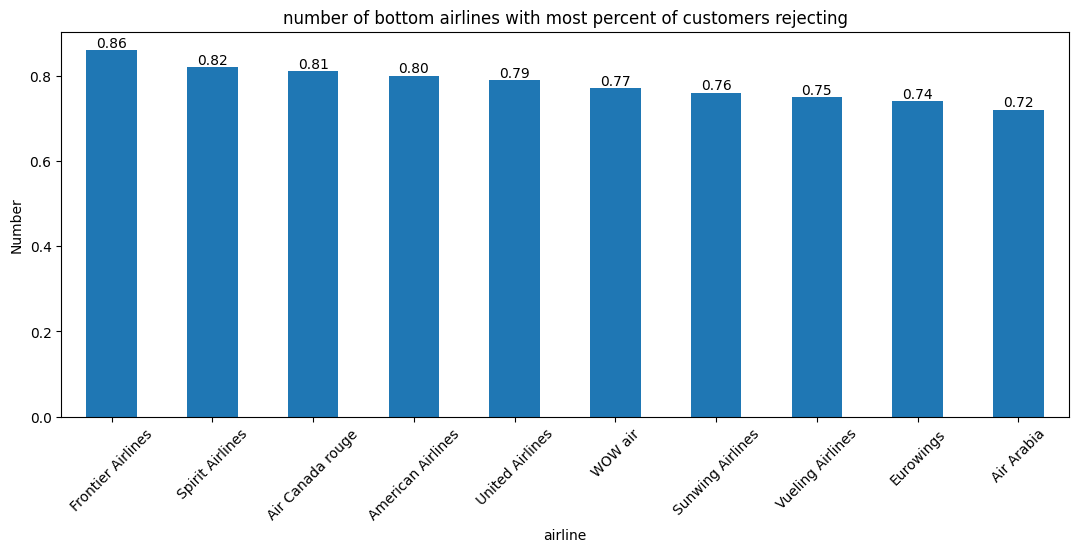

In [ ]:
plots = bottom10_percent['percent'].plot(kind='bar',figsize=(13,5))
plt.title('number of bottom airlines with most percent of customers rejecting')
plt.ylabel('Number')
plt.xticks(rotation=45)
for bar in plots.patches:
  plt.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

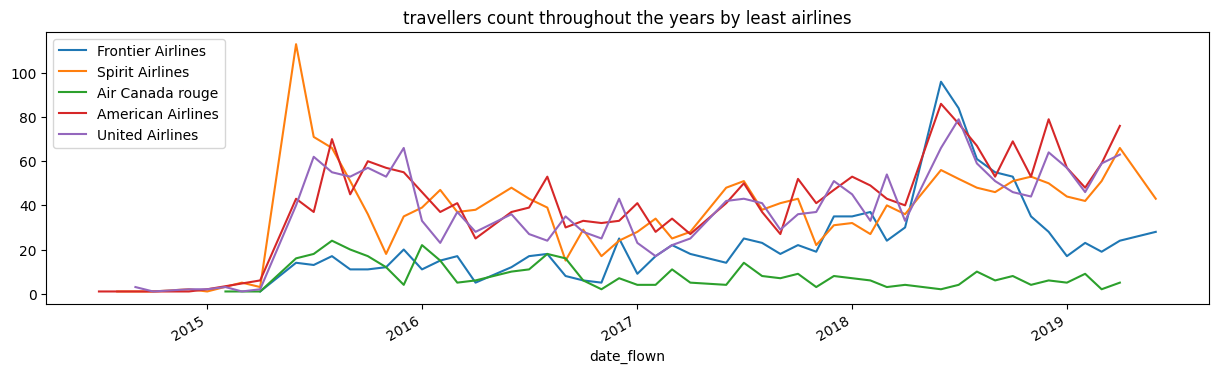

In [ ]:
plt.figure(figsize=(15,4))
for i in bottom10_percent.index[:5]:
    df[df['airline']==i].groupby('date_flown')['author'].count().plot(kind='line',label=i)
plt.title('travellers count throughout the years by least airlines')
plt.legend();

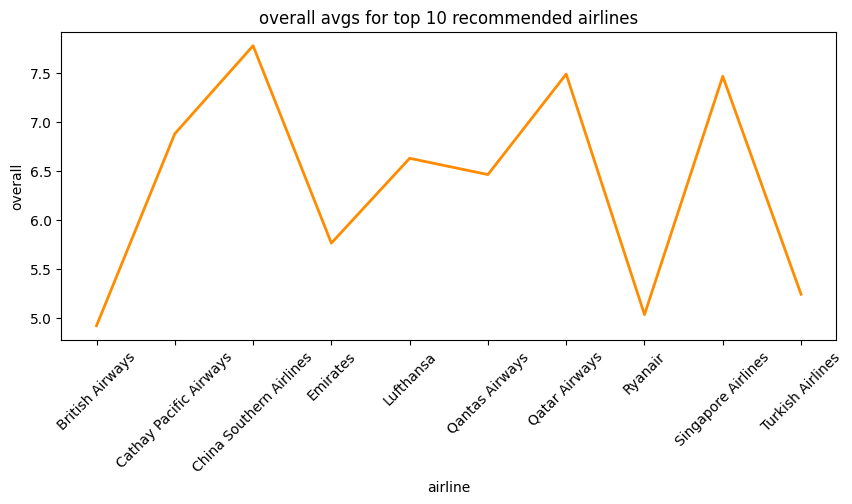

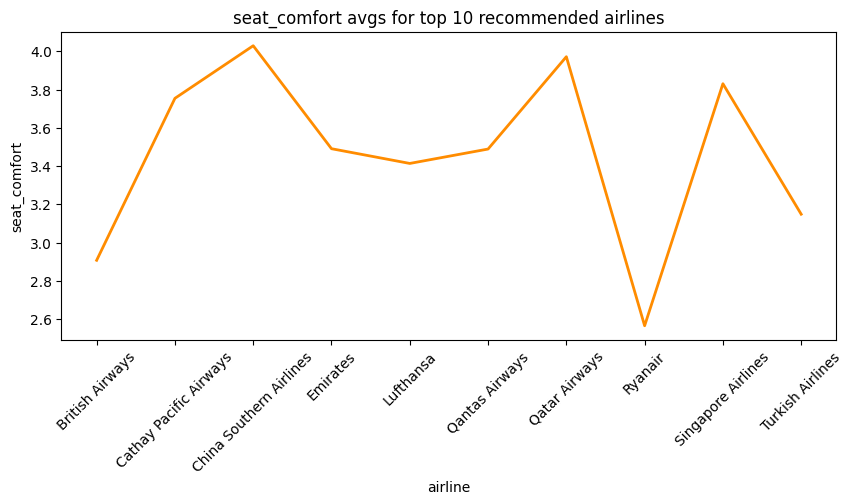

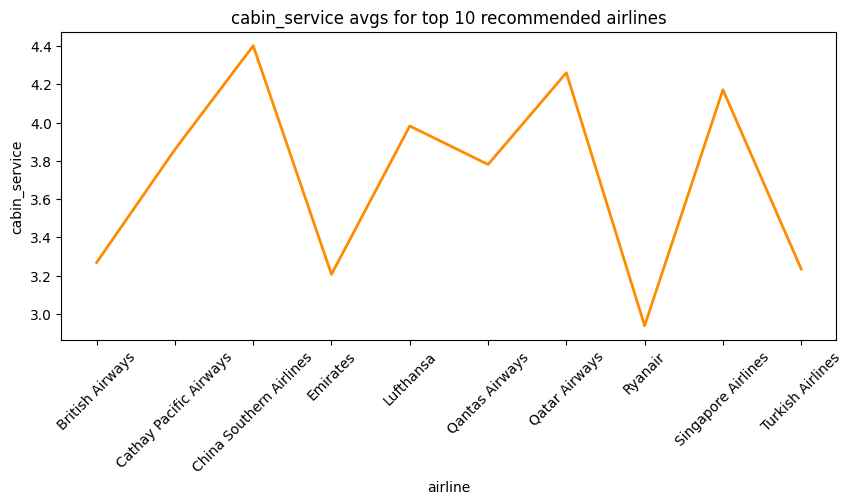

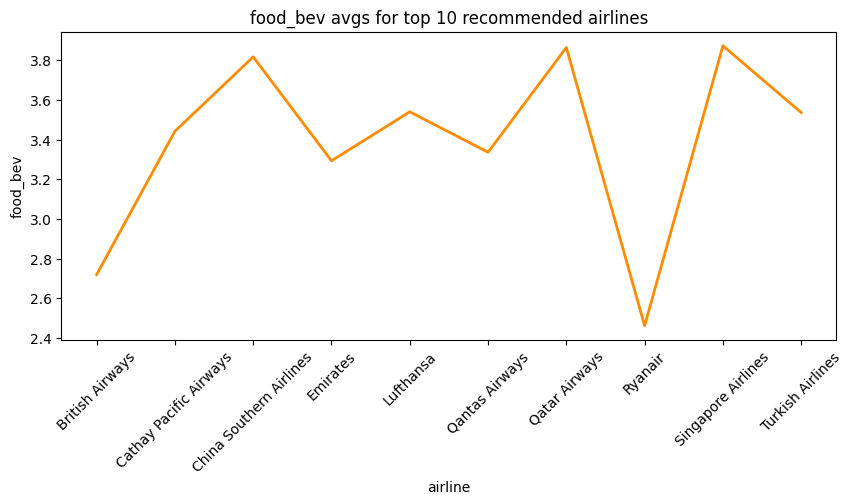

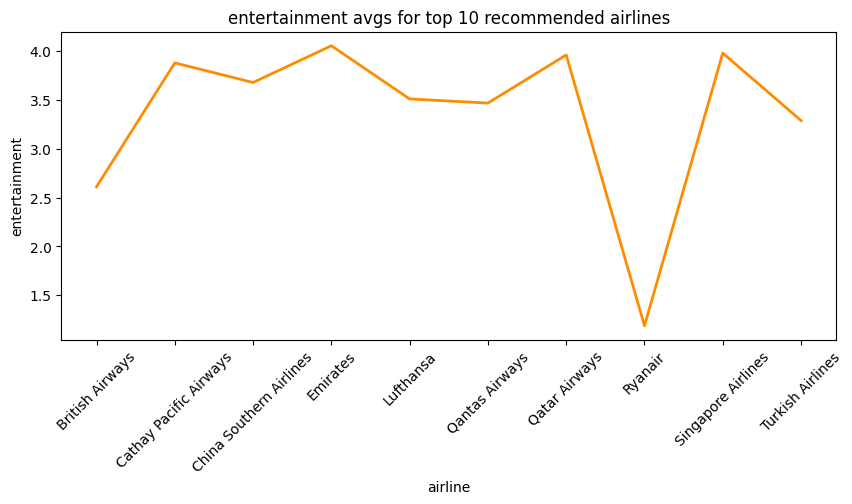

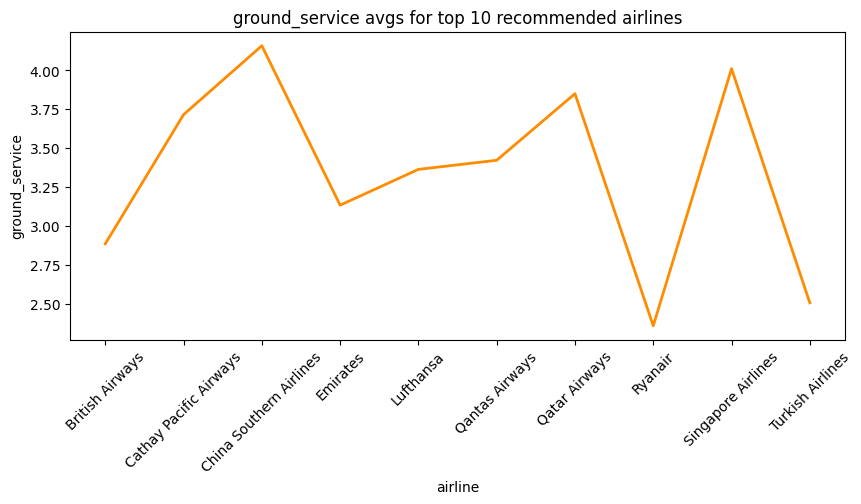

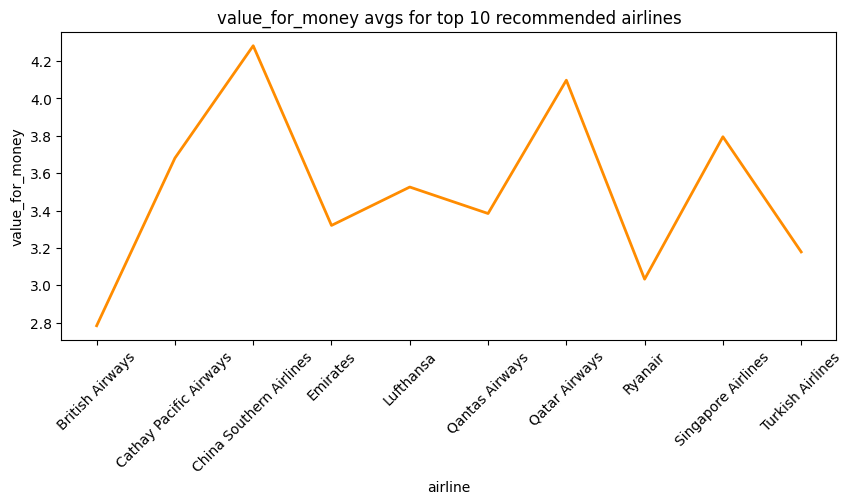

In [ ]:
for col in top10_avg:
  plt.figure(figsize=(10,4))
  plots = sns.lineplot(x=top10_avg.index,y=top10_avg[col],color='darkorange',lw=2)
  plt.title(f'{col} avgs for top 10 recommended airlines')
  plt.xticks(rotation=45);

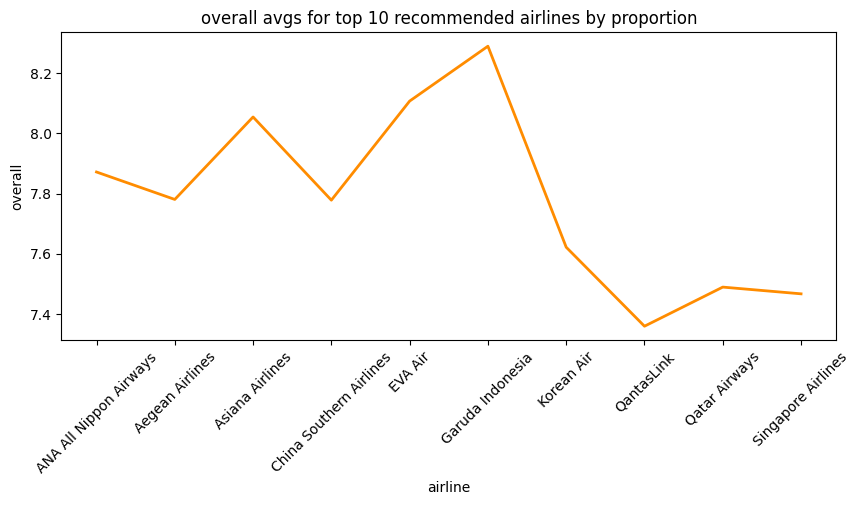

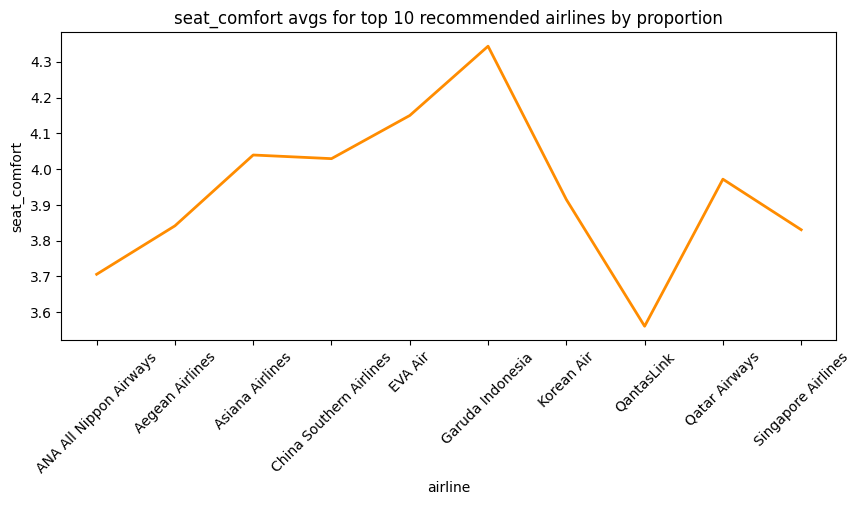

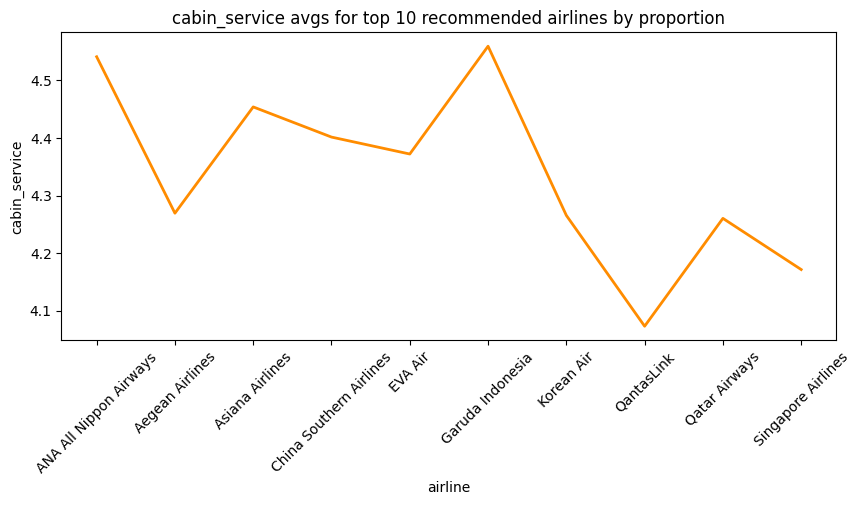

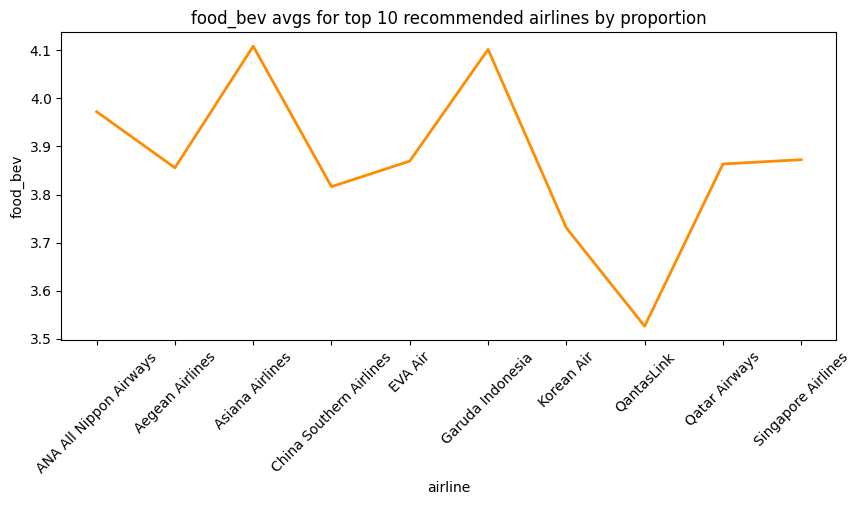

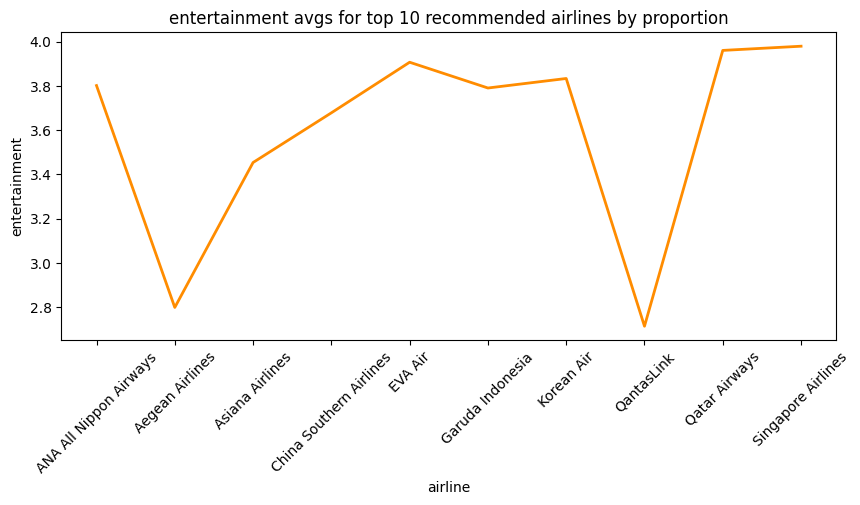

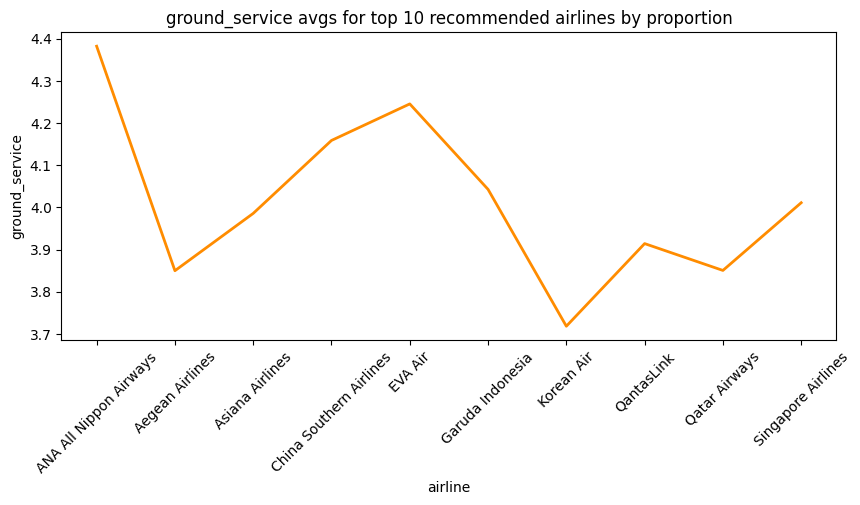

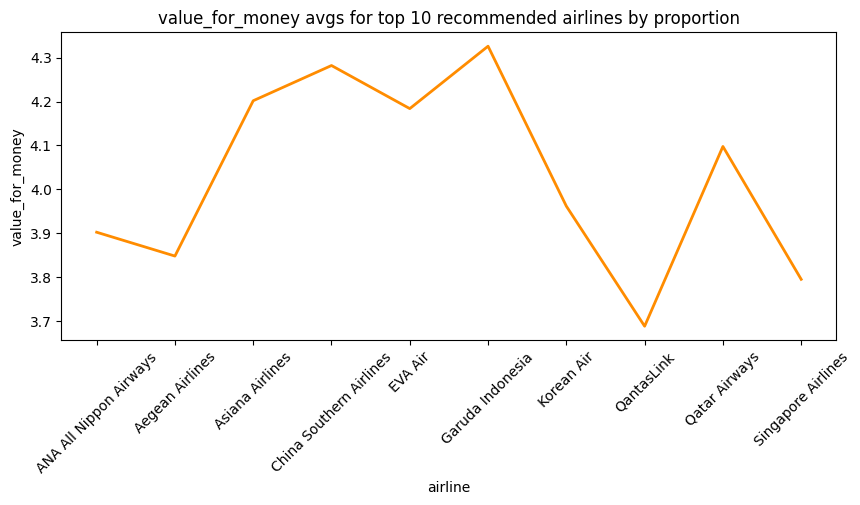

In [ ]:
for col in top10_percent_avg:
  plt.figure(figsize=(10,4))
  plots = sns.lineplot(x=top10_percent_avg.index,y=top10_percent_avg[col],color='darkorange',lw=2)
  plt.title(f'{col} avgs for top 10 recommended airlines by proportion')
  plt.xticks(rotation=45);

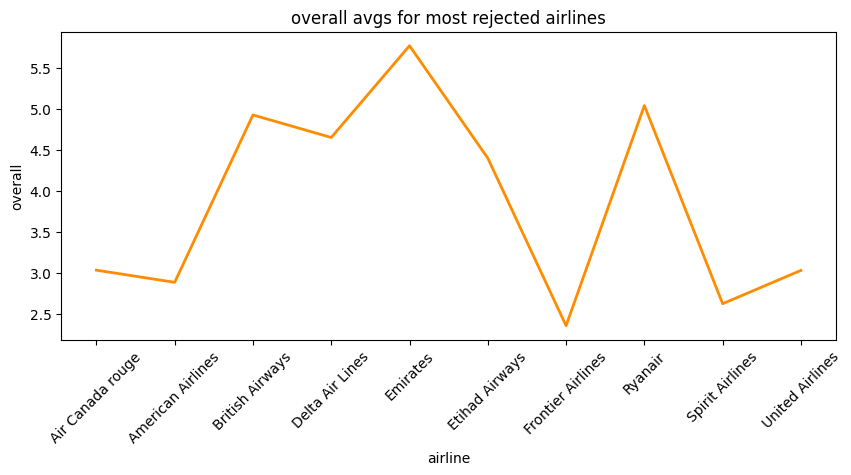

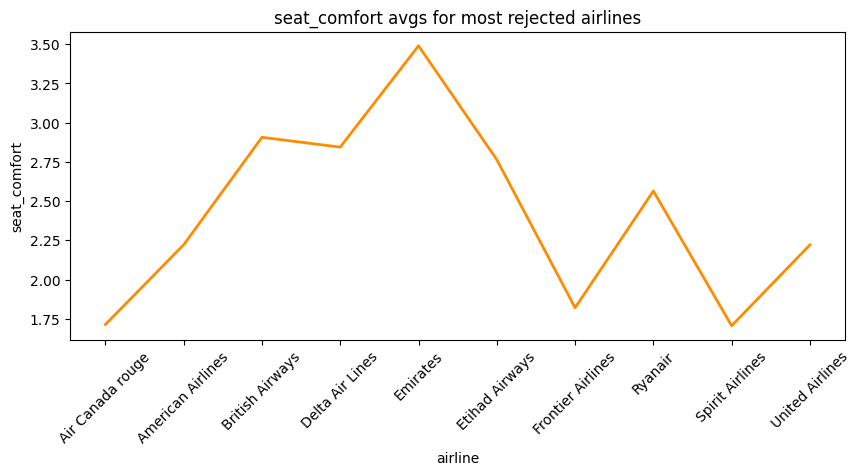

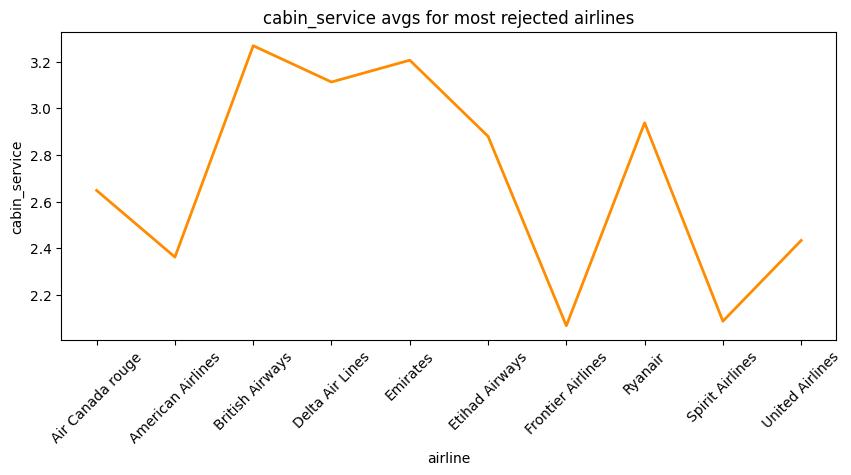

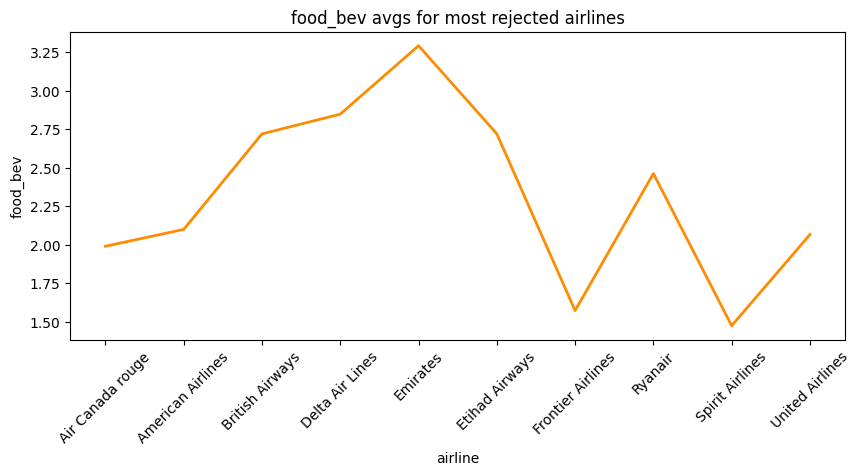

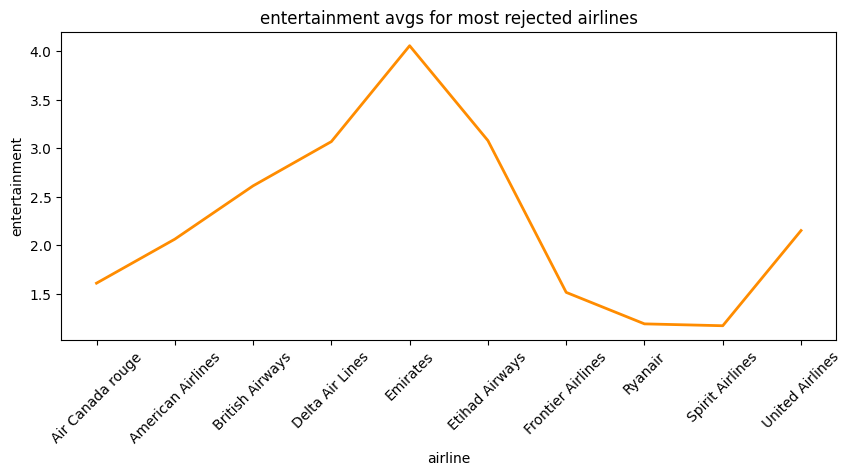

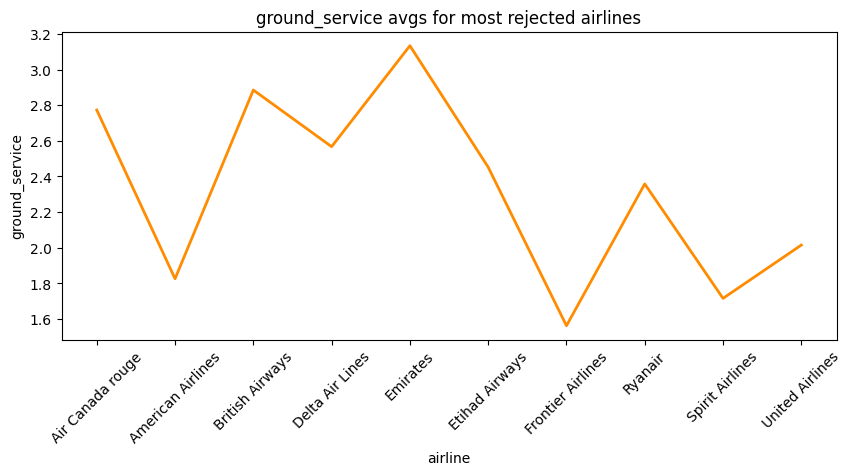

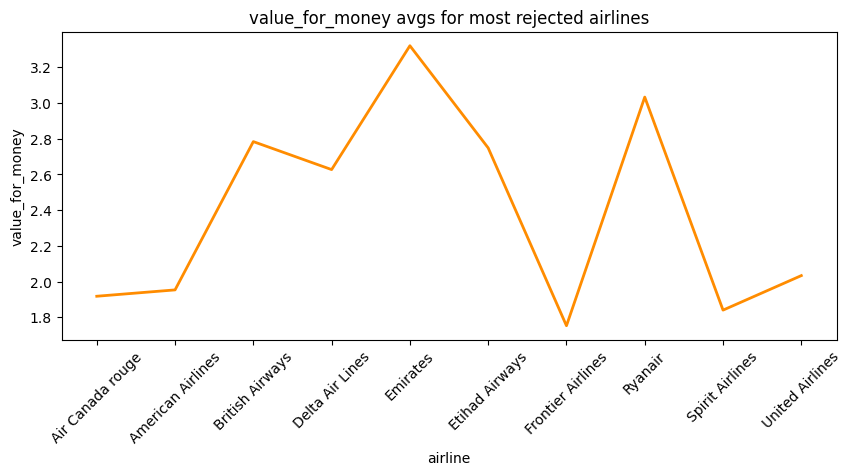

In [ ]:
for col in bottom10_avg:
  plt.figure(figsize=(10,4))
  plots = sns.lineplot(x=bottom10_avg.index,y=bottom10_avg[col],color='darkorange',lw=2)
  plt.title(f'{col} avgs for most rejected airlines')
  plt.xticks(rotation=45);

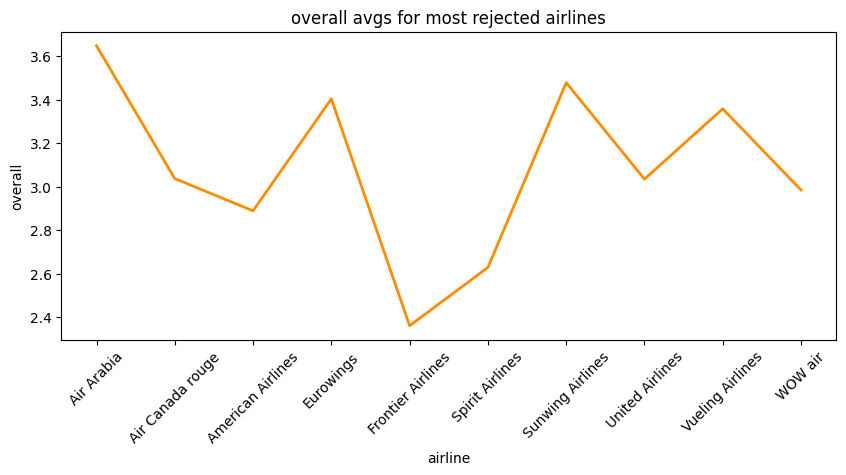

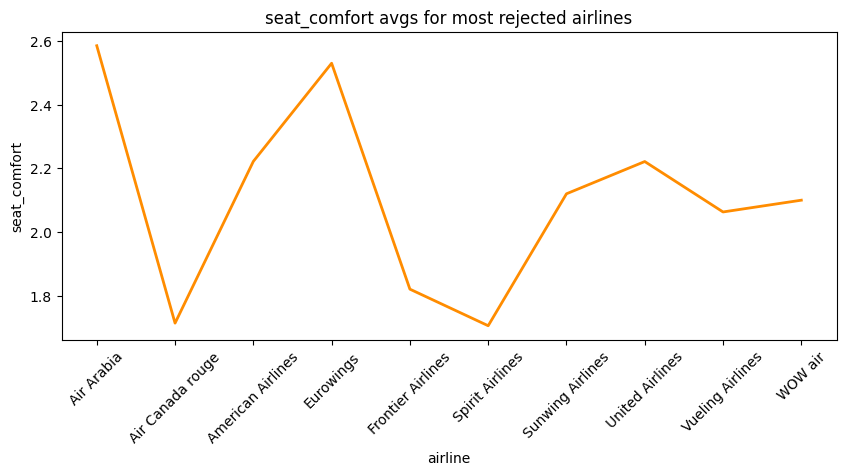

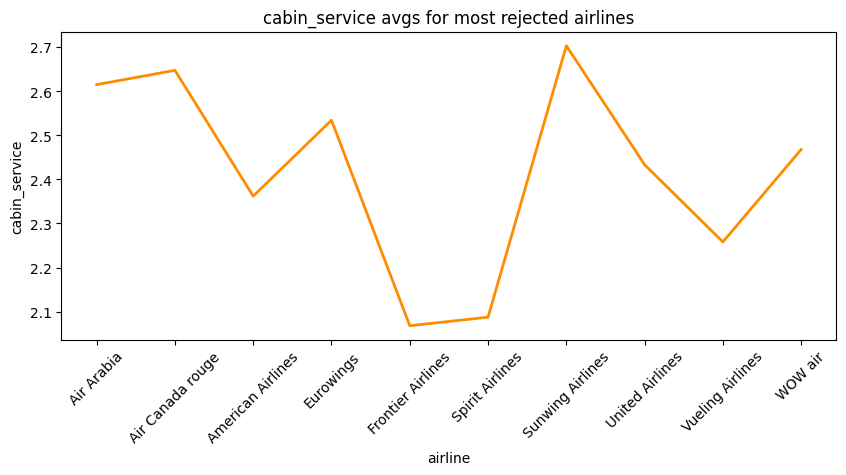

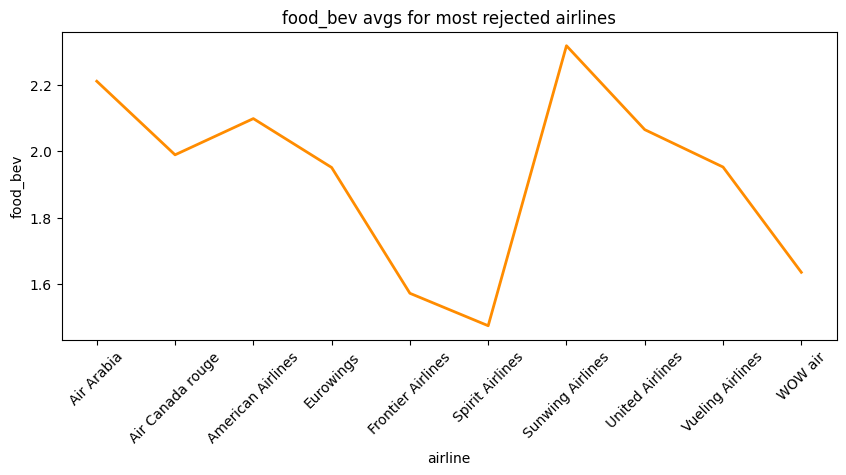

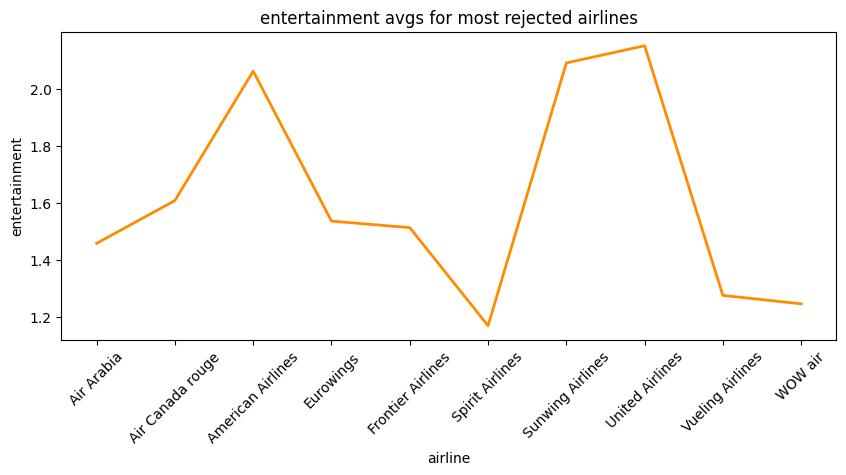

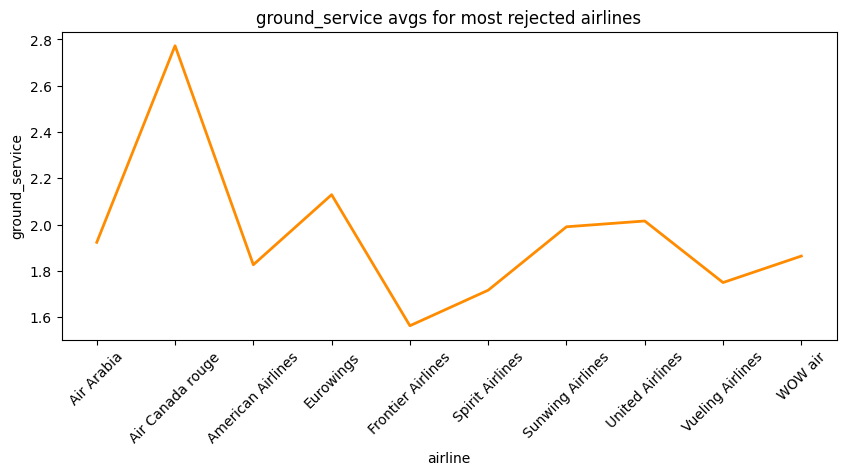

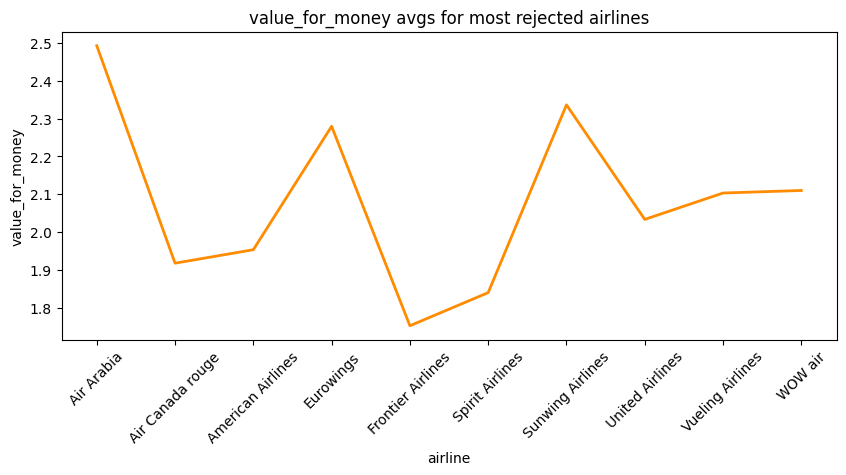

In [ ]:
for col in bottom10_percent_avg:
  plt.figure(figsize=(10,4))
  plots = sns.lineplot(x=bottom10_percent_avg.index,y=bottom10_percent_avg[col],color='darkorange',lw=2)
  plt.title(f'{col} avgs for most rejected airlines')
  plt.xticks(rotation=45);

##### 1. Why did you pick the specific chart?

*  Bar charts are useful in comparing values for different categories.

*  Line charts are used in tracking trends and changes in time series

##### 2. What is/are the insight(s) found from the chart?

The above charts show averages of **overall ratings, cabin service ratings, seat comfort ratings, food beverages, ground service rating entertainment** for most recommended by number and percentage, most rejected by number and percentage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The average for these feature was above 6 mostly for most recommended airlines and mostly below 3-4 for most rejected airlines giving us an idea of quality needed to improve recommendations.

#### Chart - 14 - Correlation Heatmap

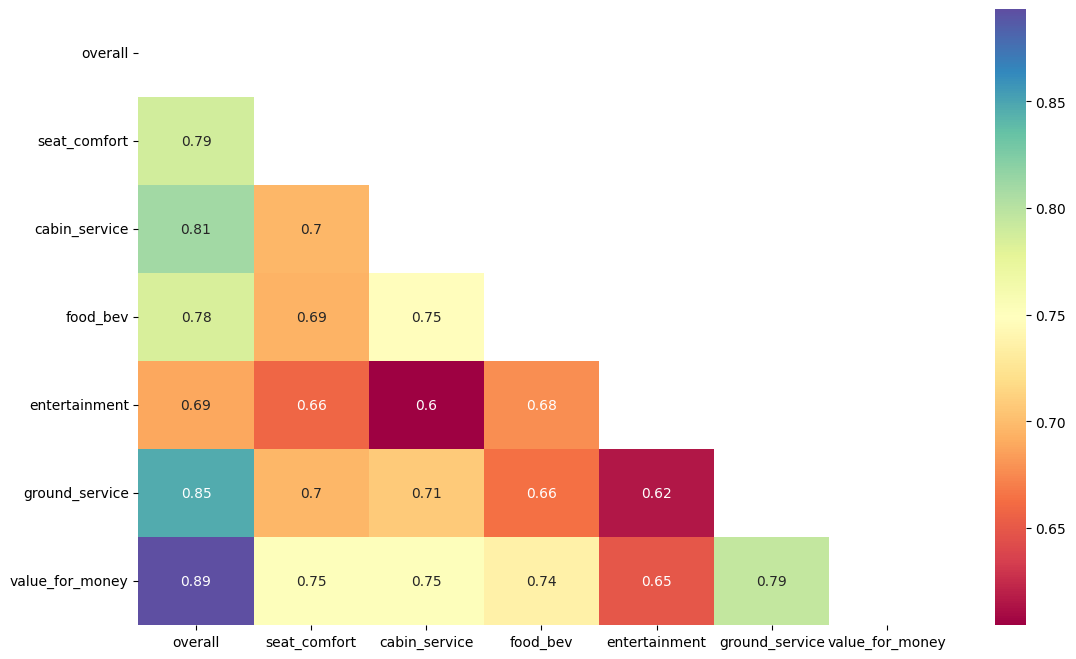

In [ ]:
# Correlation Heatmap visualization code
corr=df.corr(numeric_only=True)
mask=np.triu(corr)
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(numeric_only=True),cmap='Spectral',annot=True,mask=mask);

##### 1. Why did you pick the specific chart?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

##### 2. What is/are the insight(s) found from the chart?

We can see there is some correlation among most of the features giving us an idea that you can predict to some extent the quality of one feature.

#### Chart - 15 - Pair Plot

<Figure size 2000x1200 with 0 Axes>

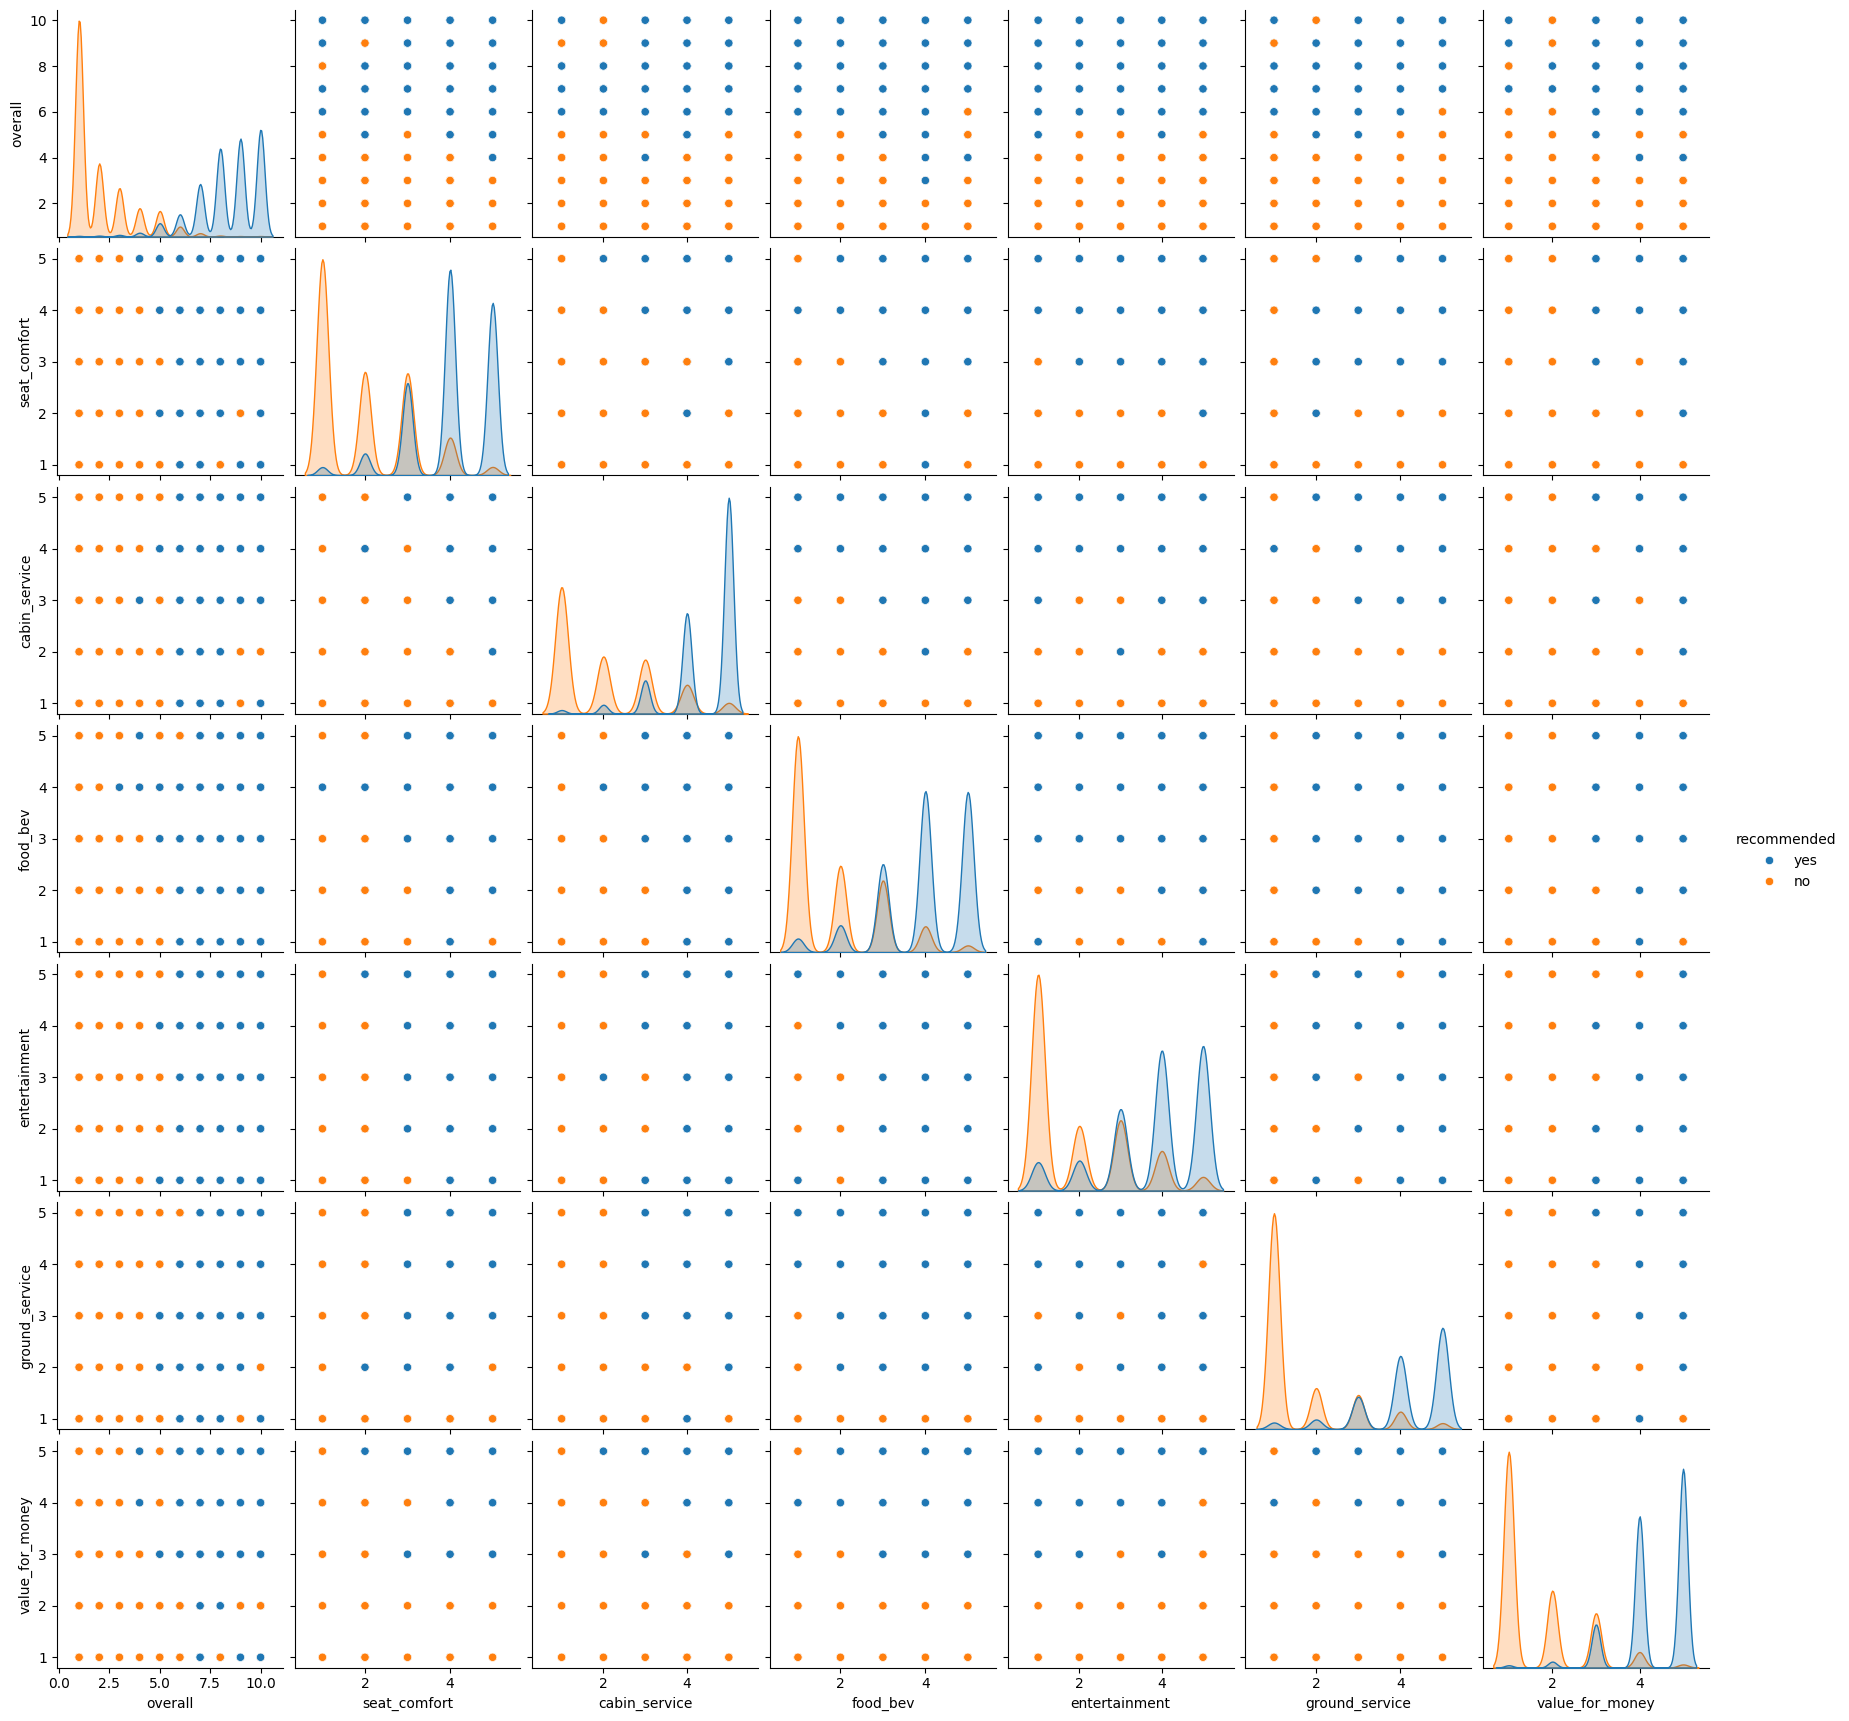

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(20,12))
sns.pairplot(df,hue='recommended');

##### 1. Why did you pick the specific chart?

A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. It combines both histogram and scatter plots, providing a unique overview of the dataset's distributions and correlations.

##### 2. What is/are the insight(s) found from the chart?

We can find patterns that show where the airlines are recommended and where they are rejected.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#removing rows with missing values in target variable
df=df.dropna(subset='recommended')

In [ ]:
#droping the variables which logically do not contribute to recommendation and deleting rows with target variable missing
df=df.drop(['aircraft','airline','review_date','author','date_flown','route','customer_review'],axis=1)

Airline and aircraft names do not contribute towards the quality of the flight and are just names similar to Author name.
Similarly dates and route also do not contribute towards the quality of the journey and hence in recommendation of the flight

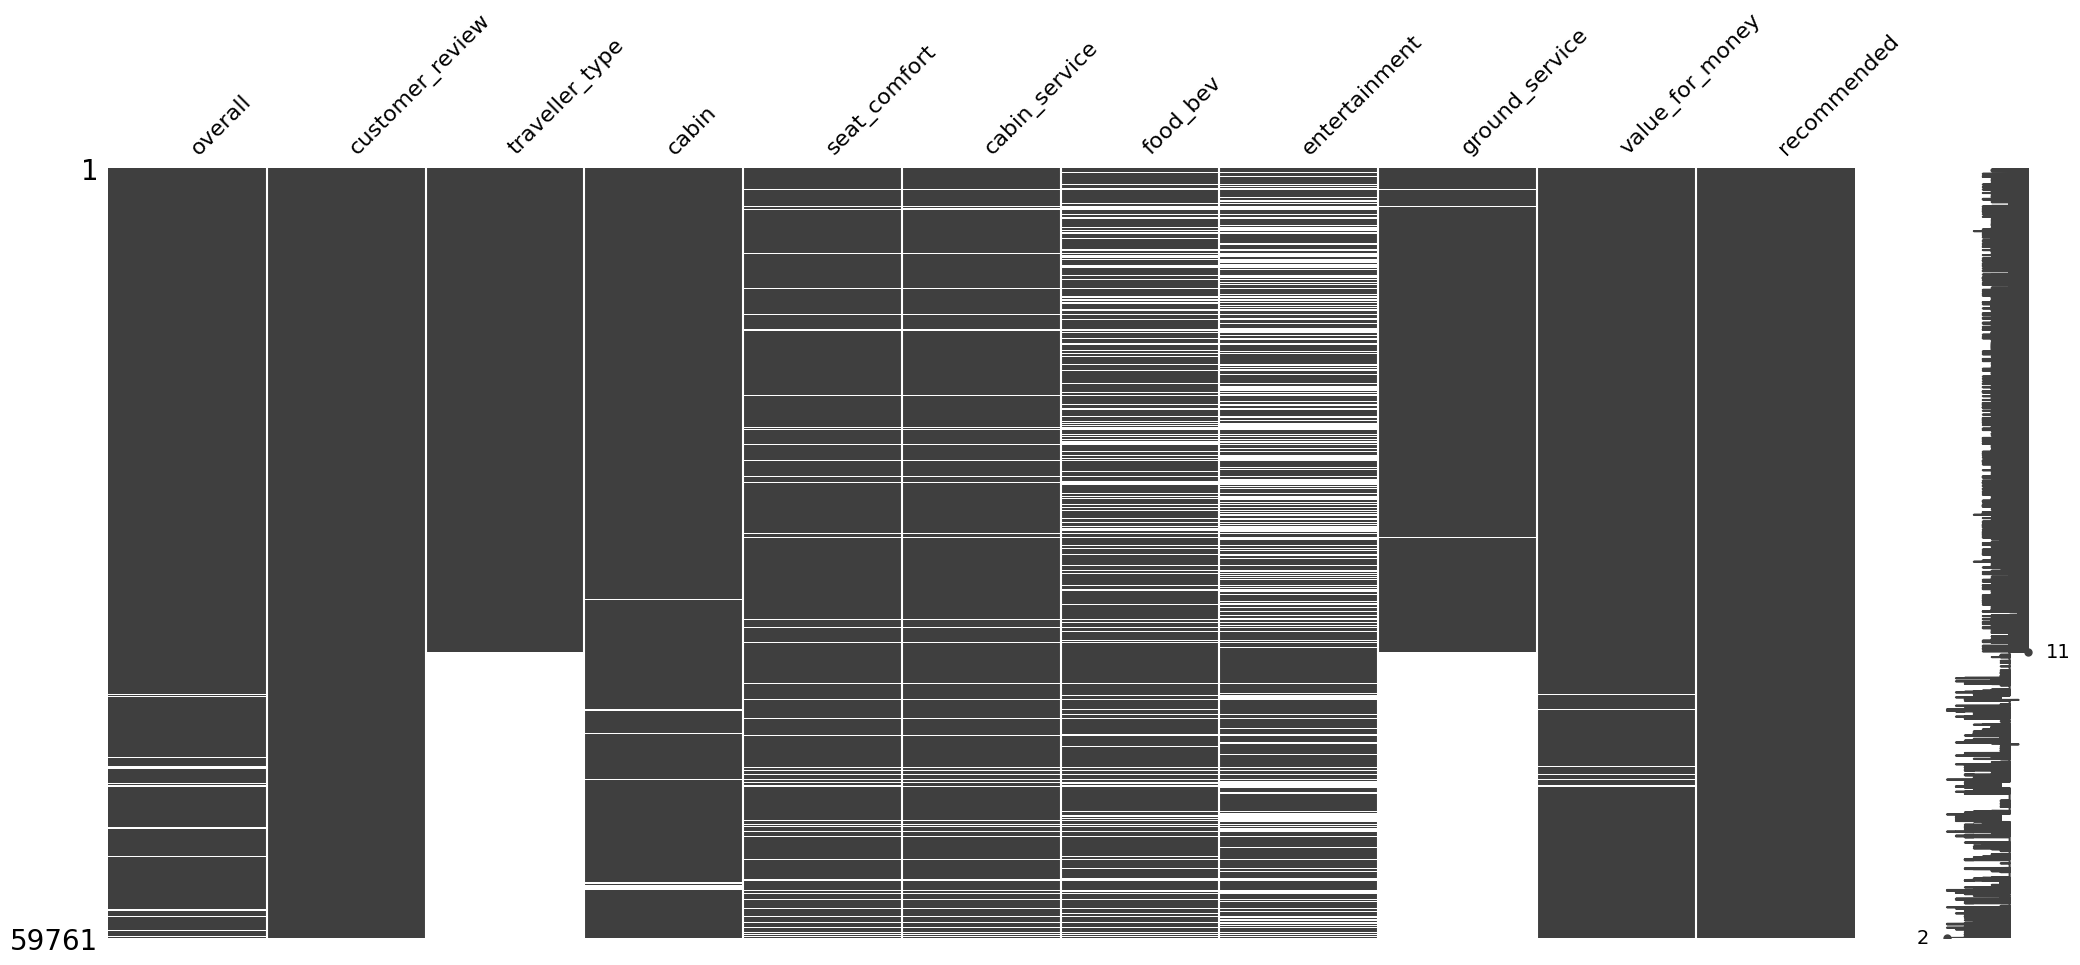

In [ ]:
msno.matrix(df.sort_values('traveller_type'));

missing values in traveller type and ground service look related. It could be a case of normal traveller type not opting for ground services

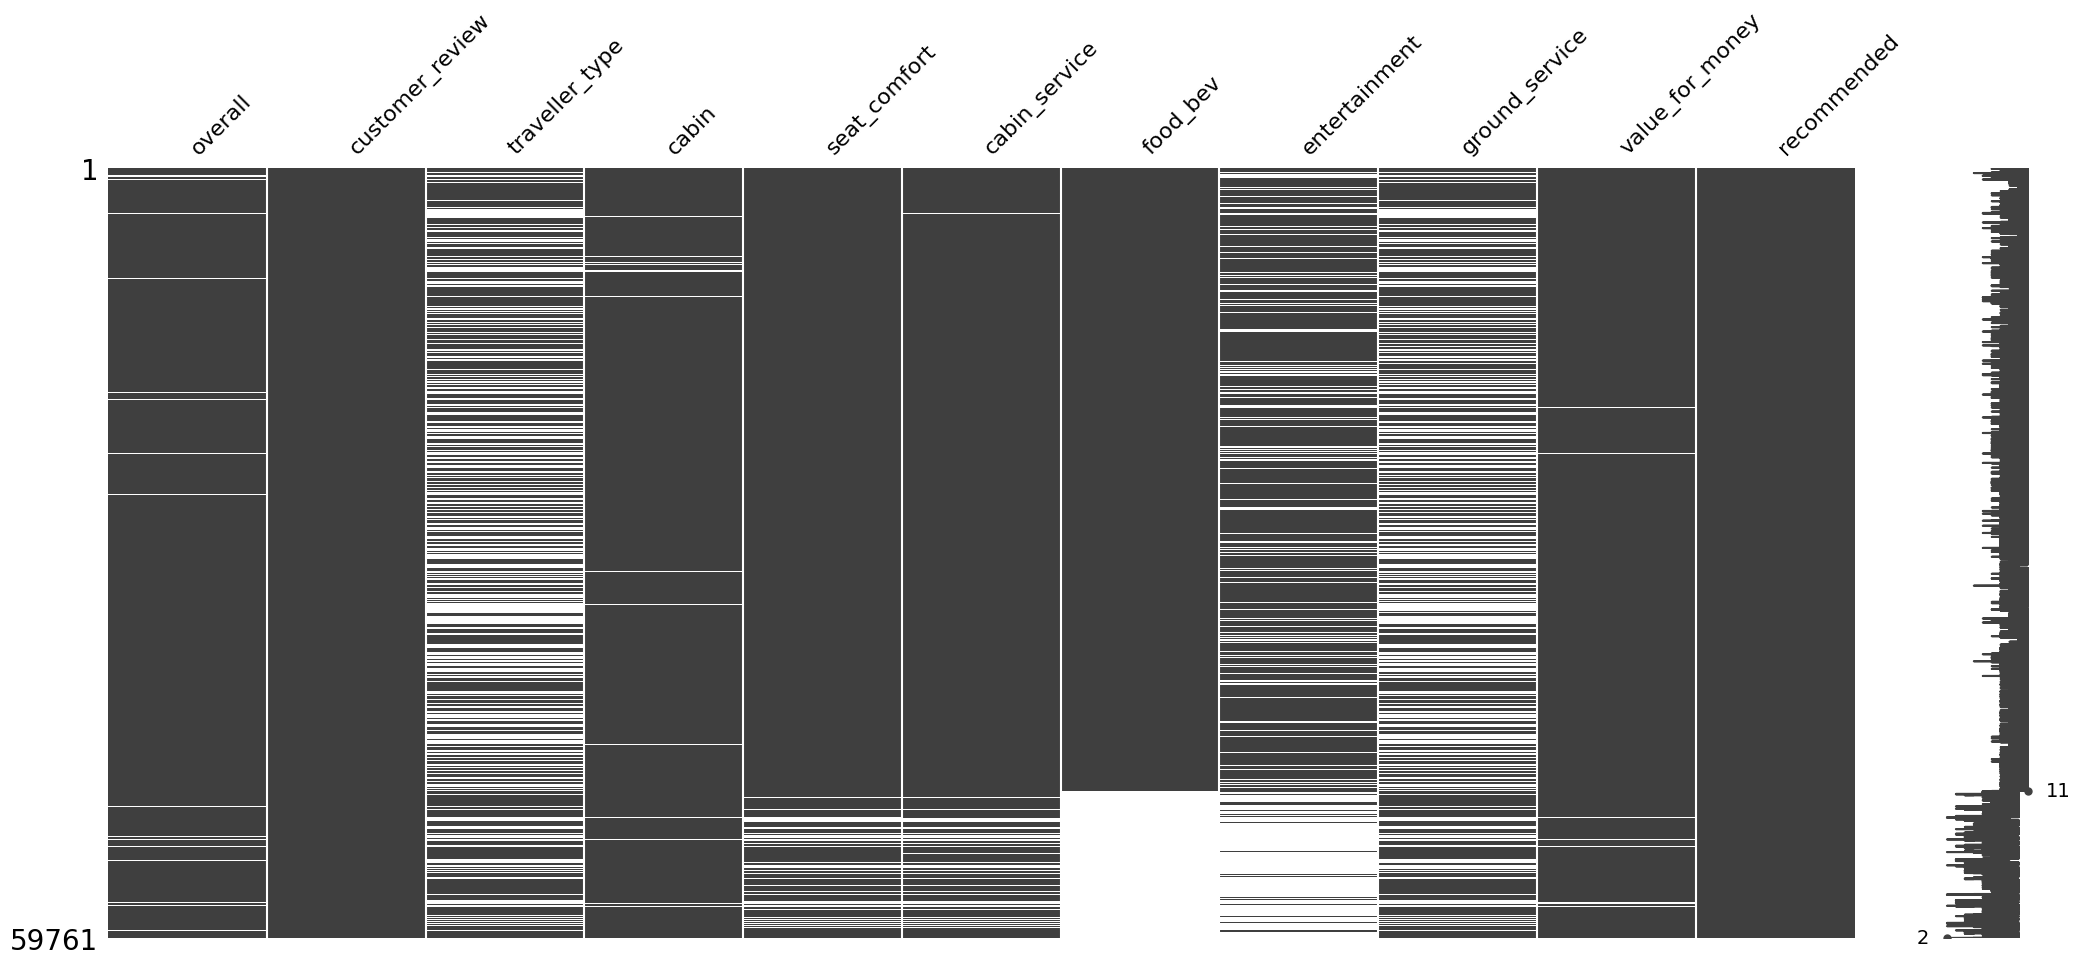

In [ ]:
msno.matrix(df.sort_values('food_bev'));

<Axes: >

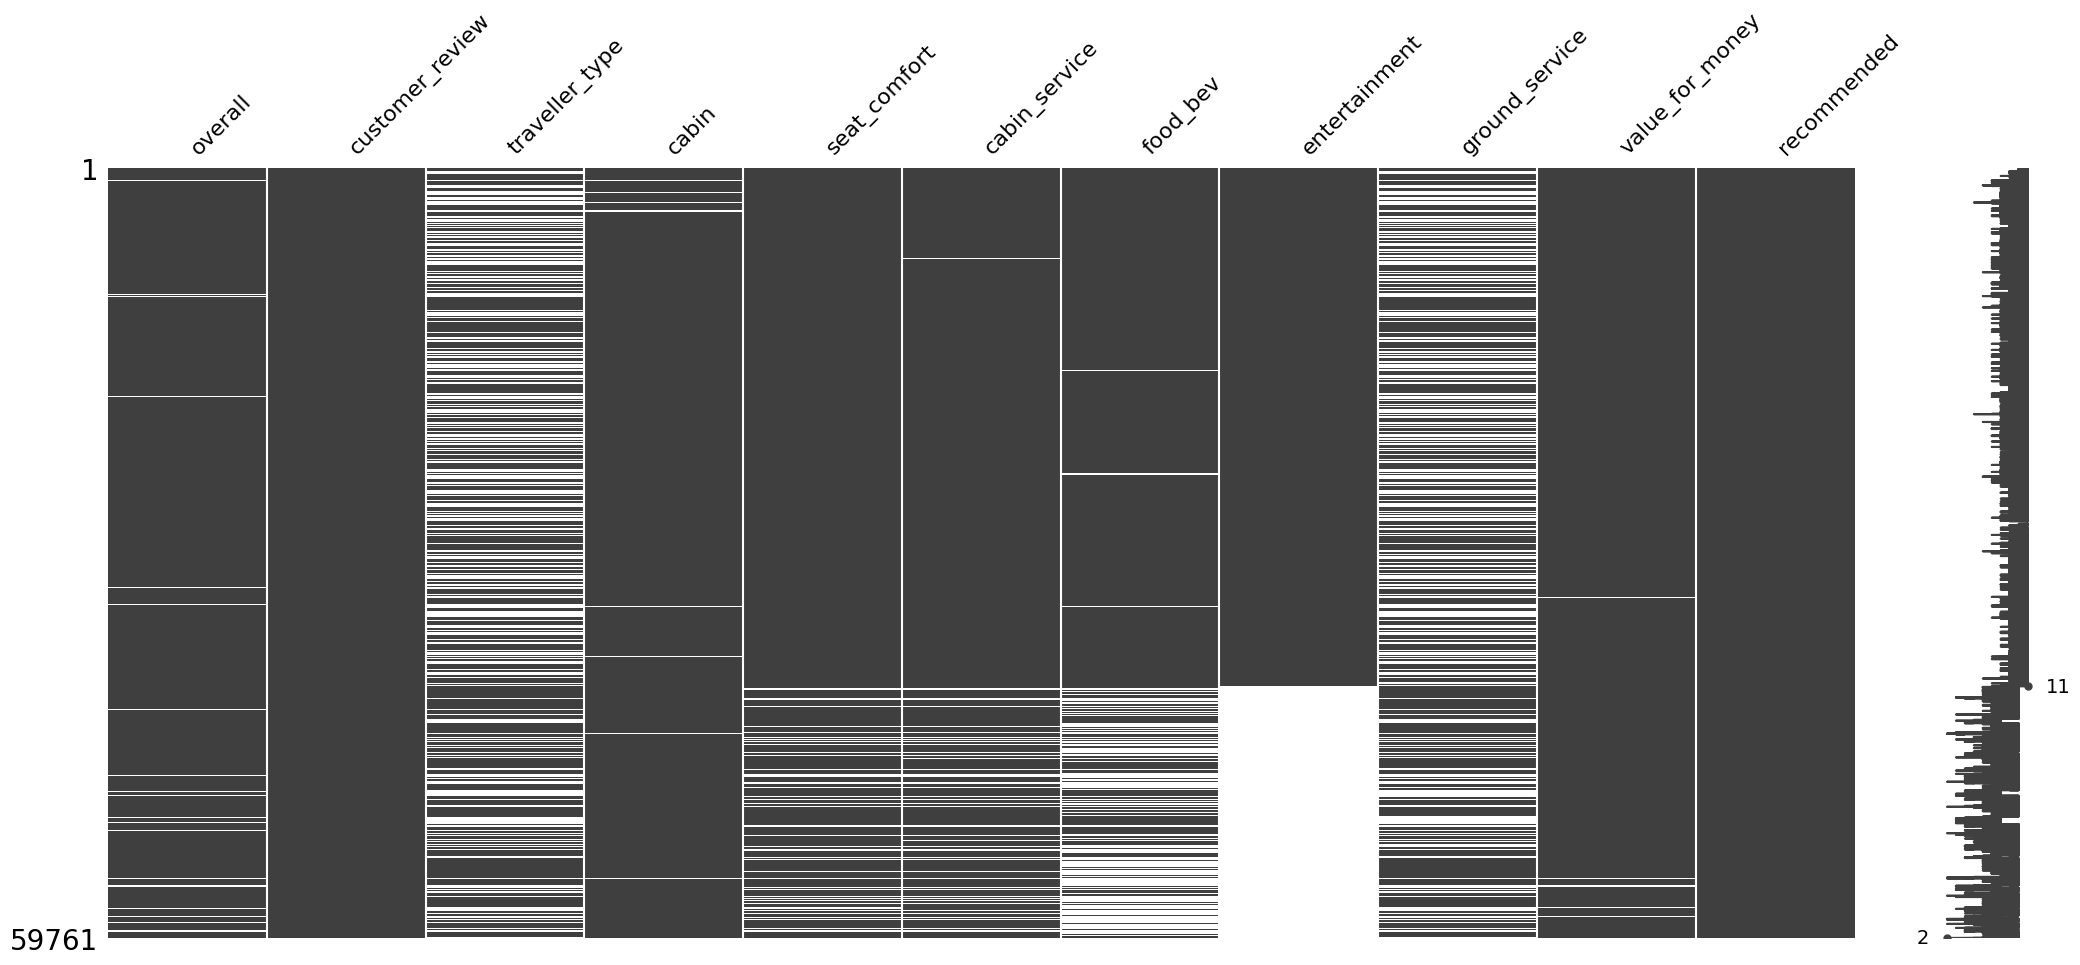

In [ ]:
msno.matrix(df.sort_values('entertainment'))

<Axes: >

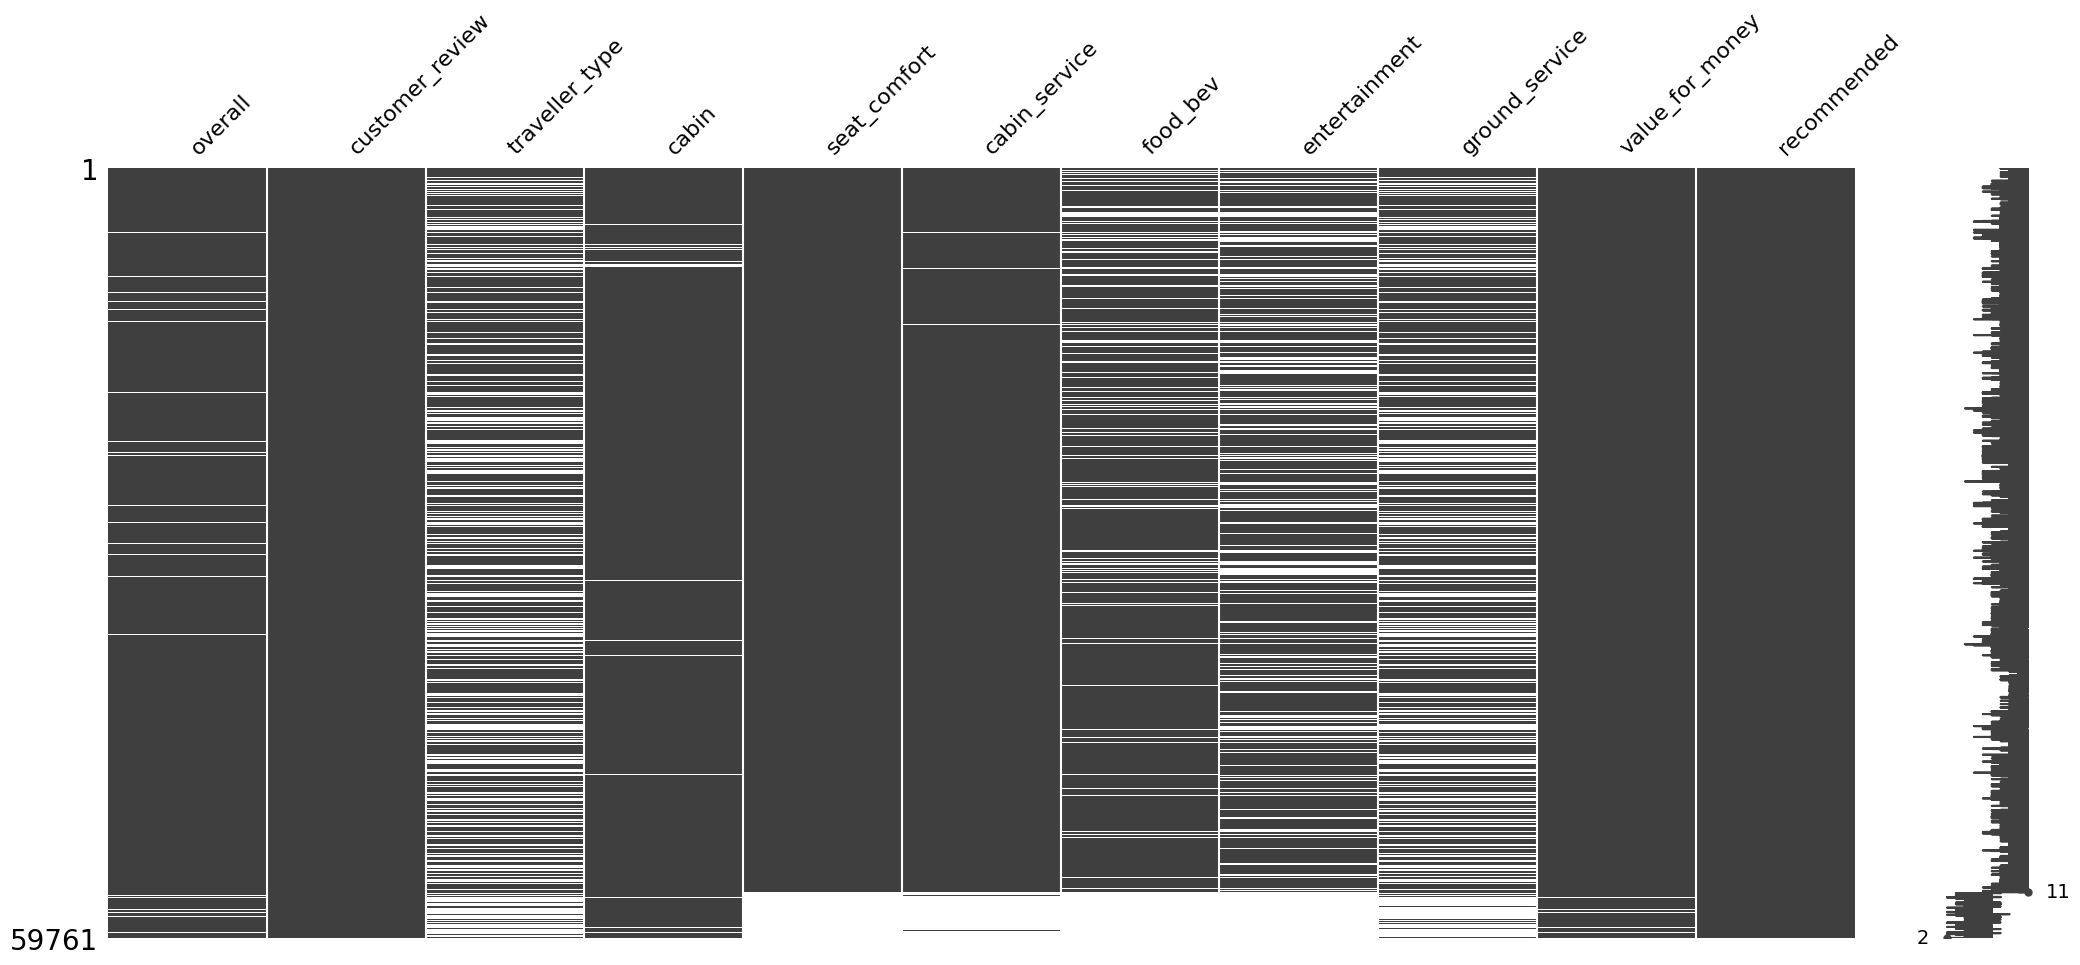

In [ ]:
msno.matrix(df.sort_values('seat_comfort'))

seat_comfort and cabin_service also look related

<Axes: >

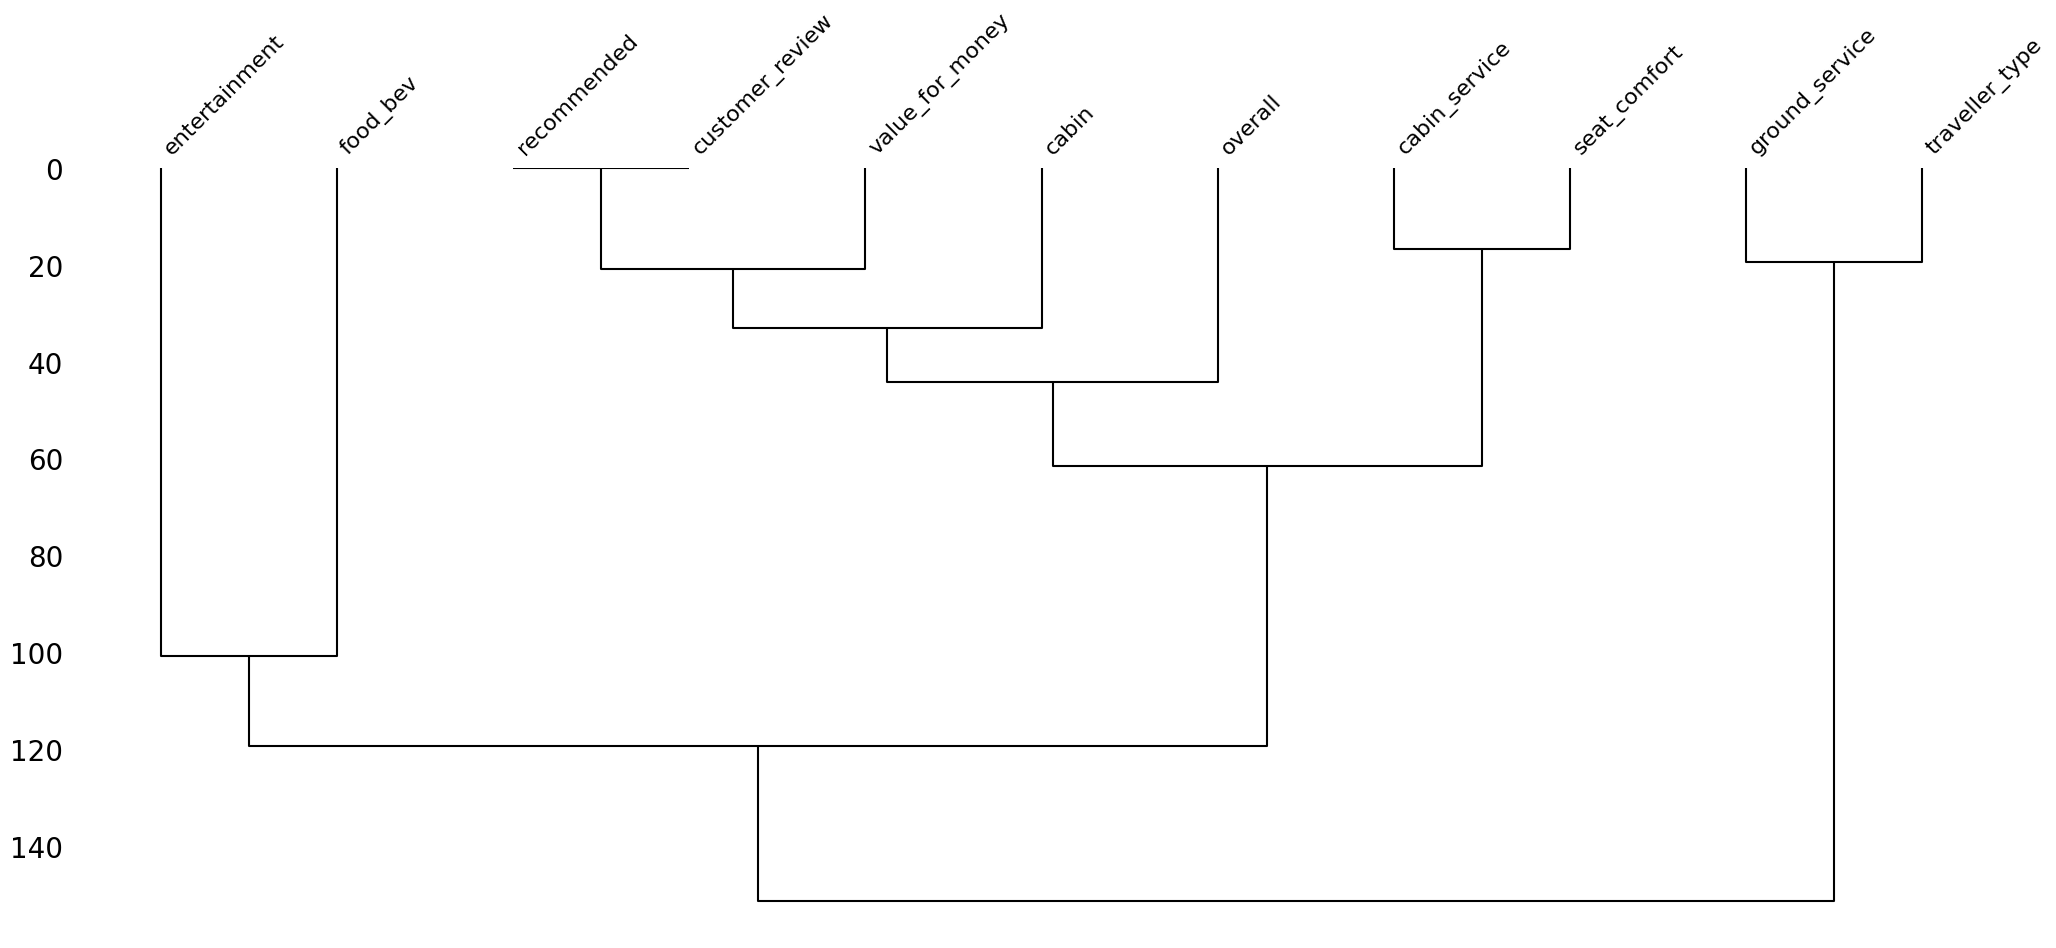

In [ ]:
msno.dendrogram(df)

In [ ]:
#Imputing traveller type by ground service for normal traveller type not opting for ground service
df['traveller_type'].fillna('Normal traveller',inplace=True)
df['ground_service'].fillna(0,inplace=True)
mode_to_impute=df['cabin'].mode()[0]
df['cabin'].fillna(mode_to_impute,inplace=True)

In [ ]:
df.isna().sum()

airline                0
overall             1764
author                 0
review_date            0
customer_review        0
traveller_type         0
cabin               1057
route              22249
date_flown         22327
seat_comfort        3550
cabin_service       3521
food_bev           11420
entertainment      19531
ground_service         0
value_for_money      434
recommended            0
dtype: int64

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df = pd.get_dummies(df,columns=['traveller_type','cabin'],dtype=float)
df['recommended']=df['recommended'].replace({'yes':1,
                           'no':0})

In [ ]:
df.head()

overall  seat_comfort  cabin_service  food_bev  entertainment  \
1      7.0           4.0            5.0       4.0            4.0   
3      2.0           4.0            1.0       1.0            1.0   
5      3.0           1.0            4.0       1.0            3.0   
7     10.0           4.0            5.0       5.0            5.0   
9      1.0           1.0            1.0       1.0            1.0   

   ground_service  value_for_money  recommended  traveller_type_Business  \
1             2.0              4.0            1                      1.0   
3             1.0              1.0            0                      0.0   
5             1.0              2.0            0                      1.0   
7             5.0              5.0            1                      0.0   
9             1.0              1.0            0                      0.0   

   traveller_type_Couple Leisure  traveller_type_Family Leisure  \
1                            0.0                            0.0   
3                            0.0                            1.0   
5                            0.0                            0.0   
7                            0.0                            0.0   
9                            0.0                            0.0   

   traveller_type_Normal traveller  traveller_type_Solo Leisure  \
1                              0.0                          0.0   
3                              0.0                          0.0   
5                              0.0                          0.0   
7                              0.0                          1.0   
9                              0.0                          1.0   

   cabin_Business Class  cabin_Economy Class  cabin_First Class  \
1                   0.0                  1.0                0.0   
3                   0.0                  1.0                0.0   
5                   0.0                  1.0                0.0   
7                   0.0                  1.0                0.0   
9                   0.0                  1.0                0.0   

   cabin_Premium Economy  
1                    0.0  
3                    0.0  
5                    0.0  
7                    0.0  
9                    0.0

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used dummy variables to encode the categorical features.

### Splitting data, imputing missing values and Feature Manipulation & Selection

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=df.drop('recommended',axis=1)
y=df.recommended
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=3)

In [ ]:
mice_imputer=IterativeImputer()
mice_imputer.fit(X_train[X_train.describe().columns])
X_train[X_train.describe().columns]= mice_imputer.transform(X_train[X_train.describe().columns])
X_test[X_test.describe().columns]= mice_imputer.transform(X_test[X_test.describe().columns])

In [ ]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)

X_train shape:  (47808, 16)
X_test shape:  (11953, 16)


#### 1. Feature Manipulation

In [ ]:
X_train.replace({True:1,
                 False:0})

overall  seat_comfort  cabin_service  food_bev  entertainment  \
33199       9.0           5.0            5.0  5.000000       4.358080   
43259       1.0           3.0            3.0  2.000000       1.000000   
107218      1.0           1.0            1.0  1.000000       1.000000   
74875       7.0           2.0            3.0  2.817500       2.808876   
53221       9.0           4.0            5.0  4.000000       4.000000   
...         ...           ...            ...       ...            ...   
107824      1.0           1.0            1.0  1.000000       1.000000   
130344      1.0           1.0            1.0  1.052691       1.319943   
23901       1.0           1.0            1.0  1.000000       1.000000   
3489        5.0           2.0            3.0  2.000000       3.000000   
12461      10.0           3.0            4.0  4.000000       3.736292   

        ground_service  value_for_money  traveller_type_Business  \
33199              0.0              5.0                      0.0   
43259              3.0              1.0                      0.0   
107218             1.0              1.0                      1.0   
74875              2.0              3.0                      0.0   
53221              5.0              5.0                      0.0   
...                ...              ...                      ...   
107824             1.0              1.0                      0.0   
130344             1.0              1.0                      0.0   
23901              1.0              1.0                      1.0   
3489               4.0              4.0                      0.0   
12461              4.0              4.0                      1.0   

        traveller_type_Couple Leisure  traveller_type_Family Leisure  \
33199                             0.0                            0.0   
43259                             0.0                            0.0   
107218                            0.0                            0.0   
74875                             1.0                            0.0   
53221                             0.0                            0.0   
...                               ...                            ...   
107824                            0.0                            0.0   
130344                            0.0                            1.0   
23901                             0.0                            0.0   
3489                              0.0                            1.0   
12461                             0.0                            0.0   

        traveller_type_Normal traveller  traveller_type_Solo Leisure  \
33199                               1.0                          0.0   
43259                               0.0                          1.0   
107218                              0.0                          0.0   
74875                               0.0                          0.0   
53221                               0.0                          1.0   
...                                 ...                          ...   
107824                              0.0                          1.0   
130344                              0.0                          0.0   
23901                               0.0                          0.0   
3489                                0.0                          0.0   
12461                               0.0                          0.0   

        cabin_Business Class  cabin_Economy Class  cabin_First Class  \
33199                    0.0                  1.0                0.0   
43259                    0.0                  1.0                0.0   
107218                   0.0                  1.0                0.0   
74875                    0.0                  1.0                0.0   
53221                    0.0                  0.0                1.0   
...                      ...                  ...                ...   
107824                   0.0                  1.0                0.0   
130344  

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
def get_vif(x):
  vif=pd.DataFrame()
  vif['features']=x.columns
  vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return vif

get_vif(X_train)

features       VIF
0                           overall  8.157345
1                      seat_comfort  3.177265
2                     cabin_service  3.482403
3                          food_bev  3.889418
4                     entertainment  2.837676
5                    ground_service  3.808981
6                   value_for_money  5.322143
7           traveller_type_Business       inf
8     traveller_type_Couple Leisure       inf
9     traveller_type_Family Leisure       inf
10  traveller_type_Normal traveller       inf
11      traveller_type_Solo Leisure       inf
12             cabin_Business Class       inf
13              cabin_Economy Class       inf
14                cabin_First Class       inf
15            cabin_Premium Economy       inf

One of feature is leading to perfect correlation, dropping one of the variables with inf vif

In [ ]:
#droping cabin Economy class
get_vif(X_train.drop(['cabin_Economy Class'],axis=1))

features       VIF
0                           overall  8.157345
1                      seat_comfort  3.177265
2                     cabin_service  3.482403
3                          food_bev  3.889418
4                     entertainment  2.837676
5                    ground_service  3.808981
6                   value_for_money  5.322143
7           traveller_type_Business  2.016231
8     traveller_type_Couple Leisure  2.374641
9     traveller_type_Family Leisure  2.025271
10  traveller_type_Normal traveller  5.318492
11      traveller_type_Solo Leisure  3.252004
12             cabin_Business Class  1.106083
13                cabin_First Class  1.024204
14            cabin_Premium Economy  1.018488

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X_train.drop('cabin_Economy Class',axis=1,inplace=True)
X_test.drop('cabin_Economy Class',axis=1,inplace=True)

##### What all feature selection methods have you used  and why?
Variance inflation factor was used to remove features having highes correlation coefficients i.e cabin_Economy Class in this case

##### Which all features you found important and why?

We have removed cabin economy class feature as it contributed to multicolinearity in the data.

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### Which method have you used to scale you data and why?

Transform features by scaling each feature to a given range(0 and 1 in this case).

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
# Handling Imbalanced Dataset (If needed)
df['recommended'].value_counts()

recommended
0    31268
1    28493
Name: count, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

There is no major imbalance in the target variable and does not need imbalance handling.

## ***7. ML Model Implementation***

In [ ]:
#Dictionary of all predictins of the target variable
y_preds={}
report={}

#fucntion to implement the model and fit the data
def model_implement(model,x_train,y_train,x_test,y_test):
  model=model
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  train_score=model.score(x_train,y_train)
  test_score=model.score(X_test,y_test)
  cl_report=classification_report(y_test,y_pred,output_dict=True)
  cf_matrix=confusion_matrix(y_test,y_pred)
  print('model: ',model)
  y_preds[str(model)]=y_pred
  report[str(model)]={'train_score':train_score,
                    'test_score':test_score,
                    'precision label:0':cl_report['0']['precision'],
                    'precision label:1':cl_report['1']['precision'],
                    'recall label:0':cl_report['0']['recall'],
                    'recall label:1':cl_report['1']['recall'],
                    'f1-score label:0':cl_report['0']['f1-score'],
                    'f1-score label:1':cl_report['1']['f1-score'],
                    'accuracy':cl_report['accuracy'],
                    'weighted average precision':cl_report['weighted avg']['precision'],
                    'weighted average recall':cl_report['weighted avg']['recall'],
                    'weighted average f1-score':cl_report['weighted avg']['f1-score'],
                    'confusion matrix':cf_matrix}


### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
log_reg=LogisticRegression()

# Fit the Algorithm
model_implement(model=log_reg,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)
# Predict on the model
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

model:  LogisticRegression()


train_score  test_score  precision label:0  \
LogisticRegression()     0.955384    0.953986           0.958598   

                      precision label:1  recall label:0  recall label:1  \
LogisticRegression()           0.948841        0.954359        0.953567   

                      f1-score label:0  f1-score label:1  accuracy  \
LogisticRegression()          0.956474          0.951198  0.953986   

                      weighted average precision  weighted average recall  \
LogisticRegression()                    0.954009                 0.953986   

                      weighted average f1-score            confusion matrix  
LogisticRegression()                   0.953993  [[6043, 289], [261, 5360]]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Logistic regression** is a **classification algorithm** that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category.

In Logistic Regression,the log odds of a categorical response being True(1) is modeled as a linear combination of the features i.e.
*   log(p/1-p) = W0 + W1X1 + ... + WnXn

where
* W0 is intercept,
* W1..Wn represents parameters for all other features

This is logit function which can be rearranged as




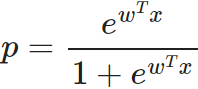

or more commonly known as

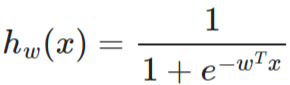

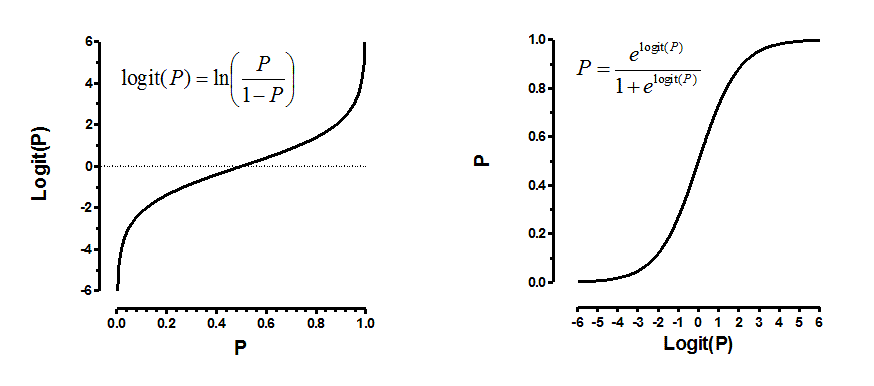

The **logistic function** has some nice properties. The y-value represents the probability and it is always bounded between 0 and 1, which is want we wanted for probabilities.

**Cost Function:** **∏(hw(X)) * ∏(1-(hw(X)))** or

**L(w) = ∑ Y*i* log(Hw(X*i*)) + (1-Y*i*)log(1-Hw(X*i*))**

where,
* We define **Y*i*** to be 1 when the ***ith***
 observation is labeled class 1 and 0 when labeled as class 0, then we only compute **Hw(X*i*)**
 for observations that are labeled class 1 and **1-Hw(X*i*)**
 for observations that are labeled class 0, which is still the same idea as the original function.


**Accuracy** is a metric that measures how often a machine learning model correctly predicts the outcome. You can calculate accuracy by dividing the number of correct predictions by the total number of predictions.

**Recall** is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. You can calculate recall by dividing the number of true positives by the number of positive instances.

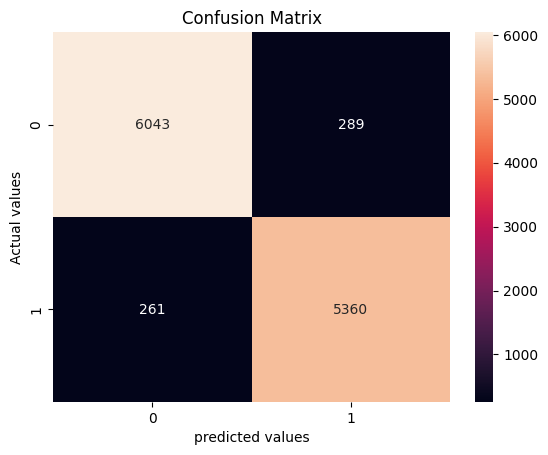

In [ ]:
# Visualizing evaluation Metric Score chart
sns.heatmap(report['LogisticRegression()']['confusion matrix'],annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('predicted values');

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_log_reg={'C':[0.01,.1,1,10,100],
          'penalty':['l1','l2','elasticnet','None']}
grid_logreg=GridSearchCV(estimator=LogisticRegression(),
                         param_grid=param_log_reg,
                         cv=5,verbose=False)
# Fit the Algorithm
grid_logreg.fit(X_train,y_train)

# Predict on the model
best_logreg=grid_logreg.best_estimator_
model_implement(model=best_logreg,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)
#getting display report
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

model:  LogisticRegression(C=1)


train_score  test_score  precision label:0  \
LogisticRegression()        0.955384    0.953986           0.958598   
LogisticRegression(C=1)     0.955384    0.953986           0.958598   

                         precision label:1  recall label:0  recall label:1  \
LogisticRegression()              0.948841        0.954359        0.953567   
LogisticRegression(C=1)           0.948841        0.954359        0.953567   

                         f1-score label:0  f1-score label:1  accuracy  \
LogisticRegression()             0.956474          0.951198  0.953986   
LogisticRegression(C=1)          0.956474          0.951198  0.953986   

                         weighted average precision  weighted average recall  \
LogisticRegression()                       0.954009                 0.953986   
LogisticRegression(C=1)                    0.954009                 0.953986   

                         weighted average f1-score            confusion matrix  
LogisticRegression()                      0.953993  [[6043, 289], [261, 5360]]  
LogisticRegression(C=1)                   0.953993  [[6043, 289], [261, 5360]]

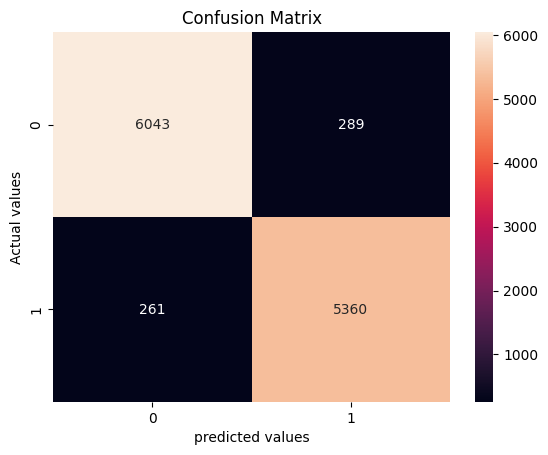

In [ ]:
# Visualizing evaluation Metric Score chart
sns.heatmap(report['LogisticRegression(C=1)']['confusion matrix'],annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('predicted values');

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

The parameter here is C

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

C = 1 is the best parameter found by hyperparameter which is also the default hyperparameter and the recall for label 1 i.e YES recommendation is 95% and also accuracy remained the same .95%

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
dtclassifier=DecisionTreeClassifier()

# Fit the Algorithm
model_implement(model=dtclassifier,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)
# Predict on the model
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

model:  DecisionTreeClassifier()


train_score  test_score  precision label:0  \
LogisticRegression()         0.955384    0.953986           0.958598   
LogisticRegression(C=1)      0.955384    0.953986           0.958598   
DecisionTreeClassifier()     0.992616    0.937756           0.940694   

                          precision label:1  recall label:0  recall label:1  \
LogisticRegression()               0.948841        0.954359        0.953567   
LogisticRegression(C=1)            0.948841        0.954359        0.953567   
DecisionTreeClassifier()           0.934438        0.941883        0.933108   

                          f1-score label:0  f1-score label:1  accuracy  \
LogisticRegression()              0.956474          0.951198  0.953986   
LogisticRegression(C=1)           0.956474          0.951198  0.953986   
DecisionTreeClassifier()          0.941288          0.933772  0.937756   

                          weighted average precision  weighted average recall  \
LogisticRegression()                        0.954009                 0.953986   
LogisticRegression(C=1)                     0.954009                 0.953986   
DecisionTreeClassifier()                    0.937752                 0.937756   

                          weighted average f1-score  \
LogisticRegression()                       0.953993   
LogisticRegression(C=1)                    0.953993   
DecisionTreeClassifier()                   0.937754   

                                    confusion matrix  
LogisticRegression()      [[6043, 289], [261, 5360]]  
LogisticRegression(C=1)   [[6043, 289], [261, 5360]]  
DecisionTreeClassifier()  [[5964, 368], [376, 5245]]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Decision tree** is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

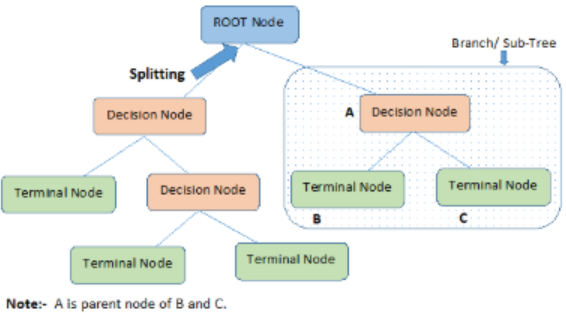

**Root Node:** It represents entire population or sample and this further gets divided into two sets.

**Splitting:** It is a process of dividing a node into two sub-nodes.

**Decision Node:** When a sub-node splits into further sub-nodes, then it is called decision node.

**Leaf/ Terminal Node:** Nodes do not split is called leaf or terminal node.

**Branch / Sub-Tree:** A sub section of entire tree is called branch or sub-tree.

**Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

**How to Split**

The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

**Information Gain**: Less impure node requires less information to describe it. And, more impure node requires more information.Information theory tries to measure and define this degree of disorganization in a system known as Entropy. If the sample is completely homogeneous, then the entropy is zero and if the sample is an equally divided (50% – 50%), it has entropy of one.

Entropy = -p$log_2p$ - q$log_2q$

Here p and q is probability of success and failure respectively in that node.

The decrease is entropy after split is called Information Gain. Steps to calculate information split for a split:

* Calculate entropy of parent node
* Calculate entropy of each individual node of split and calculate weighted average of all sub-nodes available in split.
* Calculate the difference in entropy before and after split.

**Gini**

* Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure ($p^2+q^2$).
Here p and q is probability of success and failure respectively in that node.
* Calculate Gini for split using weighted Gini score of each node of that split

**Chi Square**

* It is an algorithm to find out the statistical significance of the differences between sub-nodes and parent nodes.

* We measure it by the sum of squares of standardized differences between observed and expected frequencies of a target variable.



**Reduction in Variance**

Reduction in variance is an algorithm used for continuous target variables. This algorithm uses the standard formula of variance to choose the best split. The split with lower variance is selected as the criteria to split the population.
<ol>Variance = $\frac{\sum(X-\bar X)^2}{n}$</ol>



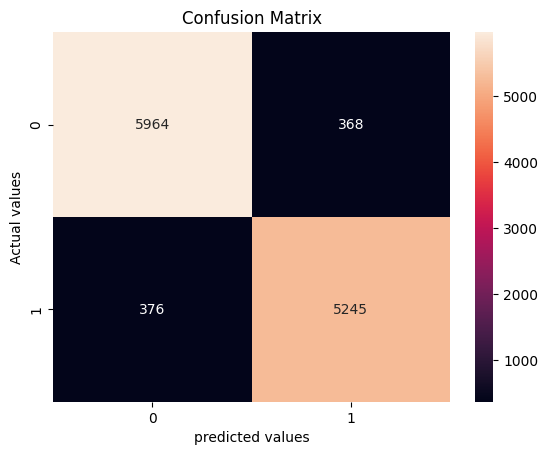

In [ ]:
# Visualizing evaluation Metric Score chart
sns.heatmap(report['DecisionTreeClassifier()']['confusion matrix'],annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('predicted values');

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_dt={'criterion':['gini','entropy','logloss'],
         'splitter' : ['best','random'],
         'max_depth':[5,6,7,8],
         'max_features':['auto','sqrt','log2'],
         "min_samples_split":[5,7]
          }

grid_dt=GridSearchCV(estimator=DecisionTreeClassifier(),
                         param_grid=param_dt,
                         cv=5,verbose=False)
# Fit the Algorithm
grid_dt.fit(X_train,y_train)

# Predict on the model
best_dt=grid_dt.best_estimator_
model_implement(model=best_dt,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)

#getting display report
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

model:  DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_split=7)


train_score  test_score  \
LogisticRegression()                                   0.955384    0.953986   
LogisticRegression(C=1)                                0.955384    0.953986   
DecisionTreeClassifier()                               0.992616    0.937756   
DecisionTreeClassifier(max_depth=6, max_feature...     0.934321    0.931231   

                                                    precision label:0  \
LogisticRegression()                                         0.958598   
LogisticRegression(C=1)                                      0.958598   
DecisionTreeClassifier()                                     0.940694   
DecisionTreeClassifier(max_depth=6, max_feature...           0.950458   

                                                    precision label:1  \
LogisticRegression()                                         0.948841   
LogisticRegression(C=1)                                      0.948841   
DecisionTreeClassifier()                                     0.934438   
DecisionTreeClassifier(max_depth=6, max_feature...           0.911084   

                                                    recall label:0  \
LogisticRegression()                                      0.954359   
LogisticRegression(C=1)                                   0.954359   
DecisionTreeClassifier()                                  0.941883   
DecisionTreeClassifier(max_depth=6, max_feature...        0.918035   

                                                    recall label:1  \
LogisticRegression()                                      0.953567   
LogisticRegression(C=1)                                   0.953567   
DecisionTreeClassifier()                                  0.933108   
DecisionTreeClassifier(max_depth=6, max_feature...        0.946095   

                                                    f1-score label:0  \
LogisticRegression()                                        0.956474   
LogisticRegression(C=1)                                     0.956474   
DecisionTreeClassifier()                                    0.941288   
DecisionTreeClassifier(max_depth=6, max_feature...          0.933965   

                                                    f1-score label:1  \
LogisticRegression()                                        0.951198   
LogisticRegression(C=1)                                     0.951198   
DecisionTreeClassifier()                                    0.933772   
DecisionTreeClassifier(max_depth=6, max_feature...          0.928260   

                                                    accuracy  \
LogisticRegression()                                0.953986   
LogisticRegression(C=1)                             0.953986   
DecisionTreeClassifier()                            0.937756   
DecisionTreeClassifier(max_depth=6, max_feature...  0.931231   

                                                    weighted average precision  \
LogisticRegression()                                                  0.954009   
LogisticRegression(C=1)                                               0.954009   
DecisionTreeClassifier()                                              0.937752   
DecisionTreeClassifier(max_depth=6, max_feature...                    0.931942   

                                                    weighted average recall  \
LogisticRegression()                                               0.953986   
LogisticRegression(C=1)                                            0.953986   
DecisionTreeClassifier()                                           0.937756   
DecisionTreeClassifier(max_depth=6, max_feature...                 0.931231   

                                                    weighted average f1-score  \
LogisticRegression()                                                 0.953993   
LogisticRegression(C=1)                                              0.953993   
DecisionTreeClassifier()                                             0.937754   
DecisionTreeClassifier(max_depth=6, max_feature.

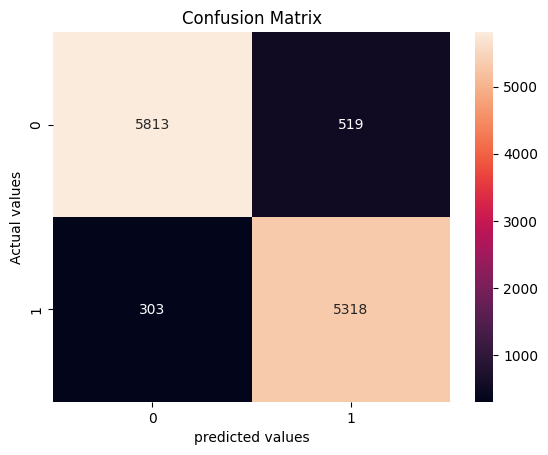

In [ ]:
# Visualizing evaluation Metric Score chart
sns.heatmap(report["DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_split=7)"]['confusion matrix'],annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('predicted values');

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

The parameters here are max_depth, min_samples and max_features.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The recall for recommendation label has slightly imporved from 93% to 94.6%.

The accuracy reduced slightly from 93.7% to 93.1%

The best parameters are max_features='log2', max_depth=6 and min_sample_split=7


#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

The main metric prioritized is **recall** and **accuracy** for the label yes i.e.

**Recall** is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. You can calculate recall by dividing the number of true positives by the number of positive instances.

**Accuracy** is a metric that measures how often a machine learning model correctly predicts the outcome. You can calculate accuracy by dividing the number of correct predictions by the total number of predictions.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
rf_classifier=RandomForestClassifier()

# Fit the Algorithm
model_implement(model=rf_classifier,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)

# Predict on the model
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

model:  RandomForestClassifier()


train_score  test_score  \
LogisticRegression()                                   0.955384    0.953986   
LogisticRegression(C=1)                                0.955384    0.953986   
DecisionTreeClassifier()                               0.992616    0.937756   
DecisionTreeClassifier(max_depth=6, max_feature...     0.934321    0.931231   
RandomForestClassifier()                               0.992616    0.953317   

                                                    precision label:0  \
LogisticRegression()                                         0.958598   
LogisticRegression(C=1)                                      0.958598   
DecisionTreeClassifier()                                     0.940694   
DecisionTreeClassifier(max_depth=6, max_feature...           0.950458   
RandomForestClassifier()                                     0.954503   

                                                    precision label:1  \
LogisticRegression()                                         0.948841   
LogisticRegression(C=1)                                      0.948841   
DecisionTreeClassifier()                                     0.934438   
DecisionTreeClassifier(max_depth=6, max_feature...           0.911084   
RandomForestClassifier()                                     0.951973   

                                                    recall label:0  \
LogisticRegression()                                      0.954359   
LogisticRegression(C=1)                                   0.954359   
DecisionTreeClassifier()                                  0.941883   
DecisionTreeClassifier(max_depth=6, max_feature...        0.918035   
RandomForestClassifier()                                  0.957517   

                                                    recall label:1  \
LogisticRegression()                                      0.953567   
LogisticRegression(C=1)                                   0.953567   
DecisionTreeClassifier()                                  0.933108   
DecisionTreeClassifier(max_depth=6, max_feature...        0.946095   
RandomForestClassifier()                                  0.948586   

                                                    f1-score label:0  \
LogisticRegression()                                        0.956474   
LogisticRegression(C=1)                                     0.956474   
DecisionTreeClassifier()                                    0.941288   
DecisionTreeClassifier(max_depth=6, max_feature...          0.933965   
RandomForestClassifier()                                    0.956008   

                                                    f1-score label:1  \
LogisticRegression()                                        0.951198   
LogisticRegression(C=1)                                     0.951198   
DecisionTreeClassifier()                                    0.933772   
DecisionTreeClassifier(max_depth=6, max_feature...          0.928260   
RandomForestClassifier()                                    0.950276   

                                                    accuracy  \
LogisticRegression()                                0.953986   
LogisticRegression(C=1)                             0.953986   
DecisionTreeClassifier()                            0.937756   
DecisionTreeClassifier(max_depth=6, max_feature...  0.931231   
RandomForestClassifier()                            0.953317   

                                                    weighted average precision  \
LogisticRegression()                                                  0.954009   
LogisticRegression(C=1)                                               0.954009   
DecisionTreeClassifier()                                              0.937752   
DecisionTreeClassifier(max_depth=6, max_feature...                    0.931942   
RandomForestClassifier()                                              0.953313   

                                                    weighted average recall  \
LogisticRegression()              

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

###**Bagging(Bootstrap Aggregation)**
* **Create multiple Datasets:** Sample with replacement on original to form new datasets.
* **Build multiple models/trees**: Trees are built on each dataset.
* **Combine the models/trees**: Predictions of all models are combined using mean, median or mode depending on the problem at hand and result is generally more robust than single model.

**Random Forest**

* In Random Forest, we grow multiple trees as opposed to a single tree.
* We construct trees from the subsets of the original dataset. These subsets can have a fraction of the columns as well as rows.
* To classify a new object based on attributes, each tree gives a classification and we say that the tree “votes” for that class.
* The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.

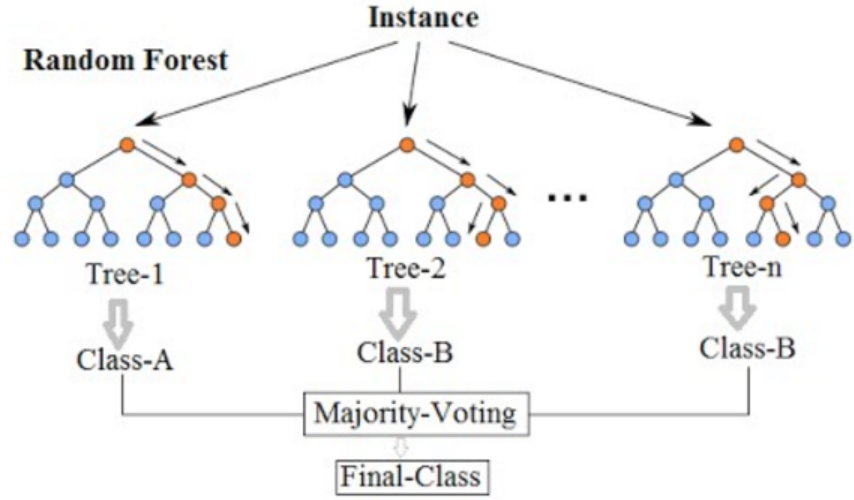

* Assume number of rows in the training set is N. Then, a sample of n < N rows is taken at random but with replacement. This sample will be the training set for growing the tree.
* If there are M input variables, a number m < M is specified such that at each node, m variables are selected at random out of the M. The best split on these m is used to split the node. The value of m is held constant while we grow the forest.
* Each tree is grown to the largest extent possible and there is no pruning.
* Predict new data by aggregating the predictions of the n tree trees (i.e., majority votes for classification, average for regression).

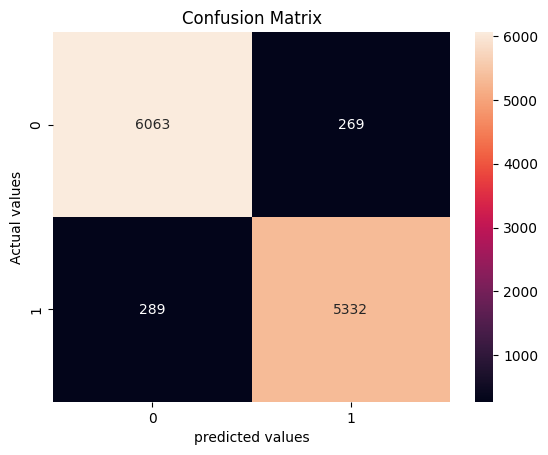

In [ ]:
# Visualizing evaluation Metric Score chart
sns.heatmap(report['RandomForestClassifier()']['confusion matrix'],annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('predicted values');

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_rf={'criterion':['gini','entropy','logloss'],
          'max_depth': [2,3,5,7,10],
          'min_samples_leaf': [2,3,5,7,10],
          'n_estimators': [10,25,30]
          }

grid_rf=GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_rf,
                         cv=5,verbose=False)
# Fit the Algorithm
grid_rf.fit(X_train,y_train)

# Predict on the model
best_rf=grid_rf.best_estimator_
model_implement(model=best_rf,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)

#getting display report
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

model:  RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       n_estimators=30)


train_score  test_score  \
LogisticRegression()                                   0.955384    0.953986   
LogisticRegression(C=1)                                0.955384    0.953986   
DecisionTreeClassifier()                               0.992616    0.937756   
DecisionTreeClassifier(max_depth=6, max_feature...     0.934321    0.931231   
RandomForestClassifier()                               0.992616    0.953317   
RandomForestClassifier(criterion='entropy', max...     0.963584    0.957166   

                                                    precision label:0  \
LogisticRegression()                                         0.958598   
LogisticRegression(C=1)                                      0.958598   
DecisionTreeClassifier()                                     0.940694   
DecisionTreeClassifier(max_depth=6, max_feature...           0.950458   
RandomForestClassifier()                                     0.954503   
RandomForestClassifier(criterion='entropy', max...           0.957403   

                                                    precision label:1  \
LogisticRegression()                                         0.948841   
LogisticRegression(C=1)                                      0.948841   
DecisionTreeClassifier()                                     0.934438   
DecisionTreeClassifier(max_depth=6, max_feature...           0.911084   
RandomForestClassifier()                                     0.951973   
RandomForestClassifier(criterion='entropy', max...           0.956895   

                                                    recall label:0  \
LogisticRegression()                                      0.954359   
LogisticRegression(C=1)                                   0.954359   
DecisionTreeClassifier()                                  0.941883   
DecisionTreeClassifier(max_depth=6, max_feature...        0.918035   
RandomForestClassifier()                                  0.957517   
RandomForestClassifier(criterion='entropy', max...        0.961939   

                                                    recall label:1  \
LogisticRegression()                                      0.953567   
LogisticRegression(C=1)                                   0.953567   
DecisionTreeClassifier()                                  0.933108   
DecisionTreeClassifier(max_depth=6, max_feature...        0.946095   
RandomForestClassifier()                                  0.948586   
RandomForestClassifier(criterion='entropy', max...        0.951788   

                                                    f1-score label:0  \
LogisticRegression()                                        0.956474   
LogisticRegression(C=1)                                     0.956474   
DecisionTreeClassifier()                                    0.941288   
DecisionTreeClassifier(max_depth=6, max_feature...          0.933965   
RandomForestClassifier()                                    0.956008   
RandomForestClassifier(criterion='entropy', max...          0.959666   

                                                    f1-score label:1  \
LogisticRegression()                                        0.951198   
LogisticRegression(C=1)                                     0.951198   
DecisionTreeClassifier()                                    0.933772   
DecisionTreeClassifier(max_depth=6, max_feature...          0.928260   
RandomForestClassifier()                                    0.950276   
RandomForestClassifier(criterion='entropy', max...          0.954335   

                                                    accuracy  \
LogisticRegression()                                0.953986   
LogisticRegression(C=1)                             0.953986   
DecisionTreeClassifier()                            0.937756   
DecisionTreeClassifier(max_depth=6, max_feature...  0.931231   
RandomForestClassifier()                            0.953317   
RandomForestClassifier(criterion='entropy', max...  0.957166   

                                 

In [ ]:
report["RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,\n                       n_estimators=30)"]

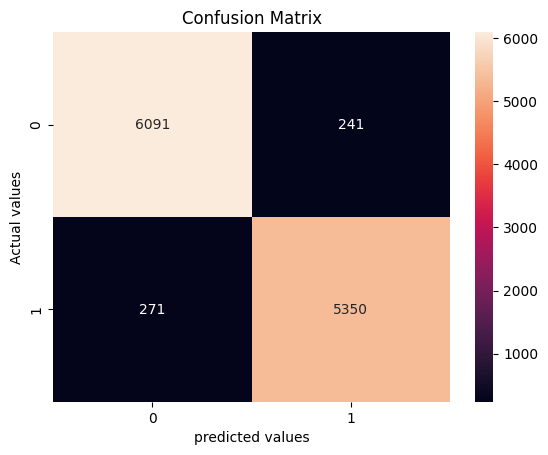

In [ ]:
# Visualizing evaluation Metric Score chart
sns.heatmap(report["RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,\n                       n_estimators=30)"]['confusion matrix'],annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('predicted values');

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

The parameters here are max_depth, min_samples_leaf and n_estimators

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The **recall** metric improved from .**948** to .**952** while

**accuracy** also improved sligthly from 95.3% to 95.7%


#ML Model 4

In [ ]:
# ML Model - 4 Implementation
knn_classifier=KNeighborsClassifier()

# Fit the Algorithm
model_implement(model=knn_classifier,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)

# Predict on the model
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

model:  KNeighborsClassifier()


train_score  test_score  \
LogisticRegression()                                   0.955384    0.953986   
LogisticRegression(C=1)                                0.955384    0.953986   
DecisionTreeClassifier()                               0.992616    0.937756   
DecisionTreeClassifier(max_depth=6, max_feature...     0.934321    0.931231   
RandomForestClassifier()                               0.992616    0.953317   
RandomForestClassifier(criterion='entropy', max...     0.963584    0.957166   
KNeighborsClassifier()                                 0.963939    0.950473   

                                                    precision label:0  \
LogisticRegression()                                         0.958598   
LogisticRegression(C=1)                                      0.958598   
DecisionTreeClassifier()                                     0.940694   
DecisionTreeClassifier(max_depth=6, max_feature...           0.950458   
RandomForestClassifier()                                     0.954503   
RandomForestClassifier(criterion='entropy', max...           0.957403   
KNeighborsClassifier()                                       0.954978   

                                                    precision label:1  \
LogisticRegression()                                         0.948841   
LogisticRegression(C=1)                                      0.948841   
DecisionTreeClassifier()                                     0.934438   
DecisionTreeClassifier(max_depth=6, max_feature...           0.911084   
RandomForestClassifier()                                     0.951973   
RandomForestClassifier(criterion='entropy', max...           0.956895   
KNeighborsClassifier()                                       0.945438   

                                                    recall label:0  \
LogisticRegression()                                      0.954359   
LogisticRegression(C=1)                                   0.954359   
DecisionTreeClassifier()                                  0.941883   
DecisionTreeClassifier(max_depth=6, max_feature...        0.918035   
RandomForestClassifier()                                  0.957517   
RandomForestClassifier(criterion='entropy', max...        0.961939   
KNeighborsClassifier()                                    0.951358   

                                                    recall label:1  \
LogisticRegression()                                      0.953567   
LogisticRegression(C=1)                                   0.953567   
DecisionTreeClassifier()                                  0.933108   
DecisionTreeClassifier(max_depth=6, max_feature...        0.946095   
RandomForestClassifier()                                  0.948586   
RandomForestClassifier(criterion='entropy', max...        0.951788   
KNeighborsClassifier()                                    0.949475   

                                                    f1-score label:0  \
LogisticRegression()                                        0.956474   
LogisticRegression(C=1)                                     0.956474   
DecisionTreeClassifier()                                    0.941288   
DecisionTreeClassifier(max_depth=6, max_feature...          0.933965   
RandomForestClassifier()                                    0.956008   
RandomForestClassifier(criterion='entropy', max...          0.959666   
KNeighborsClassifier()                                      0.953165   

                                                    f1-score label:1  \
LogisticRegression()                                        0.951198   
LogisticRegression(C=1)                                     0.951198   
DecisionTreeClassifier()                                    0.933772   
DecisionTreeClassifier(max_depth=6, max_feature...          0.928260   
RandomForestClassifier()                                    0.950276   
RandomForestClassifier(criterion='entropy', max...          0.954335   
KNeighborsClassifier()                        

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.




## **K-NearestNeighbors**



K-nearest neighbors (kNN) is a supervised machine learning algorithm that can be used to solve both classification and regression tasks. kNN as an algorithm seems to be inspired from real life. People tend to be effected by the people around them.
* The value of a data point is determined by the data points around it. If you have one very close friend and spend most of your time with him/her, you will end up sharing similar interests and enjoying same things. That is kNN with k=1.
* If you always hang out with a group of 5, each one in the group has an effect on your behavior and you will end up being the average of 5. That is kNN with k=5.
* kNN classifier determines the class of a data point by majority voting principle. If k is set to 5, the classes of 5 closest points are checked. Prediction is done according to the majority class.
* kNN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* kNN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
* kNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.


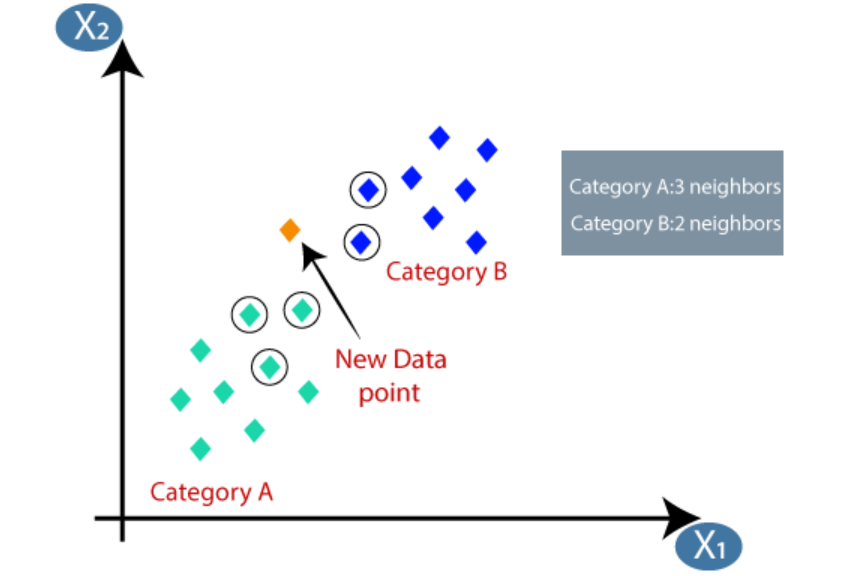

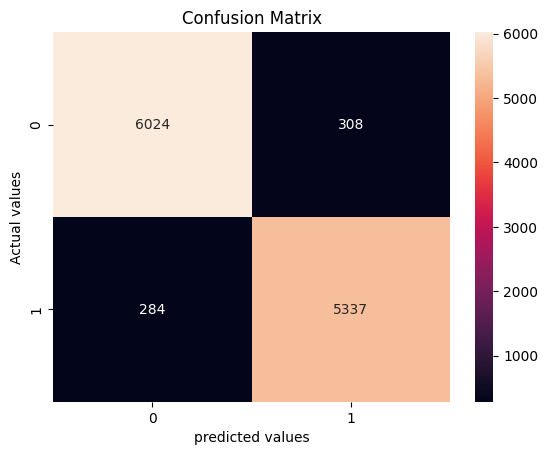

In [ ]:
# Visualizing evaluation Metric Score chart
sns.heatmap(report["KNeighborsClassifier()"]['confusion matrix'],annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('predicted values');

###Cross Validation and Hyperparameter tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_knn={'n_neighbors':[3,4,5,6,7,8,9,10]
          }

grid_knn=GridSearchCV(estimator=KNeighborsClassifier(),
                         param_grid=param_knn,
                         cv=5,verbose=False)
# Fit the Algorithm
grid_knn.fit(X_train,y_train)

# Predict on the model
best_knn=grid_knn.best_estimator_
model_implement(model=best_knn,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)

#getting display report
Display_report = pd.DataFrame(report.values(),index=report.keys())
Display_report

model:  KNeighborsClassifier(n_neighbors=10)


train_score  test_score  \
LogisticRegression()                                   0.955384    0.953986   
LogisticRegression(C=1)                                0.955384    0.953986   
DecisionTreeClassifier()                               0.992616    0.937756   
DecisionTreeClassifier(max_depth=6, max_feature...     0.934321    0.931231   
RandomForestClassifier()                               0.992616    0.953317   
RandomForestClassifier(criterion='entropy', max...     0.963584    0.957166   
KNeighborsClassifier()                                 0.963939    0.950473   
KNeighborsClassifier(n_neighbors=10)                   0.960341    0.952648   

                                                    precision label:0  \
LogisticRegression()                                         0.958598   
LogisticRegression(C=1)                                      0.958598   
DecisionTreeClassifier()                                     0.940694   
DecisionTreeClassifier(max_depth=6, max_feature...           0.950458   
RandomForestClassifier()                                     0.954503   
RandomForestClassifier(criterion='entropy', max...           0.957403   
KNeighborsClassifier()                                       0.954978   
KNeighborsClassifier(n_neighbors=10)                         0.950469   

                                                    precision label:1  \
LogisticRegression()                                         0.948841   
LogisticRegression(C=1)                                      0.948841   
DecisionTreeClassifier()                                     0.934438   
DecisionTreeClassifier(max_depth=6, max_feature...           0.911084   
RandomForestClassifier()                                     0.951973   
RandomForestClassifier(criterion='entropy', max...           0.956895   
KNeighborsClassifier()                                       0.945438   
KNeighborsClassifier(n_neighbors=10)                         0.955159   

                                                    recall label:0  \
LogisticRegression()                                      0.954359   
LogisticRegression(C=1)                                   0.954359   
DecisionTreeClassifier()                                  0.941883   
DecisionTreeClassifier(max_depth=6, max_feature...        0.918035   
RandomForestClassifier()                                  0.957517   
RandomForestClassifier(criterion='entropy', max...        0.961939   
KNeighborsClassifier()                                    0.951358   
KNeighborsClassifier(n_neighbors=10)                      0.960676   

                                                    recall label:1  \
LogisticRegression()                                      0.953567   
LogisticRegression(C=1)                                   0.953567   
DecisionTreeClassifier()                                  0.933108   
DecisionTreeClassifier(max_depth=6, max_feature...        0.946095   
RandomForestClassifier()                                  0.948586   
RandomForestClassifier(criterion='entropy', max...        0.951788   
KNeighborsClassifier()                                    0.949475   
KNeighborsClassifier(n_neighbors=10)                      0.943604   

                                                    f1-score label:0  \
LogisticRegression()                                        0.956474   
LogisticRegression(C=1)                                     0.956474   
DecisionTreeClassifier()                                    0.941288   
DecisionTreeClassifier(max_depth=6, max_feature...          0.933965   
RandomForestClassifier()                                    0.956008   
RandomForestClassifier(criterion='entropy', max...          0.959666   
KNeighborsClassifier()                                      0.953165   
KNeighborsClassifier(n_neighbors=10)                        0.955545   

                                                    f1-score label:1  \
LogisticRegression()                     

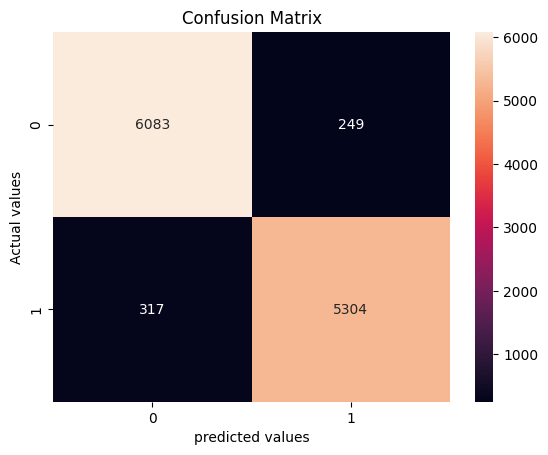

In [ ]:
# Visualizing evaluation Metric Score chart
sns.heatmap(report["KNeighborsClassifier(n_neighbors=10)"]['confusion matrix'],annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('predicted values');

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

The parameters here are n_neighbors

The optimum value for the parameter found was **n_neighbors = 10**

The **recall** changed from 94.7% to 94.9% and

**accuracy** from 95% to 95.2%

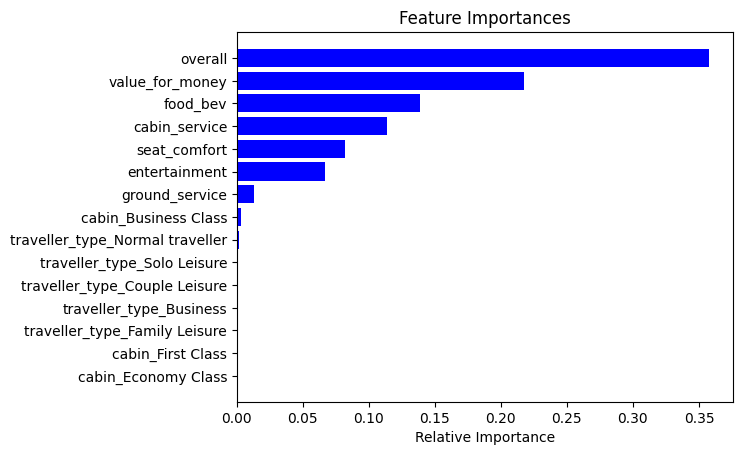

In [ ]:
features=X.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show;

# **Conclusion**


*  The Models used for this Classsification problem are:

  *   **Logistic Regression Model**
  *   **Decision Tree Model**
  *   **Random Forest Model**
  *   **K-Nearest Neighbor Model**

*  We performed Hyperparameter tuning using GridsearchCV. To increase accuracy and avoid Overfitting Criteria, this is done. After that, we finalized the Random Forest Classifier model by fine-tuning the hyperparameters.

*  Based on the knowledge of the business and the problem usecase. The Classification metrics of **Recall(TP/TP+FP)** and **Accuray(correct predictions/all predictions)** were used.

*  All 4 classifiers were able to give accuracy of more than 90%. But we can conclude that **RandomForestClassifier(95-96% recall)** gives the best model.

*  The most important feature are **overall rating**, **Value for money** and **food_bev** as main three features that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

*  The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.

*  As a result, in order to increase their business or grow, our client must provide excellent **cabin service**, **ground service**, **food beverage**, **entertainment**, and **seat comfort**.